# E coli clustering

The purpose of this notebook is to develop the methods for clustering analysis of membrane transporters, with the example of *E coli*. 

## Sequence dataset generation

### Reading data

Reading pre-processed Uniprot data for all organisms:

In [199]:
from subpred.util import load_df

sequences = load_df("uniprot")
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
A0A0C5B5G6,MT-RNR1,Mitochondrial-derived peptide MOTS-c (Mitochon...,True,1,MRWQEMGYIFYPRKLR,9606
A0A1B0GTW7,CIROP LMLN2,Ciliated left-right organizer metallopeptidase...,True,1,MLLLLLLLLLLPPLVLRVAASRCLHDETQKSVSLLRPPFSQLPSKS...,9606
A0JNW5,BLTP3B KIAA0701 SHIP164 UHRF1BP1L,Bridge-like lipid transfer protein family memb...,True,1,MAGIIKKQILKHLSRFTKNLSPDKINLSTLKGEGELKNLELDEEVL...,9606
A0JP26,POTEB3,POTE ankyrin domain family member B3,True,1,MVAEVCSMPAASAVKKPFDLRSKMGKWCHHRFPCCRGSGKSNMGTS...,9606
A0PK11,CLRN2,Clarin-2,True,1,MPGWFKKAWYGLASLLSFSSFILIIVALVVPHWLSGKILCQTGVDL...,9606
...,...,...,...,...,...,...
X5L4R4,NOD-2,Nucleotide-binding oligomerization domain-cont...,False,2,MSPGCYKGWPFNCHLSHEEDKRRNETLLQEAETSNLQITASFVSGL...,586796
X5MBL2,GT34D,"Putative galacto(Gluco)mannan alpha-1,6-galact...",False,2,KVLYDRAFNSSDDQSALVYLLLKEKDKWADRIFIEHKYYLNGYWLD...,3352
X5MFI4,GT34D,"Putative galacto(Gluco)mannan alpha-1,6-galact...",False,2,MDEDVLCKGPLHGGSARSLKGSLKRLKRIMESLNDGLIFMGGAVSA...,3352


### Selecting organism

Filtering for *E. Coli* Strain K12: 

In [200]:
sequences = sequences[sequences.organism_id == 83333]
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P76154,ydfK b1544 JW1537,Cold shock protein YdfK,True,2,MKSKDTLKWFPAQLPEVRIILGDAVVEVAKQGRPINTRTLLDYIEG...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333
P33668,ybbC b0498 JW0487,Uncharacterized protein YbbC,True,2,MKYSSIFSMLSFFILFACNETAVYGSDENIIFMRYVEKLHLDKYSV...,83333


### Filtering

Keeping proteins that have been manually reviewed, or have sequence evidence at protein level:

In [201]:
sequences = sequences[(sequences.protein_existence == 1) | (sequences.reviewed)]
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P76157,ynfN b1551 JW5254,Uncharacterized protein YnfN,True,2,MREYPNGEKTHLTVMAAGFPSLTGDHKVIYVAADRHVTSEEILEAA...,83333
P76154,ydfK b1544 JW1537,Cold shock protein YdfK,True,2,MKSKDTLKWFPAQLPEVRIILGDAVVEVAKQGRPINTRTLLDYIEG...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333


### Sequence clustering the proteins:

The clustering at 70% sequence identity does not remove a lot of proteins for *E. coli*. This is different for other organisms. 

In [202]:
from subpred.cdhit import cd_hit

clusters = cd_hit(sequences=sequences.sequence, identity_threshold=70)
sequences = sequences.loc[clusters]
sequences

cd-hit: clustered 3277 sequences into 3236 clusters at threshold 70


,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P77564,ydhW b1672 JW1662,Uncharacterized protein YdhW,True,2,MGKMNHQDELPLAKVSEVDEAKRQWLQGMRHPVDTVTEPEPAEILA...,83333
P76157,ynfN b1551 JW5254,Uncharacterized protein YnfN,True,2,MREYPNGEKTHLTVMAAGFPSLTGDHKVIYVAADRHVTSEEILEAA...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333


### Filtering for transmembrane transporters using GO

#### Loading all GO Uniprot annotations

Read pre-processed Uniprot GO annotations:

In [203]:
go_annotations_uniprot = load_df("go")
go_annotations_uniprot


,Uniprot,qualifier,go_id,evidence_code,aspect
0,A0A009FND8,enables,GO:0000166,IEA,F
1,A0A009FND8,enables,GO:0005524,IEA,F
2,A0A009FND8,enables,GO:0051082,IEA,F
3,A0A009FND8,enables,GO:0140662,IEA,F
4,A0A009FND8,involved_in,GO:0006457,IEA,P
...,...,...,...,...,...
7452013,Z9JND5,enables,GO:0000166,IEA,F
7452014,Z9JND5,enables,GO:0005524,IEA,F
7452015,Z9JND5,enables,GO:0051082,IEA,F
7452016,Z9JND5,enables,GO:0140662,IEA,F


#### Dataset of transmembrane transport GO terms in E Coli

- Used to filter proteins for transmembrane transporters

**Creating dataset of transporter GO term annotations**

Filter for GO terms that are descendants of "transmembrane transporter activity

GO annotations for the clustered sequence dataset from *E Coli.*

In [204]:
from subpred.ontology import GeneOntology, GO_FILE

go_owl = GeneOntology(GO_FILE)
transmembrane_transport_go_terms = go_owl.get_descendants(
    go_owl.get_identifier("transmembrane transporter activity")
)
# filter GO annotations for descendants of transmembrane transporter activity
go_annotations_tmtp = go_annotations_uniprot[
    go_annotations_uniprot.go_id.isin(transmembrane_transport_go_terms)
].reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,go_id,evidence_code,aspect
0,A0A014M993,enables,GO:0015288,IEA,F
1,A0A014M993,enables,GO:0015481,IEA,F
2,A0A014M993,enables,GO:0042958,IEA,F
3,A0A022PEV8,enables,GO:0015288,IEA,F
4,A0A022PEV8,enables,GO:0015481,IEA,F
...,...,...,...,...,...
94155,X5M917,enables,GO:0022857,IBA,F
94156,Z4YKJ7,enables,GO:0015172,IEA,F
94157,Z4YKJ7,enables,GO:0015179,IEA,F
94158,Z4YKJ7,enables,GO:0015293,IEA,F


In [205]:
# add ancestors of all remaining terms
from subpred.ontology import add_go_ancestors
go_annotations_tmtp = add_go_ancestors(go_annotations_tmtp, go_owl)
go_annotations_tmtp

,Uniprot,qualifier,evidence_code,aspect,go_id
0,A0A014M993,enables,IEA,F,GO:0015288
1,A0A014M993,enables,IEA,F,GO:0022857
2,A0A014M993,enables,IEA,F,GO:0005215
3,A0A014M993,enables,IEA,F,GO:0015267
4,A0A014M993,enables,IEA,F,GO:0003674
...,...,...,...,...,...
741880,Z4YKJ7,enables,IEA,F,GO:0022853
741881,Z4YKJ7,enables,IEA,F,GO:0015318
741882,Z4YKJ7,enables,IEA,F,GO:0008509
741883,Z4YKJ7,enables,IEA,F,GO:0015081


In [206]:
# filter GO annotations and their ancestors for descendants of transmembrane transporter activity again
go_annotations_tmtp = go_annotations_tmtp[
    go_annotations_tmtp.go_id.isin(transmembrane_transport_go_terms)
].reset_index(drop=True)
go_annotations_tmtp = go_annotations_tmtp.drop_duplicates().reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id
0,A0A014M993,enables,IEA,F,GO:0015288
1,A0A014M993,enables,IEA,F,GO:0022857
2,A0A014M993,enables,IEA,F,GO:0015267
3,A0A014M993,enables,IEA,F,GO:0022829
4,A0A014M993,enables,IEA,F,GO:0022803
...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0022853
581848,Z4YKJ7,enables,IEA,F,GO:0015318
581849,Z4YKJ7,enables,IEA,F,GO:0008509
581850,Z4YKJ7,enables,IEA,F,GO:0015081


In [207]:
# annotate with labels
go_annotations_tmtp = go_annotations_tmtp.assign(
    go_term=go_annotations_tmtp.go_id.transform(go_owl.get_label)
)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A0A014M993,enables,IEA,F,GO:0015288,porin activity
1,A0A014M993,enables,IEA,F,GO:0022857,transmembrane transporter activity
2,A0A014M993,enables,IEA,F,GO:0015267,channel activity
3,A0A014M993,enables,IEA,F,GO:0022829,wide pore channel activity
4,A0A014M993,enables,IEA,F,GO:0022803,passive transmembrane transporter activity
...,...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0022853,active ion transmembrane transporter activity
581848,Z4YKJ7,enables,IEA,F,GO:0015318,inorganic molecular entity transmembrane trans...
581849,Z4YKJ7,enables,IEA,F,GO:0008509,anion transmembrane transporter activity
581850,Z4YKJ7,enables,IEA,F,GO:0015081,sodium ion transmembrane transporter activity


In [208]:
# Filtering for qualifier. How many samples do we lose?
print(
    f"Percentage of transmembrane transporter annotations with enables qualifier: {go_annotations_tmtp[go_annotations_tmtp.qualifier == 'enables'].shape[0] / go_annotations_tmtp.shape[0] * 100:.3f}%"
)
go_annotations_tmtp = go_annotations_tmtp[go_annotations_tmtp.qualifier == "enables"]
go_annotations_tmtp


Percentage of transmembrane transporter annotations with enables qualifier: 97.408%


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A0A014M993,enables,IEA,F,GO:0015288,porin activity
1,A0A014M993,enables,IEA,F,GO:0022857,transmembrane transporter activity
2,A0A014M993,enables,IEA,F,GO:0015267,channel activity
3,A0A014M993,enables,IEA,F,GO:0022829,wide pore channel activity
4,A0A014M993,enables,IEA,F,GO:0022803,passive transmembrane transporter activity
...,...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0022853,active ion transmembrane transporter activity
581848,Z4YKJ7,enables,IEA,F,GO:0015318,inorganic molecular entity transmembrane trans...
581849,Z4YKJ7,enables,IEA,F,GO:0008509,anion transmembrane transporter activity
581850,Z4YKJ7,enables,IEA,F,GO:0015081,sodium ion transmembrane transporter activity


Before filtering for the electronically inferred IEA annotations, we will only keep annotations for the clustered *E. coli* sequence dataset above, to see what the actual difference in sample count is. *E. coli* is a model organism, and therefore there should be more experimentally verified annotations compared to the thousands of other organisms in the dataset with similar proteins. 

The percentage of IEA annotations in *E. coli* should be much lower than for the average Uniprot organism.

In [209]:
assert not sequences.duplicated().any()
f"% of e coli proteins with transmembrane transport annotation after preprocessing and clustering: {sequences[sequences.index.isin(go_annotations_tmtp.Uniprot)].shape[0]/sequences.shape[0]*100:.2f}%"


'% of e coli proteins with transmembrane transport annotation after preprocessing and clustering: 14.52%'

In [210]:
go_annotations_tmtp = go_annotations_tmtp[
    go_annotations_tmtp.Uniprot.isin(sequences.index)
].reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A5A627,enables,IDA,F,GO:0005216,ion channel activity
1,A5A627,enables,IDA,F,GO:0015075,ion transmembrane transporter activity
2,A5A627,enables,IDA,F,GO:0015103,inorganic anion transmembrane transporter acti...
3,A5A627,enables,IDA,F,GO:0022857,transmembrane transporter activity
4,A5A627,enables,IDA,F,GO:0015267,channel activity
...,...,...,...,...,...,...
7374,Q6BEX0,enables,IEA,F,GO:0015149,hexose transmembrane transporter activity
7375,Q6BEX0,enables,IEA,F,GO:0015145,monosaccharide transmembrane transporter activity
7376,Q6BEX0,enables,IEA,F,GO:0015407,ABC-type monosaccharide transporter activity
7377,Q6BEX0,enables,IEA,F,GO:0103116,ABC-type D-galactofuranose transporter


<AxesSubplot:>

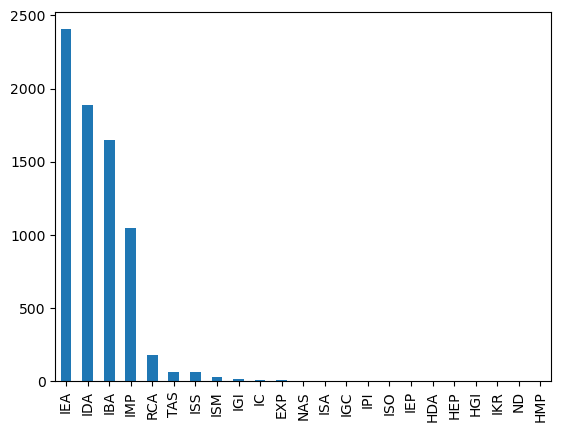

In [211]:
# filter for evidence code. how many samples do we lose?
go_annotations_tmtp.evidence_code.value_counts().plot.bar()


Most annotations have experimental evidence!

<AxesSubplot:>

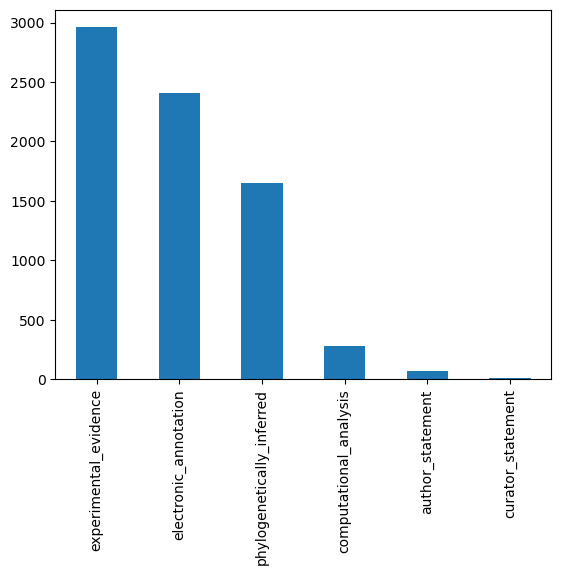

In [212]:
from subpred.ontology import EVIDENCE_CODE_TO_DESCRIPTION

go_annotations_tmtp.evidence_code.map(
    EVIDENCE_CODE_TO_DESCRIPTION
).value_counts().plot.bar()


Another point is that the GO annotation dataset also contains Uniprot annotations assigned by InterPro. There can be cases where the same annotation is in the dataset twice, where one of those annotations has an IEA annotation while the other one does not. What is the actual difference?

In [213]:
tmp = (
    go_annotations_tmtp[go_annotations_tmtp.evidence_code != "IEA"]
    .drop(["qualifier", "evidence_code", "aspect"], axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)
print(
    f"Without IEA terms: {tmp.shape[0]} annotations in {tmp.Uniprot.unique().shape[0]} proteins."
)
tmp = (
    go_annotations_tmtp.drop(["qualifier", "evidence_code", "aspect"], axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)
print(
    f"With IEA terms: {tmp.shape[0]} annotations in {tmp.Uniprot.unique().shape[0]} proteins."
)


Without IEA terms: 3348 annotations in 357 proteins.
With IEA terms: 4172 annotations in 470 proteins.


For now, we will filter out the IEA terms and only keep the verified data.

In [214]:
# filter for evidence codes:
go_annotations_tmtp = go_annotations_tmtp[
    go_annotations_tmtp.evidence_code != "IEA"
].reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A5A627,enables,IDA,F,GO:0005216,ion channel activity
1,A5A627,enables,IDA,F,GO:0015075,ion transmembrane transporter activity
2,A5A627,enables,IDA,F,GO:0015103,inorganic anion transmembrane transporter acti...
3,A5A627,enables,IDA,F,GO:0022857,transmembrane transporter activity
4,A5A627,enables,IDA,F,GO:0015267,channel activity
...,...,...,...,...,...,...
4969,Q59385,enables,IBA,F,GO:0008324,cation transmembrane transporter activity
4970,Q59385,enables,IBA,F,GO:0022853,active ion transmembrane transporter activity
4971,Q59385,enables,IBA,F,GO:0015318,inorganic molecular entity transmembrane trans...
4972,Q59385,enables,IBA,F,GO:0043682,P-type divalent copper transporter activity


Now, there are still some annotations left with identical uniprot accession and go term, but different evidence codes. This happens because the GO dataset contains annotations made both by Uniprot and by InterPro, and they can assign different evidence codes. The next step is to remove the columns that we no longer need, and delete duplicates:

In [215]:
go_annotations_tmtp = (
    go_annotations_tmtp.drop(["qualifier", "evidence_code", "aspect"], axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)
go_annotations_tmtp

,Uniprot,go_id,go_term
0,A5A627,GO:0005216,ion channel activity
1,A5A627,GO:0015075,ion transmembrane transporter activity
2,A5A627,GO:0015103,inorganic anion transmembrane transporter acti...
3,A5A627,GO:0022857,transmembrane transporter activity
4,A5A627,GO:0015267,channel activity
...,...,...,...
3343,Q59385,GO:0140358,P-type transmembrane transporter activity
3344,Q59385,GO:0042626,ATPase-coupled transmembrane transporter activity
3345,Q59385,GO:0005375,copper ion transmembrane transporter activity
3346,Q59385,GO:0019829,ATPase-coupled cation transmembrane transporte...


In [216]:
# make backup of entire (filtered) genome, since we need a reference set later for the annotations
sequences_all = sequences.copy()
sequences = sequences[sequences.index.isin(go_annotations_tmtp.Uniprot)]
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P02916,malF b4033 JW3993,Maltose/maltodextrin transport system permease...,True,1,MDVIKKKHWWQSDALKWSVLGLLGLLVGYLVVLMYAQGEYLFAITT...,83333
P03959,kdpA b0698 JW0686,Potassium-transporting ATPase potassium-bindin...,True,1,MAAQGFLLIATFLLVLMVLARPLGSGLARLINDIPLPGTTGVERVL...,83333
P05825,fepA fep feuB b0584 JW5086,Ferrienterobactin receptor (Enterobactin outer...,True,1,MNKKIHSLALLVNLGIYGVAQAQEPTDTPVSHDDTIVVTAAEQNLQ...,83333
P0AA78,exuT b3093 JW3064,Hexuronate transporter (Aldohexuronate transpo...,True,1,MRKIKGLRWYMIALVTLGTVLGYLTRNTVAAAAPTLMEELNISTQQ...,83333
P0AAD6,sdaC dcrA b2796 JW2767,Serine transporter SdaC (H(+)/L-serine symport...,True,1,METTQTSTIASKDSRSAWRKTDTMWMLGLYGTAIGAGVLFLPINAG...,83333
...,...,...,...,...,...,...
P77328,ybbY glxB4 b0513 JW0501,Putative purine permease YbbY,True,1,MFNFAVSRESLLSGFQWFFFIFCNTVVVPPTLLSAFQLPQSSLLTL...,83333
P76198,ydiN b1691 JW5274,Inner membrane transport protein YdiN,True,1,MSQNKAFSTPFILAVLCIYFSYFLHGISVITLAQNMSSLAEKFSTD...,83333
P33011,yeeA b2008 JW1990,Inner membrane protein YeeA,True,1,MRADKSLSPFEIRVYRHYRIVHGTRVALAFLLTFLIIRLFTIPEST...,83333


#### 

## Feature generation

Here, we will use PSSM and protein embeddings features to encode the protein sequences into vectors of length *n*.

### ProtNLM

One of the most reliable features at the moment seems to be ProtNLM, which provides NLP embeddings for individual proteins. Swissprot has pre-calculated embeddings for all *E. Coli* proteins available for download. 

There is also ProtT5, which can be calcualted for new proteins.

In [217]:
import h5py
import pandas as pd
import numpy as np


def read_uniprot_embedding(h5_path: str):
    with h5py.File(h5_path, "r") as file:
        embeddings_dict = {
            sequence_id: np.array(embedding) for sequence_id, embedding in file.items()
        }
        return pd.DataFrame.from_dict(embeddings_dict, orient="index")


feature_protnlm = read_uniprot_embedding("/home/ad/protnlm_test/ecoli-per-protein.h5")
feature_protnlm


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
A0A385XJ53,0.061157,0.082031,0.001612,0.039703,-0.020401,0.034180,-0.004898,-0.057495,0.023514,-0.089600,...,0.032349,-0.059021,-0.021179,-0.051971,0.054962,-0.005638,-0.088074,-0.094727,-0.043701,-0.071533
A0A385XJE6,0.047943,0.122864,0.007145,0.014442,0.024536,0.034729,-0.040802,-0.031281,0.009224,-0.065063,...,-0.004765,0.001526,0.021637,-0.024689,0.042328,-0.009949,-0.060638,-0.045258,-0.067078,0.024902
A0A385XJK5,0.050293,0.093811,-0.043182,-0.043671,-0.029007,-0.071594,0.019318,-0.126831,0.006989,-0.072693,...,0.045349,-0.014725,0.029755,-0.141113,-0.025711,0.098572,-0.029022,0.077271,-0.000576,-0.016922
A0A385XJL2,0.039551,0.090271,-0.019913,0.009315,-0.047882,-0.038605,0.059692,-0.034180,0.008598,-0.089661,...,0.049866,-0.025406,0.007912,-0.066223,0.031174,0.077637,0.030319,0.118652,0.055847,-0.060638
A0A385XJL4,0.008354,0.159546,0.024719,0.047485,0.031525,0.043854,-0.046173,-0.039490,0.017197,-0.031097,...,-0.040344,-0.025070,0.058197,-0.053284,0.074280,-0.032410,-0.082153,-0.038849,-0.109070,-0.011330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q93K97,0.043854,0.006367,-0.031769,0.036469,0.020828,0.040802,-0.007046,-0.109863,0.037109,-0.007458,...,-0.020798,0.034088,0.026230,-0.078735,0.013145,0.006065,-0.043488,-0.061035,-0.018387,-0.012543
Q9XB42,-0.001819,0.088806,-0.038422,0.023849,-0.067871,0.024200,0.062622,-0.184937,0.071777,0.039307,...,0.045532,-0.050568,-0.017609,-0.083496,-0.017700,0.008072,-0.038635,0.016205,0.038605,0.015205
Q9Z3A0,0.006672,0.109619,-0.061584,0.024643,-0.006783,-0.079468,-0.015144,-0.142212,0.071228,0.038208,...,0.029312,0.003822,0.022324,-0.174927,0.006115,0.036255,-0.054504,-0.008636,-0.030502,0.061249
U3PVA8,0.036987,-0.017639,-0.028152,-0.019852,0.025330,0.019958,0.012833,-0.129395,-0.018860,-0.003590,...,-0.029663,0.032928,0.026566,-0.147827,-0.055145,-0.061310,0.017197,0.147217,0.019318,-0.080444


**How many proteins in the dataset have embeddings available in the dataset?**


In [218]:
print(
    f"embeddings are available for {len(set(sequences.index) & set(feature_protnlm.index))}/{len(set(sequences.index))} of proteins in the dataset"
)


embeddings are available for 357/357 of proteins in the dataset


**Final feature dataset:**

In [219]:
feature_protnlm_all = feature_protnlm.loc[
    list(set(sequences_all.index) & set(feature_protnlm.index))
]
feature_protnlm_all

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
P08400,0.074890,0.031494,0.035583,0.050903,0.012154,0.023682,-0.027863,-0.033173,0.024628,0.001423,...,-0.058014,0.048676,-0.010780,-0.048981,0.024155,-0.032990,-0.042847,-0.026642,-0.060974,-0.000367
P0AA57,-0.031342,0.045776,0.003983,0.000321,-0.030518,0.012558,-0.009323,-0.090515,0.004810,0.094727,...,-0.005665,0.039032,0.047943,-0.055847,0.026230,-0.066467,-0.063049,-0.017334,-0.048553,0.047333
P0ABU9,0.053467,0.012901,-0.011627,-0.005070,0.013313,0.065186,-0.050720,-0.045715,-0.004353,-0.020645,...,-0.012062,0.012100,-0.013519,-0.054474,-0.011688,-0.005455,0.021988,-0.047974,0.003729,0.017624
P45543,0.035065,0.022400,0.022125,0.043762,-0.029510,0.040924,-0.045288,-0.096680,-0.009087,-0.003021,...,-0.013329,-0.075012,0.045532,-0.093872,0.048462,-0.013611,-0.077515,-0.044312,0.020355,-0.006870
P0DPP6,0.014816,0.005817,0.016556,-0.002607,-0.020248,-0.023682,0.075073,-0.118408,0.035248,0.027573,...,0.032349,-0.001727,-0.010262,-0.091980,0.038513,-0.007618,0.030228,0.068909,0.050446,-0.080872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P16456,0.087952,0.088684,0.008331,0.048431,-0.030334,0.032928,-0.045807,-0.056000,0.039520,-0.069336,...,-0.032379,-0.039764,-0.028931,-0.025513,0.043640,-0.017593,-0.016098,-0.009644,-0.011398,0.033875
P0A937,0.004551,0.026031,0.059113,-0.011856,-0.010445,-0.015221,0.020782,-0.076660,-0.021027,0.048737,...,-0.056763,-0.004078,0.018387,-0.094421,0.048065,-0.025497,-0.063538,-0.010330,-0.024048,-0.019623
P23873,0.080872,-0.051941,-0.020782,-0.014709,-0.034332,0.069580,0.003868,-0.092712,-0.004456,0.033020,...,0.019455,0.003616,0.011993,-0.127563,0.039673,-0.039398,-0.075867,-0.045532,0.061951,0.015419
P32701,0.046356,0.031891,0.032623,0.035095,0.003777,-0.025406,-0.014359,-0.046814,0.054260,0.031769,...,-0.039490,0.021103,-0.013283,-0.038330,0.073303,0.016129,-0.028534,-0.043823,-0.055756,0.009445


In [220]:

feature_protnlm = feature_protnlm.loc[
    list(set(sequences.index) & set(feature_protnlm.index))
]
feature_protnlm


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
A5A627,0.008194,-0.103149,0.095520,-0.004520,-0.008125,-0.036407,-0.015701,-0.189819,-0.098816,0.066406,...,-0.031204,0.045227,0.108948,-0.225952,-0.090393,0.058868,0.008751,0.040741,0.069641,-0.033081
P68187,0.051849,0.055023,-0.018433,0.027618,0.004253,-0.021103,-0.055115,-0.061676,0.012878,-0.010895,...,-0.033051,0.017075,-0.026245,-0.046478,0.057007,-0.023117,-0.056091,-0.037048,-0.050201,0.013084
Q46821,0.035095,0.099121,0.041687,0.040863,-0.003670,0.025787,-0.023438,-0.070618,0.052887,-0.036041,...,-0.034668,-0.023026,-0.040161,-0.023148,0.043335,-0.026535,-0.012924,-0.012932,-0.011795,0.001497
P0AGH5,0.017624,0.015289,0.028946,0.050262,0.012840,-0.013237,0.007301,-0.048187,0.018875,-0.031616,...,0.001036,0.001533,-0.017227,-0.045776,0.025314,-0.008690,-0.031342,-0.007259,-0.023758,0.000481
P0AFA7,0.033051,0.050842,0.001029,0.046600,-0.007549,0.009865,-0.011345,-0.052032,0.030457,-0.017303,...,-0.057068,-0.007008,0.041107,-0.068604,-0.040283,-0.032410,-0.006382,0.030350,0.009918,0.034668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P77239,-0.016327,0.057465,0.039307,0.066711,-0.013008,-0.015129,-0.059570,-0.083557,0.023056,0.019180,...,0.005638,0.015266,-0.028717,-0.042328,0.024261,0.001133,-0.051422,0.002661,-0.037506,0.036224
P0ABI8,0.027390,0.112610,0.003319,0.074097,0.006599,-0.005211,-0.028610,-0.028000,0.007034,-0.074768,...,-0.037201,-0.008888,-0.006744,-0.057098,0.032410,-0.006023,-0.023911,0.015274,-0.026428,0.021744
P27125,0.027954,0.139038,0.051086,0.053223,-0.006508,0.063232,-0.052185,-0.071045,0.023544,-0.050415,...,-0.035431,-0.053497,-0.048401,-0.065186,0.007301,-0.051605,-0.058746,-0.048492,-0.029205,0.005192
P15078,0.042297,0.127441,0.022995,0.054596,-0.003817,0.033142,-0.034912,-0.031708,-0.012108,-0.055542,...,-0.034882,-0.036835,-0.017853,-0.031052,0.024719,-0.046844,-0.017838,0.002621,-0.013298,0.014496


### PSSM

At the moment, the PSSMs for Uniref90 with three iterations are still being calculated. We will use the Uniref50 PSSMs with three iterations as an example. We have only calculated PSSMs for proteins that are annotated with the GO term *transmembrane transporter activity* or one of its descendant GO terms, therefore we first have to filter for that. 

In [221]:
from subpred.pssm import calculate_pssm_feature

feature_pssm = calculate_pssm_feature(
    sequences=sequences.sequence,
    tmp_folder="../data/intermediate/blast/pssm_uniref50_3it/",
    blast_db="../data/raw/uniref/uniref50/uniref50.fasta",
    iterations=3,
    verbose=False,
)
feature_pssm


,AA,AR,AN,AD,AC,AQ,AE,AG,AH,AI,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
P02916,0.819672,0.370902,0.387295,0.325820,0.336066,0.397541,0.350410,0.530738,0.319672,0.497951,...,0.665984,0.415984,0.633197,0.594262,0.411885,0.510246,0.606557,0.446721,0.508197,0.725410
P03959,0.936430,0.342298,0.420538,0.322738,0.586797,0.386308,0.344743,0.616137,0.371638,0.501222,...,0.660147,0.337408,0.745721,0.647922,0.418093,0.559902,0.603912,0.518337,0.518337,0.792176
P05825,0.724662,0.339527,0.407095,0.371622,0.234797,0.385135,0.337838,0.530405,0.315878,0.378378,...,0.592905,0.290541,0.500000,0.530405,0.300676,0.398649,0.496622,0.427365,0.423986,0.717905
P0AA78,1.000000,0.050773,0.185430,0.000000,0.423841,0.161148,0.070640,0.724062,0.030905,0.596026,...,0.790287,0.384106,0.735099,0.688742,0.419426,0.551876,0.622517,0.571744,0.474614,0.805740
P0AAD6,0.787425,0.281437,0.419162,0.215569,0.541916,0.299401,0.251497,0.565868,0.323353,0.661677,...,0.703593,0.338323,0.706587,0.682635,0.356287,0.535928,0.568862,0.544910,0.592814,0.781437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P77328,0.739726,0.469178,0.493151,0.452055,0.559932,0.503425,0.460616,0.695205,0.457192,0.635274,...,0.691781,0.460616,0.698630,0.655822,0.503425,0.635274,0.667808,0.479452,0.515411,0.789384
P76198,0.817708,0.338542,0.361979,0.192708,0.447917,0.375000,0.257812,0.726562,0.291667,0.643229,...,0.768229,0.354167,0.789062,0.783854,0.403646,0.598958,0.679687,0.554688,0.549479,0.807292
P33011,0.790368,0.456091,0.368272,0.373938,0.456091,0.433428,0.424929,0.504249,0.416431,0.563739,...,0.708215,0.359773,0.594901,0.558074,0.362606,0.481586,0.572238,0.475921,0.475921,0.682720
P37327,0.878543,0.129555,0.178138,0.161943,0.364372,0.251012,0.194332,0.603239,0.165992,0.429150,...,0.647773,0.344130,0.639676,0.554656,0.348178,0.465587,0.599190,0.469636,0.461538,0.821862


## Annotation datasets

Here, we create gene/protein annotation datasets. Later, these annotations will be used for calculating enrichment in clusters.

### GO


Preprocessing:

In [222]:
go_annotations_uniprot = load_df("go")
    # filter for proteins in our e coli dataset
go_annotations_ecoli = go_annotations_uniprot[
    go_annotations_uniprot.Uniprot.isin(set(sequences_all.index.tolist()))
].reset_index(drop=True)
go_annotations_ecoli

,Uniprot,qualifier,go_id,evidence_code,aspect
0,A0A0A6YVN8,enables,GO:0046872,IEA,F
1,A5A615,located_in,GO:0005886,IDA,C
2,A5A615,located_in,GO:0005886,IEA,C
3,A5A615,located_in,GO:0005886,RCA,C
4,A5A615,located_in,GO:0016020,IEA,C
...,...,...,...,...,...
39610,Q93K97,involved_in,GO:0006753,IBA,P
39611,Q93K97,involved_in,GO:0019693,IBA,P
39612,Q93K97,is_active_in,GO:0005829,IBA,C
39613,Q93K97,located_in,GO:0005829,HDA,C


In [223]:
go_annotations_ecoli = add_go_ancestors(go_annotations_ecoli, go_owl=go_owl)
go_annotations_ecoli

,Uniprot,qualifier,evidence_code,aspect,go_id
0,A0A0A6YVN8,enables,IEA,F,GO:0043169
1,A0A0A6YVN8,enables,IEA,F,GO:0046872
2,A0A0A6YVN8,enables,IEA,F,GO:0043167
3,A0A0A6YVN8,enables,IEA,F,GO:0003674
4,A0A0A6YVN8,enables,IEA,F,GO:0005488
...,...,...,...,...,...
270350,Q93K97,located_in,HDA,C,GO:0005575
270351,Q93K97,located_in,HDA,C,GO:0110165
270352,Q93K97,located_in,IDA,C,GO:0005829
270353,Q93K97,located_in,IDA,C,GO:0005575


#### Evidence codes:

Only about 35% of annotations have evidence code IEA, and some of those might even have non-IEA duplicates in the dataset, since the annotations stem from multiple sources. We can remove the IEA terms.

Text(0, 0.5, 'percentage')

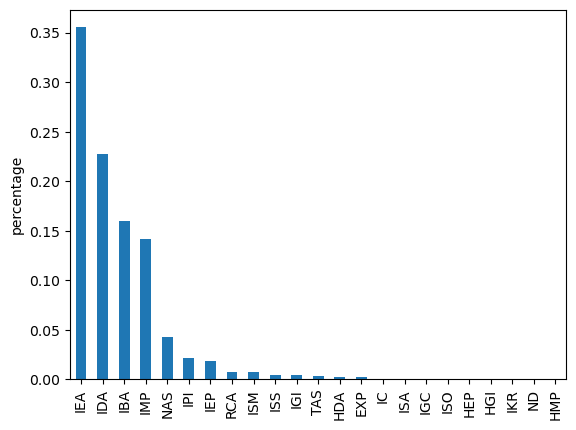

In [224]:
# filter/analyze evidence codes
g = go_annotations_ecoli.evidence_code.value_counts(normalize=True).plot.bar()
g.set_ylabel("percentage")

In [225]:
go_annotations_ecoli = (
    go_annotations_ecoli[go_annotations_ecoli.evidence_code != "IEA"]
    .drop("evidence_code", axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)
go_annotations_ecoli


,Uniprot,qualifier,aspect,go_id
0,A5A615,located_in,C,GO:0005886
1,A5A615,located_in,C,GO:0005575
2,A5A615,located_in,C,GO:0016020
3,A5A615,located_in,C,GO:0110165
4,A5A616,acts_upstream_of_or_within,P,GO:0010350
...,...,...,...,...
138480,Q93K97,is_active_in,C,GO:0005575
138481,Q93K97,is_active_in,C,GO:0110165
138482,Q93K97,located_in,C,GO:0005829
138483,Q93K97,located_in,C,GO:0005575


#### Qualifiers

- Contains some "NOT" qualifiers that have to be removed, otherwise okay.
- Some qualifiers represent inaccurate relations between genes and terms, they should be removed.
    - The most significant removed term is *acts_upstream_of_or_within*, which makes up more than 50% of biological process annotations. 

**Explanations of inaccurate relations:**

- **acts_upstream_of_or_within**: The acts upstream of or within annotation relation when the mechanism relating the gene product's activity to the Biological Process is not known. Annotations using this relation often come from mutant phenotypes for which further characterization has not been performed, but the authors wish to report the effect that the gene has on a process.
- **colocalizes_with**: where the resolution of an assay is not accurate enough to say that the gene product is a bona fide component member
- **contributes_to**: A gene product is associated with a GO Molecular Function term using the qualifier 'contributes to' when it is a member of a complex that is defined as an "irreducible molecular machine" - where a particular Molecular Function cannot be ascribed to an individual subunit or small set of subunits of a complex.
- **acts_upstream_of**: The acts upstream of gene product to GO term relation is used when the mechanism relating a gene product's activity to a Biological Process is known and the activity occurs before the Biological Process but is neither an integral part of the process, nor an integral part of a process that regulates it. Curators should always strive to use one of the more specific child relations that capture the directionality of the effect, either positive or negative.


In [226]:
for aspect in ["C", "P", "F"]:
    print("###", aspect)
    print(
        go_annotations_ecoli[go_annotations_ecoli.aspect == aspect]
        .qualifier.astype("str")
        .value_counts()
        .to_string()
    )

### C
located_in          11217
is_active_in         3364
part_of              2683
colocalizes_with        7
### P
acts_upstream_of_or_within        49569
involved_in                       41647
NOT|involved_in                      45
NOT|acts_upstream_of_or_within       17
acts_upstream_of                      8
### F
enables           29318
contributes_to      553
NOT|enables          57


In [227]:
go_annotations_ecoli = go_annotations_ecoli[
    ~go_annotations_ecoli.qualifier.str.startswith("NOT")
]
go_annotations_ecoli = go_annotations_ecoli[
    ~go_annotations_ecoli.qualifier.isin(
        [
            "contributes_to",
            "colocalizes_with",
            "acts_upstream_of",
            "acts_upstream_of_or_within",
        ]
    )
]
go_annotations_ecoli = go_annotations_ecoli.reset_index(drop=True)
go_annotations_ecoli.qualifier.astype("str").value_counts()

involved_in     41647
enables         29318
located_in      11217
is_active_in     3364
part_of          2683
Name: qualifier, dtype: int64

In [228]:
for aspect in ["C", "P", "F"]:
    print("###", aspect)
    print(
        go_annotations_ecoli[go_annotations_ecoli.aspect == aspect]
        .qualifier.astype("str")
        .value_counts()
        .to_string()
    )

### C
located_in      11217
is_active_in     3364
part_of          2683
### P
involved_in    41647
### F
enables    29318


There are two additional qualifiers for the cellular component annotations:

- **is_active_in**: The 'is active in' relation is used to relate a gene or gene product to the GO Cellular Component in which the gene or gene product enables its Molecular Function, e.g. ced-3 'is active in' cytosol. This indicates that the ced-3 gene product executes its molecular function in the cytosol.
- **part_of**: 'part of' is used to link gene products to protein-containing complexes when the gene product is an integral component of the protein-containing complex


The former could be interesting, we could filter the "transmembrane transporter activity" for genes that are actually active in the membrane, at least if enough proteins have that annotation. We should look at some examples for the latter, to get a picture of what that relation looks like in practice.

Are all proteins in E coli that are annotated with "transmembrane transporter activity" also "active_in" the membrane?

In [229]:
# TODO
proteins_transmembrane_transporter_activity_ecoli = go_annotations_ecoli[
    (go_annotations_ecoli.aspect == "F") & (go_annotations_ecoli.go_id == "GO:0022857")
].Uniprot.tolist()
print(
    "total number of transmembrane transporters: ",
    len(set(proteins_transmembrane_transporter_activity_ecoli)),
)
tmp = go_annotations_ecoli[
    go_annotations_ecoli.Uniprot.isin(proteins_transmembrane_transporter_activity_ecoli)
    & (go_annotations_ecoli.aspect == "C")
    & (go_annotations_ecoli.qualifier == "is_active_in")
]
tmp = tmp.assign(go_term=tmp.go_id.transform(go_owl.get_label))
print("transmembrane transporters with 'is_active_in' annotation:", tmp.Uniprot.unique().shape[0])
print("distribution of 'is_active_in' annotations:")
tmp.go_term.value_counts()

total number of transmembrane transporters:  357
transmembrane transporters with 'is_active_in' annotation: 120
distribution of 'is_active_in' annotations:


cellular_component                          120
cellular anatomical entity                  120
membrane                                    104
plasma membrane                              80
outer membrane-bounded periplasmic space     12
periplasmic space                            12
outer membrane                                9
cell outer membrane                           9
cell division site                            2
organelle                                     1
intracellular organelle                       1
membrane-bounded organelle                    1
intracellular membrane-bounded organelle      1
cytosol                                       1
Name: go_term, dtype: int64

It could be the case that this qualifier is simply not used in every instance where the relation would be most appropriate, or that the remaining terms are electronically annotated and not experimentally known (we removed IEA annotations). Or the majority of our transporters do not actively transport any substrates across the membrane and are instead part of protein complexes, or are actually upstream of the transport. 

What are some examples of transmembrane transport proteins without the "is_active_in" annotation or the "part_of" annotation?

In [230]:
tmp = go_annotations_ecoli[
    go_annotations_ecoli.Uniprot.isin(proteins_transmembrane_transporter_activity_ecoli)
    & (go_annotations_ecoli.aspect == "C")
    & (go_annotations_ecoli.qualifier == "located_in")
]
tmp = tmp.assign(go_term = tmp.go_id.transform(go_owl.get_label))
#TODO some weird proteins in there, maybe find some go term filters? or tcdb filter?
# display(tmp.Uniprot.unique())
# # tmp.Uniprot.unique()

# sequences_all.loc[tmp.Uniprot.unique()]

tmp.go_term.value_counts()

cellular_component                                                                      349
cellular anatomical entity                                                              327
membrane                                                                                309
plasma membrane                                                                         282
protein-containing complex                                                              143
membrane protein complex                                                                136
transporter complex                                                                     125
transmembrane transporter complex                                                       122
plasma membrane protein complex                                                          81
ATP-binding cassette (ABC) transporter complex                                           73
ATPase dependent transmembrane transport complex                                

Interestingly, there are about 125 proteins that seem to be part of transporter protein complexes. If they do not show up during the clustering, we should look for ways to filter or classify them.

What are some examples of the part_of relation wrt cellular component annotations?

In [231]:
tmp = go_annotations_ecoli[
    go_annotations_ecoli.Uniprot.isin(proteins_transmembrane_transporter_activity_ecoli)
    & (go_annotations_ecoli.aspect == "C")
    & (go_annotations_ecoli.qualifier == "part_of")
]
tmp = tmp.assign(go_term = tmp.go_id.transform(go_owl.get_label)).reset_index(drop=True)
tmp.go_term.value_counts()

cellular_component                                                                      91
protein-containing complex                                                              89
membrane protein complex                                                                84
transporter complex                                                                     66
transmembrane transporter complex                                                       66
plasma membrane protein complex                                                         58
ATPase dependent transmembrane transport complex                                        51
ATP-binding cassette (ABC) transporter complex                                          47
ATP-binding cassette (ABC) transporter complex, substrate-binding subunit-containing    14
oxidoreductase complex                                                                  11
catalytic complex                                                                       11

The relation part_of seems to be used for proteins that are part of complexes. Only one proteins in "part_of" "outer membrane", the others seem to be located_in outer membrane. On the other hand, the located_in annotations contain 125 protein complex annotations, so it could just be the case that qualifier and complex membership are unrelated.

We will keep the "is_active_in" and "part_of" cellular component annotations in the dataset, there is no clear reason to exlude them.

#### Labels

Annotating the dataset with labels/names of GO terms:

In [232]:
go_annotations_ecoli = go_annotations_ecoli.assign(
    go_term=go_annotations_ecoli.go_id.map(go_owl.get_label)
)
go_annotations_ecoli

,Uniprot,qualifier,aspect,go_id,go_term
0,A5A615,located_in,C,GO:0005886,plasma membrane
1,A5A615,located_in,C,GO:0005575,cellular_component
2,A5A615,located_in,C,GO:0016020,membrane
3,A5A615,located_in,C,GO:0110165,cellular anatomical entity
4,A5A616,located_in,C,GO:0005886,plasma membrane
...,...,...,...,...,...
88224,Q93K97,is_active_in,C,GO:0005575,cellular_component
88225,Q93K97,is_active_in,C,GO:0110165,cellular anatomical entity
88226,Q93K97,located_in,C,GO:0005829,cytosol
88227,Q93K97,located_in,C,GO:0005575,cellular_component


### Keywords

In [233]:
keywords_uniprot = load_df("keywords")
keywords_ecoli = (
    keywords_uniprot[keywords_uniprot.Uniprot.isin(sequences_all.index)]
    .drop_duplicates()
    .reset_index(drop=True)
)
keywords_ecoli

,Uniprot,keyword
0,P00509,3D-structure
1,P00509,Aminotransferase
2,P00509,Cytoplasm
3,P00509,Direct protein sequencing
4,P00509,Pyridoxal phosphate
...,...,...
23130,P0AEG8,Reference proteome
23131,P33668,Reference proteome
23132,P33668,Signal
23133,A0A0A6YVN8,3D-structure


### Interpro

In [234]:
interpro_all = load_df("interpro")
interpro_ecoli = interpro_all[
    interpro_all.Uniprot.isin(sequences_all.index)
].reset_index(drop=True)
interpro_ecoli

,Uniprot,interpro_id,type,name
0,P00509,IPR004839,Domain,"Aminotransferase, class I/classII"
1,P00509,IPR000796,Family,Aspartate/other aminotransferase
2,P00509,IPR004838,Binding_site,"Aminotransferases, class-I, pyridoxal-phosphat..."
3,P00509,IPR015424,Homologous_superfamily,Pyridoxal phosphate-dependent transferase
4,P00509,IPR015421,Homologous_superfamily,"Pyridoxal phosphate-dependent transferase, maj..."
...,...,...,...,...
12755,P77296,IPR011990,Homologous_superfamily,Tetratricopeptide-like helical domain superfamily
12756,P0AEG8,IPR019717,Family,Dextransucrase DSRB
12757,P33668,IPR028921,Domain,NTF2 fold domain
12758,A0A0A6YVN8,IPR036237,Homologous_superfamily,Xylose isomerase-like superfamily


Interpro annotation types and names:

We can drop the type column, since the type can be derived from the name. Only keeping the name, since that makes the results easier to interpret:

In [235]:
interpro_ecoli = interpro_ecoli.drop(["interpro_id", "type"],axis=1).rename(columns={"name":"interpro"})
assert not interpro_ecoli.duplicated().any()
interpro_ecoli

,Uniprot,interpro
0,P00509,"Aminotransferase, class I/classII"
1,P00509,Aspartate/other aminotransferase
2,P00509,"Aminotransferases, class-I, pyridoxal-phosphat..."
3,P00509,Pyridoxal phosphate-dependent transferase
4,P00509,"Pyridoxal phosphate-dependent transferase, maj..."
...,...,...
12755,P77296,Tetratricopeptide-like helical domain superfamily
12756,P0AEG8,Dextransucrase DSRB
12757,P33668,NTF2 fold domain
12758,A0A0A6YVN8,Xylose isomerase-like superfamily


### TCDB

In [236]:
tcdb_all = load_df("tcdb_substrates")
tcdb_ecoli = (
    tcdb_all[
        (tcdb_all.variable == "Uniprot") & (tcdb_all.value.isin(sequences_all.index))
    ]
    .drop_duplicates()
    .reset_index(drop=True)
    .drop("variable", axis=1)
    .rename(columns={"value": "Uniprot"})[["Uniprot", "tcdb_id"]]
)
tcdb_ecoli


,Uniprot,tcdb_id
0,P00803,9.B.391.1.3
1,P02916,3.A.1.1.1
2,P02925,3.A.1.2.1
3,P02929,2.C.1.1.1
4,P03959,3.A.3.7.1
...,...,...
702,Q46909,2.A.1.1.95
703,P28303,2.A.66.1.4
704,C1P611,1.C.135.1.1
705,P23481,3.D.1.9.1


### Records

Finally, we transform the dataframes into lists of tuples, so they work with the refactored enrichment analysis method

In [237]:
records_kw = keywords_ecoli.to_records(index=False).tolist()

records_go_cc = (
    go_annotations_ecoli[go_annotations_ecoli.aspect == "C"]
    .drop(["qualifier", "go_id", "aspect"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
records_go_mf = (
    go_annotations_ecoli[go_annotations_ecoli.aspect == "F"]
    .drop(["qualifier", "go_id", "aspect"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
records_go_bp = (
    go_annotations_ecoli[go_annotations_ecoli.aspect == "P"]
    .drop(["qualifier", "go_id", "aspect"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
records_go_all = (
    go_annotations_ecoli.drop(["qualifier", "go_id", "aspect"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)

records_tcdb_class = (
    tcdb_ecoli.assign(tcdb_class=tcdb_ecoli.tcdb_id.transform(lambda x: x[:3]))[
        ["Uniprot", "tcdb_class"]
    ]
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
records_tcdb_mechanism = (
    tcdb_ecoli.assign(tcdb_class=tcdb_ecoli.tcdb_id.transform(lambda x: x[:1]))[
        ["Uniprot", "tcdb_class"]
    ]
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)

records_interpro = interpro_ecoli.drop_duplicates().to_records(index=False).tolist()


Dictionary of all annotation lists:

In [238]:
records_all_dict = {
    "Keywords": records_kw,
    "GO Cellular Component": records_go_cc,
    "GO Molecular Function": records_go_mf,
    "GO Biological Process": records_go_bp,
    "TCDB Class": records_tcdb_class,
    "TCDB Mechanism": records_tcdb_mechanism,
    "Interpro Domains": records_interpro,
}


## Kmeans Clustering

First, we will try to cluster the entire dataset with k-means clustering. 

What is the optimal number *k* of clusters? There are four metrics that are commonly used to estimate clustering quality for different *k*:

- **Elbow plot/Inertia**: the more it looks like an elbow, the better. the optimal number of clusters is at the "joint of the arm"
- **Silhouette**: Number between -1 and 1. The higher the better. Measures tightness/overlap of clusters
- **Calinsky Harabasz**: Higher score is better
- **Davies Boldin**: The closer to 0 the better. Average similarity between any cluster and its closest cluster.

In [239]:
from subpred.clustering import clustering_quality_plots

#### For PSSM Feature:

Here, we are using PSSMs generated from Uniref50, with 3 iterations of Psiblast. These PSSMs often yielded the best results in Manuscript 1.

array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

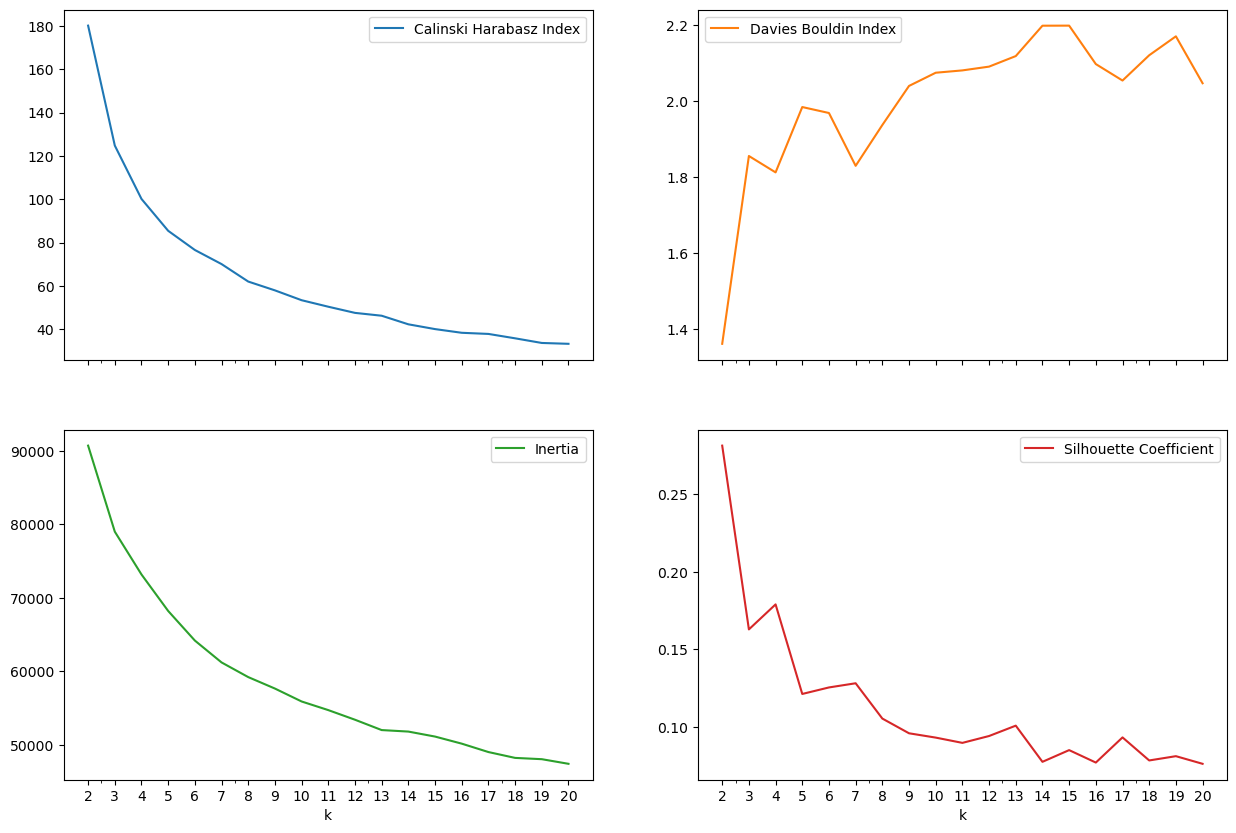

In [240]:
clustering_quality_plots(feature_pssm)

The elbow plot could look better, and the other scores point towards k=2.

#### ProtNLM feature:

This feature was provided by Uniprot, and calculated in collaboration with Google Research. Each protein sequence is transformed into a word embedding, a vector of length 1024.

array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

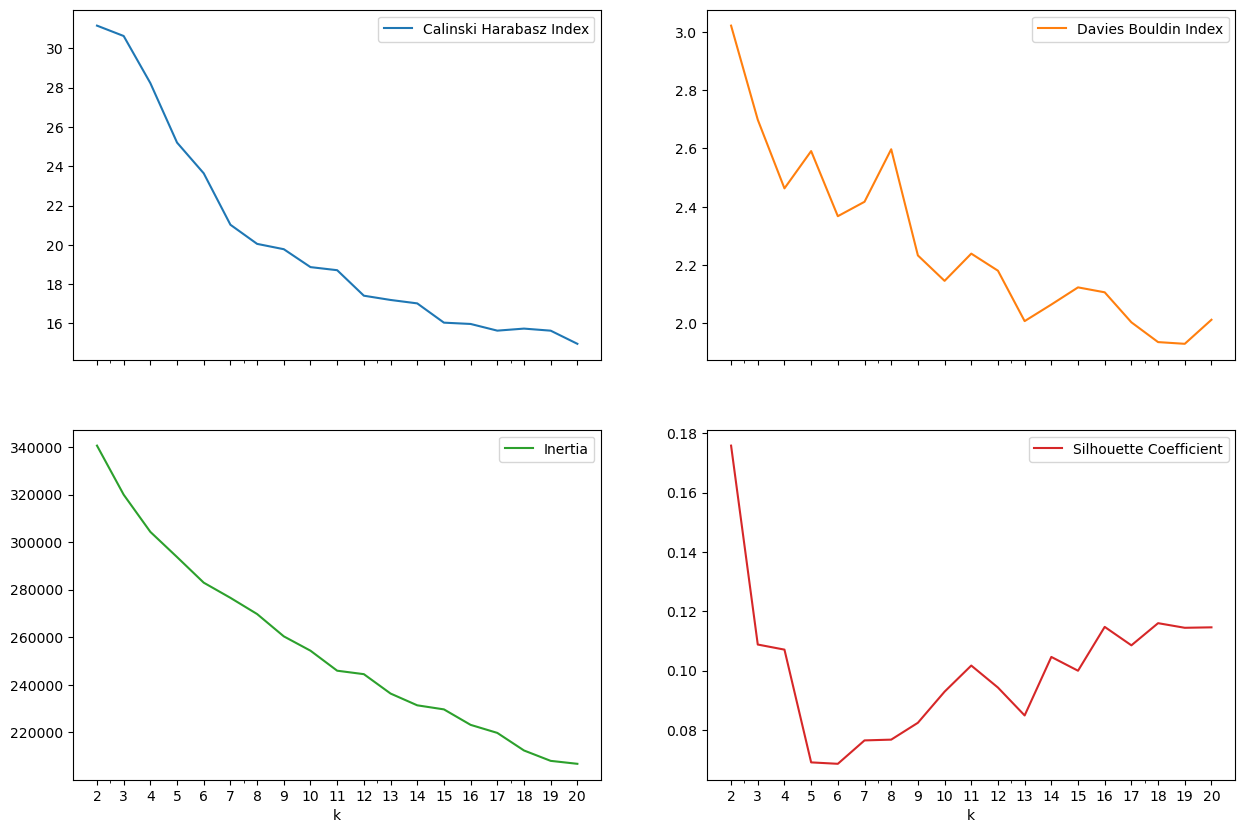

In [241]:
clustering_quality_plots(feature_protnlm)

It actually looks like PSSM feature works better for clustering. We should look at a dendrogram to see what the data looks like.

## Hierarchical clustering using PSSMs

We will try hierarchical clustering first in order to find good annotations to create clusters, then try KMeans again. The clustering looks better when using PSSM instead of embeddings.

Here, we are using Ward clustering. Other methods, like the "single" or "centroid" methods, could be useful later for removing outliers from the individual clusters.

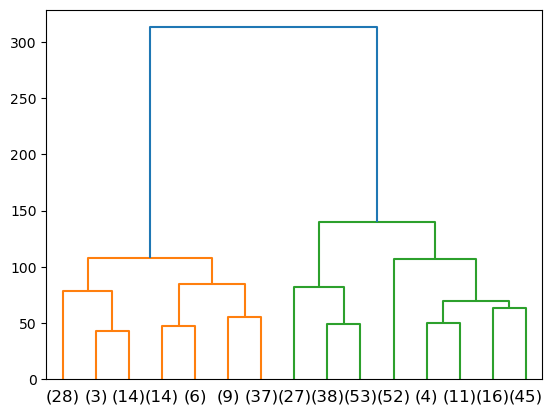

In [242]:
from subpred.clustering import get_linkage, dendrogram_plot, get_cluster_labels

linkage = get_linkage(feature_pssm)
dendrogram = dendrogram_plot(linkage, max_leaves=15)

There seem to be two cluster that can be easily distinguished with Ward-Clustering and PSSM feature. What are they?

#### Analyzing the first two clusters


In [243]:
labels_twoclusters = get_cluster_labels(linkage, n_clusters=2, index=feature_pssm.index.tolist())
labels_twoclusters.value_counts()

2    246
1    111
dtype: int64

Cluster 1 contains roughly half as many proteins as cluster 2.

##### Enrichment analysis

For each cluster, we use a hypergeometric test to calculate p-values. The log fold change is calculated as well, and the percentage of proteins annotated with the annotation that are part of in the cluster. 

Only entries with FDR-adjusted p-value < 0.05 are shown here.

We used the set of transmembrane transport proteins as the reference set for the hypergeometric test, instead of the all the proteins in the genome. If we would use the entire genome instead, then the most significiantly enriched annotations would be related to transmembrane transport, since that is what we filtered the subset for.

In [244]:
from subpred.enrichment_analysis import cluster_enrichment_analysis

reference_set_transmembrane_transporters = set(sequences.index.unique().to_list())
reference_set_whole_genome = set(sequences_all.index.unique().to_list())

cluster_enrichment_analysis(
    cluster_labels=labels_twoclusters, reference_set=reference_set_transmembrane_transporters, annotations_dict=records_all_dict, p_cutoff=0.05
)

CLUSTER 1
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
4,3D-structure,357,116,111,58,36.067227,50.00,0.685364,1.242733e-07,2.386048e-06,1.193024e-05
0,Signal,357,46,111,38,14.302521,82.61,1.409730,1.026404e-14,9.853483e-13,9.853483e-13
1,Direct protein sequencing,357,55,111,37,17.100840,67.27,1.113458,1.681339e-09,8.070427e-08,1.614085e-07
2,Cell outer membrane,357,27,111,23,8.394958,85.19,1.454039,2.078635e-09,5.701398e-08,1.995489e-07
3,Transmembrane beta strand,357,27,111,23,8.394958,85.19,1.454039,2.078635e-09,5.701398e-08,1.995489e-07
11,ATP-binding,357,42,111,21,13.058824,50.00,0.685364,5.081834e-03,4.065467e-02,4.878561e-01
9,Translocase,357,37,111,20,11.504202,54.05,0.797839,1.844908e-03,1.771112e-02,1.771112e-01
5,Periplasm,357,10,111,9,3.109244,90.00,1.533361,1.586527e-04,2.343179e-03,1.523066e-02
6,Disulfide bond,357,10,111,9,3.109244,90.00,1.533361,1.586527e-04,2.343179e-03,1.523066e-02
7,TonB box,357,6,111,6,1.865546,100.00,1.685364,8.214637e-04,9.277707e-03,7.886051e-02


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
4,protein-containing complex,357,155,111,63,48.193277,40.65,0.386520,4.930142e-04,6.507788e-03,3.253894e-02
5,membrane protein complex,357,147,111,60,45.705882,40.82,0.392583,7.039776e-04,7.743754e-03,4.646252e-02
0,outer membrane,357,27,111,23,8.394958,85.19,1.454039,2.078635e-09,9.145993e-08,1.371899e-07
1,cell outer membrane,357,27,111,23,8.394958,85.19,1.454039,2.078635e-09,9.145993e-08,1.371899e-07
2,outer membrane-bounded periplasmic space,357,16,111,14,4.974790,87.50,1.492719,2.822946e-06,5.323269e-05,1.863144e-04
3,periplasmic space,357,16,111,14,4.974790,87.50,1.492719,2.822946e-06,5.323269e-05,1.863144e-04


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,binding,357,119,111,59,37.000000,49.58,0.673190,1.321832e-07,0.000037,0.000037
5,protein binding,357,77,111,38,23.941176,49.35,0.666505,1.158074e-04,0.005443,0.032658
3,channel activity,357,44,111,26,13.680672,59.09,0.926372,3.727963e-05,0.002336,0.010513
4,passive transmembrane transporter activity,357,44,111,26,13.680672,59.09,0.926372,3.727963e-05,0.002336,0.010513
11,ion binding,357,47,111,24,14.613445,51.06,0.715738,1.748256e-03,0.041084,0.493008
9,heterocyclic compound binding,357,38,111,21,11.815126,55.26,0.829754,9.280026e-04,0.024923,0.261697
10,organic cyclic compound binding,357,38,111,21,11.815126,55.26,0.829754,9.280026e-04,0.024923,0.261697
12,carbohydrate derivative binding,357,37,111,20,11.504202,54.05,0.797839,1.844908e-03,0.040020,0.520264
6,identical protein binding,357,27,111,17,8.394958,62.96,1.017940,3.837330e-04,0.015459,0.108213
1,porin activity,357,19,111,15,5.907563,78.95,1.344327,1.399789e-05,0.001579,0.003947


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1.B,357,25,111,21,7.773109,84.0,1.433826,2.070293e-08,1.863264e-07,1.863264e-07


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,3,357,103,111,43,32.025210,41.75,0.425129,4.484665e-03,1.345399e-02,2.690799e-02
0,1,357,42,111,30,13.058824,71.43,1.199938,1.093920e-08,6.563519e-08,6.563519e-08


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,"Peptide/nickel binding protein, MppA-type",357,8,111,8,2.487395,100.00,1.685364,0.000073,0.018401,0.018401
2,Solute-binding protein family 5 domain,357,9,111,8,2.798319,88.89,1.515439,0.000485,0.048865,0.122162
1,Solute-binding protein family 5,357,9,111,8,2.798319,88.89,1.515439,0.000485,0.048865,0.122162
9,"Fimbrial membrane usher, conserved site",357,6,111,6,1.865546,100.00,1.685364,0.000821,0.021790,0.207009
14,"PapC, N-terminal domain superfamily",357,6,111,6,1.865546,100.00,1.685364,0.000821,0.021790,0.207009
13,"PapC, N-terminal domain",357,6,111,6,1.865546,100.00,1.685364,0.000821,0.021790,0.207009
12,"PapC-like, C-terminal domain superfamily",357,6,111,6,1.865546,100.00,1.685364,0.000821,0.021790,0.207009
11,"PapC-like, C-terminal domain",357,6,111,6,1.865546,100.00,1.685364,0.000821,0.021790,0.207009
10,"Outer membrane usher protein FimD, plug domain",357,6,111,6,1.865546,100.00,1.685364,0.000821,0.021790,0.207009
8,Outer membrane usher protein,357,6,111,6,1.865546,100.00,1.685364,0.000821,0.021790,0.207009


CLUSTER 2
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,Cell membrane,357,304,246,228,209.478992,75.00,0.122228,1.236558e-08,6.986555e-07,1.397311e-06
2,Cell inner membrane,357,302,246,226,208.100840,74.83,0.119040,5.559409e-08,2.094044e-06,6.282133e-06
3,Transmembrane,357,295,246,219,203.277311,74.24,0.107482,4.322393e-06,1.221076e-04,4.884304e-04
0,Transmembrane helix,357,268,246,215,184.672269,80.22,0.219369,7.861795e-15,8.883828e-13,8.883828e-13
4,Symport,357,51,246,45,35.142857,88.24,0.356694,5.692928e-04,1.286602e-02,6.433009e-02
5,Antiport,357,19,246,19,13.092437,100.00,0.537266,6.745755e-04,1.270451e-02,7.622703e-02


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,membrane,357,316,246,228,217.747899,72.15,0.066375,3.653903e-04,1.187518e-02,2.375037e-02
0,plasma membrane,357,285,246,222,196.386555,77.89,0.176864,2.190972e-12,1.424132e-10,1.424132e-10


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,secondary active transmembrane transporter act...,357,88,246,76,60.638655,86.36,0.325762,0.000017,0.006927,0.006927


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2.A,357,152,246,133,104.739496,87.5,0.344621,1.484410e-11,1.187528e-10,1.187528e-10


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2,357,152,246,133,104.739496,87.5,0.344621,1.484410e-11,7.422050e-11,7.422050e-11


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


It looks like the first cluster contains channels and pores, some of which are located in the outer membrane. It also contains active proteins (TCDB mechanism 3), and proteins that are part of membrane protein complexes. The TCDB class 1.B (beta barrel channels) is enriched as well. Also, there are some strongly enriched domains in cluster 1 that mostly correspond to "binding" and "beta-barrel" and "outer membrane". 

Cluster 2 contains 86% of the secondary active transporters, and 87% of the total proteins in TCDB class 2.A . The majority of the proteins is located on the inner membrane, and has helical structure. It contains every antiporter, and 88% of the symporters.


So far, the two clusters are clearly distinguishable, but the separation is not 100% perfect for any annotation. Cluster 1 sill contains about 15% of the inner membrane proteins, and cluster 2 contains 15% (i.e. four) of the outer membrane proteins. 

There seem to be some receptor complex domains in cluster 1, which proteins contain those? Let's look at one example:

In [245]:
interpro_ecoli[
    (interpro_ecoli.interpro == "TonB-dependent receptor, plug domain")
    & (
        interpro_ecoli.Uniprot.isin(
            labels_twoclusters[labels_twoclusters == 1].index.tolist()
        )
    )
].merge(sequences.reset_index()[["Uniprot", "protein_names"]], how="left", on="Uniprot")


,Uniprot,interpro,protein_names
0,P05825,"TonB-dependent receptor, plug domain",Ferrienterobactin receptor (Enterobactin outer...
1,P06971,"TonB-dependent receptor, plug domain",Ferrichrome outer membrane transporter/phage r...
2,P16869,"TonB-dependent receptor, plug domain",FhuE receptor (Outer-membrane receptor for Fe(...
3,P75780,"TonB-dependent receptor, plug domain",Catecholate siderophore receptor Fiu (Ferric i...
4,P17315,"TonB-dependent receptor, plug domain",Colicin I receptor
5,P76115,"TonB-dependent receptor, plug domain",Probable TonB-dependent receptor YncD


These proteins seem to be outer-membrane beta barrel proteins that are responsible for siderophore uptake, a large molecule that bacteria use for iron uptake. Therefore they are classified as iron transporters. 

The first cluster also contains many proteins with the "binding" keyword. What are some examples for that?

In [246]:
interpro_ecoli[
    (interpro_ecoli.interpro == "Solute-binding protein family 5")
    & (
        interpro_ecoli.Uniprot.isin(
            labels_twoclusters[labels_twoclusters == 1].index.tolist()
        )
    )
].merge(sequences.reset_index()[["Uniprot", "protein_names"]], how="left", on="Uniprot")


,Uniprot,interpro,protein_names
0,P23847,Solute-binding protein family 5,Dipeptide-binding protein (DBP) (Periplasmic d...
1,P77348,Solute-binding protein family 5,Periplasmic murein peptide-binding protein
2,P33590,Solute-binding protein family 5,Nickel-binding periplasmic protein
3,P23843,Solute-binding protein family 5,Periplasmic oligopeptide-binding protein
4,P75797,Solute-binding protein family 5,Glutathione-binding protein GsiB
5,Q46863,Solute-binding protein family 5,Probable deoxycholate-binding periplasmic prot...
6,P76128,Solute-binding protein family 5,"Probable D,D-dipeptide-binding periplasmic pro..."
7,P33913,Solute-binding protein family 5,Uncharacterized protein YejA


This protein family seems to be involved in outer membrane peptide transport. The "binding" proteins are the parts of a protein complex that actually interacts with the molecule. Most of them are annotated with the GO term "ATP-binding cassette (ABC) transporter complex, substrate-binding subunit-containing"

#### Sub-clusters

What happens when we perform an enrichment analysis on just the left or the right cluster? 

##### Left cluster:

We previously found that cluster 1 contains active transport complex members, outer membrane proteins and beta barrels channels. Can we divide that cluster further?

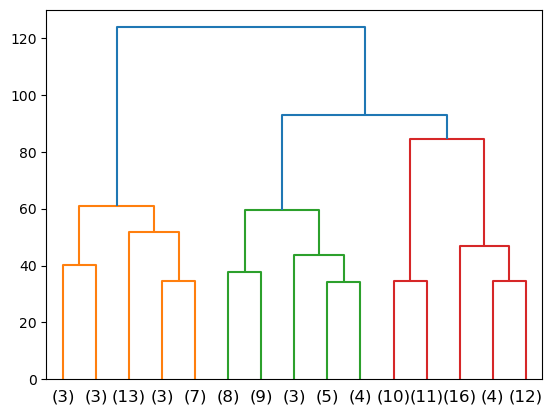

In [247]:
reference_set_leftcluster = labels_twoclusters[labels_twoclusters == 1].index.tolist()
feature_pssm_leftcluster = feature_pssm.loc[reference_set_leftcluster]
linkage_leftcluster = get_linkage(feature_data=feature_pssm_leftcluster)
dendrogram_leftcluster = dendrogram_plot(linkage_leftcluster)

From the dendrogram, we can see that we get four clusters at a minimum distance of ~70 in the dendrogram (i.e. the y axis). This division leads to a adequate sample sizes for machine learning, especially when including electronically annotated data etc.

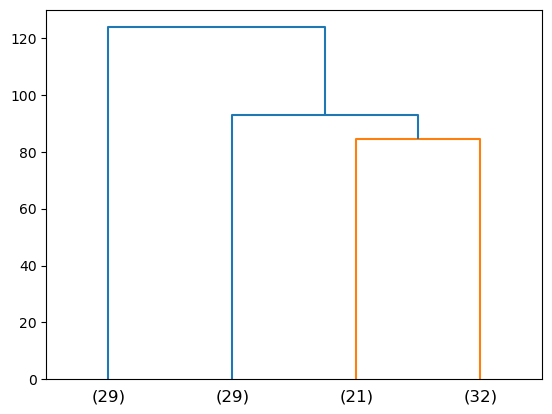

In [248]:
dendrogram_leftcluster = dendrogram_plot(linkage_leftcluster,max_leaves=4)
labels_leftcluster = get_cluster_labels(linkage_leftcluster, n_clusters=4, index = feature_pssm_leftcluster.index)

What do the four clusters represent?

In [249]:
cluster_enrichment_analysis(cluster_labels=labels_leftcluster, reference_set=reference_set_leftcluster, annotations_dict=records_all_dict)

CLUSTER 1
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Transmembrane helix,111,53,29,22,13.846847,41.51,0.667946,0.000401,0.023672,0.023672


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,membrane,111,88,29,29,22.990991,32.95,0.334984,0.000361,0.006131,0.012262
0,plasma membrane,111,63,29,25,16.459459,39.68,0.603011,0.000129,0.004403,0.004403
2,oxidoreductase complex,111,7,29,6,1.828829,85.71,1.714042,0.001193,0.013519,0.040556
3,catalytic complex,111,8,29,6,2.090090,75.00,1.521397,0.003873,0.032916,0.131665


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
3,cellular metabolic process,111,9,29,7,2.351351,77.78,1.573865,0.001097,0.046092,0.184367
0,generation of precursor metabolites and energy,111,6,29,6,1.567568,100.00,1.936435,0.000210,0.017623,0.035245
1,electron transport chain,111,6,29,6,1.567568,100.00,1.936435,0.000210,0.017623,0.035245
2,respiratory electron transport chain,111,6,29,6,1.567568,100.00,1.936435,0.000210,0.017623,0.035245


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3.D,111,6,29,6,1.567568,100.0,1.936435,0.00021,0.001888,0.001888


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


CLUSTER 2
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Signal,111,38,29,29,9.927928,76.32,1.546488,3.886363e-19,1.360227e-17,1.360227e-17
1,Cell outer membrane,111,23,29,20,6.009009,86.96,1.734801,2.451501e-12,3.432101e-11,8.580252e-11
2,Transmembrane beta strand,111,23,29,20,6.009009,86.96,1.734801,2.451501e-12,3.432101e-11,8.580252e-11
3,Disulfide bond,111,9,29,9,2.351351,100.00,1.936435,1.981978e-06,1.734231e-05,6.936922e-05
4,Periplasm,111,9,29,8,2.351351,88.89,1.766510,7.163434e-05,5.014404e-04,2.507202e-03
5,Receptor,111,6,29,6,1.567568,100.00,1.936435,2.097920e-04,1.048960e-03,7.342718e-03
6,TonB box,111,6,29,6,1.567568,100.00,1.936435,2.097920e-04,1.048960e-03,7.342718e-03
7,Fimbrium biogenesis,111,6,29,6,1.567568,100.00,1.936435,2.097920e-04,1.048960e-03,7.342718e-03
8,Iron transport,111,5,29,5,1.306306,100.00,1.936435,9.265811e-04,3.603371e-03,3.243034e-02
9,Iron,111,7,29,5,1.828829,71.43,1.451008,1.280480e-02,4.481681e-02,4.481681e-01


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,outer membrane,111,23,29,19,6.009009,82.61,1.660800,9.774054e-11,1.433528e-09,2.150292e-09
1,cell outer membrane,111,23,29,19,6.009009,82.61,1.660800,9.774054e-11,1.433528e-09,2.150292e-09
2,outer membrane-bounded periplasmic space,111,14,29,11,3.657658,78.57,1.588512,1.542102e-05,9.693211e-05,3.392624e-04
3,periplasmic space,111,14,29,11,3.657658,78.57,1.588512,1.542102e-05,9.693211e-05,3.392624e-04


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
7,channel activity,111,26,29,13,6.792793,50.00,0.936435,0.002446,0.023304,0.198086
8,passive transmembrane transporter activity,111,26,29,13,6.792793,50.00,0.936435,0.002446,0.023304,0.198086
0,porin activity,111,15,29,12,3.918919,80.00,1.614507,0.000004,0.000192,0.000288
1,wide pore channel activity,111,15,29,12,3.918919,80.00,1.614507,0.000004,0.000192,0.000288
2,peptide transmembrane transporter activity,111,13,29,10,3.396396,76.92,1.557923,0.000063,0.001702,0.005106
3,amide transmembrane transporter activity,111,14,29,10,3.657658,71.43,1.451008,0.000182,0.003687,0.014747
4,siderophore-iron transmembrane transporter act...,111,6,29,6,1.567568,100.00,1.936435,0.000210,0.002832,0.016993
5,siderophore uptake transmembrane transporter a...,111,6,29,6,1.567568,100.00,1.936435,0.000210,0.002832,0.016993
6,fimbrial usher porin activity,111,6,29,6,1.567568,100.00,1.936435,0.000210,0.002832,0.016993


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
4,peptide transport,111,11,29,8,2.873874,72.73,1.477003,0.000877,0.016265,0.089458
5,amide transport,111,11,29,8,2.873874,72.73,1.477003,0.000877,0.016265,0.089458
6,cellular component assembly,111,9,29,7,2.351351,77.78,1.573865,0.001097,0.015991,0.111937
7,cellular component organization,111,10,29,7,2.612613,70.00,1.421862,0.002975,0.035696,0.303418
8,cellular component organization or biogenesis,111,10,29,7,2.612613,70.00,1.421862,0.002975,0.035696,0.303418
0,pilus assembly,111,6,29,6,1.567568,100.00,1.936435,0.000210,0.008560,0.021399
1,cell projection organization,111,6,29,6,1.567568,100.00,1.936435,0.000210,0.008560,0.021399
2,cell projection assembly,111,6,29,6,1.567568,100.00,1.936435,0.000210,0.008560,0.021399
3,pilus organization,111,6,29,6,1.567568,100.00,1.936435,0.000210,0.008560,0.021399


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1.B,111,21,29,18,5.486486,85.71,1.714042,1.348221e-10,2.696442e-10,2.696442e-10


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1,111,30,29,18,7.837838,60.0,1.199469,0.000003,0.000006,0.000006


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,"Peptide/nickel binding protein, MppA-type",111,8,29,8,2.090090,100.0,1.936435,0.000010,0.000228,0.000457
2,Solute-binding protein family 5 domain,111,8,29,8,2.090090,100.0,1.936435,0.000010,0.000228,0.000457
1,Solute-binding protein family 5,111,8,29,8,2.090090,100.0,1.936435,0.000010,0.000228,0.000457
9,"Fimbrial membrane usher, conserved site",111,6,29,6,1.567568,100.0,1.936435,0.000210,0.001038,0.009860
14,"PapC, N-terminal domain superfamily",111,6,29,6,1.567568,100.0,1.936435,0.000210,0.001038,0.009860
13,"PapC, N-terminal domain",111,6,29,6,1.567568,100.0,1.936435,0.000210,0.001038,0.009860
12,"PapC-like, C-terminal domain superfamily",111,6,29,6,1.567568,100.0,1.936435,0.000210,0.001038,0.009860
11,"PapC-like, C-terminal domain",111,6,29,6,1.567568,100.0,1.936435,0.000210,0.001038,0.009860
10,"Outer membrane usher protein FimD, plug domain",111,6,29,6,1.567568,100.0,1.936435,0.000210,0.001038,0.009860
8,Outer membrane usher protein,111,6,29,6,1.567568,100.0,1.936435,0.000210,0.001038,0.009860


CLUSTER 3
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Transmembrane helix,111,53,21,21,10.027027,39.62,1.066495,1.369139e-08,3.696676e-07,3.696676e-07
1,Cell inner membrane,111,76,21,21,14.378378,27.63,0.546488,1.251526e-04,1.126373e-03,3.379119e-03
2,Cell membrane,111,76,21,21,14.378378,27.63,0.546488,1.251526e-04,1.126373e-03,3.379119e-03
3,Transmembrane,111,76,21,21,14.378378,27.63,0.546488,1.251526e-04,1.126373e-03,3.379119e-03


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,plasma membrane,111,63,21,20,11.918919,31.75,0.746747,0.000029,0.000465,0.000465


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2.A,111,19,21,10,3.594595,52.63,1.476099,0.000239,0.000957,0.000957


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2,111,19,21,10,3.594595,52.63,1.476099,0.000239,0.000957,0.000957


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,MFS transporter superfamily,111,6,21,6,1.135135,100.0,2.402098,0.000024,0.000935,0.000935
1,Major facilitator superfamily domain,111,5,21,5,0.945946,100.0,2.402098,0.000159,0.002477,0.006192
2,Major facilitator superfamily,111,5,21,5,0.945946,100.0,2.402098,0.000159,0.002477,0.006192
3,Amino acid permease/ SLC12A domain,111,4,21,4,0.756757,100.0,2.402098,0.000999,0.007795,0.038974
4,"Amino acid permease, conserved site",111,4,21,4,0.756757,100.0,2.402098,0.000999,0.007795,0.038974
5,"ABC transporter, permease",111,4,21,4,0.756757,100.0,2.402098,0.000999,0.007795,0.038974


CLUSTER 4
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
3,Cell inner membrane,111,76,32,29,21.909910,38.16,0.404469,8.325553e-04,1.073071e-02,4.828821e-02
4,Cell membrane,111,76,32,29,21.909910,38.16,0.404469,8.325553e-04,1.073071e-02,4.828821e-02
0,ATP-binding,111,21,32,19,6.054054,90.48,1.650026,4.685519e-11,1.811734e-09,2.717601e-09
1,Nucleotide-binding,111,21,32,19,6.054054,90.48,1.650026,4.685519e-11,1.811734e-09,2.717601e-09
2,Translocase,111,20,32,14,5.765766,70.00,1.279843,2.700550e-05,5.221063e-04,1.566319e-03


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
3,protein-containing complex,111,63,32,26,18.162162,41.27,0.517576,0.000715,0.008406,0.033624
4,membrane protein complex,111,60,32,25,17.297297,41.67,0.531381,0.001002,0.009419,0.047095
6,transporter complex,111,51,32,22,14.702703,43.14,0.581422,0.002053,0.013783,0.096480
7,transmembrane transporter complex,111,50,32,21,14.414414,42.00,0.542877,0.005134,0.030160,0.241282
2,plasma membrane protein complex,111,34,32,18,9.801802,52.94,0.876878,0.000300,0.004708,0.014123
0,ATPase dependent transmembrane transport complex,111,30,32,17,8.648649,56.67,0.974988,0.000154,0.007254,0.007254
1,ATP-binding cassette (ABC) transporter complex,111,28,32,16,8.072072,57.14,0.987061,0.000250,0.005877,0.011754
5,ATP-binding cassette (ABC) transporter complex...,111,26,32,14,7.495495,53.85,0.901331,0.001949,0.015271,0.091624


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
15,binding,111,59,32,29,17.009009,49.15,0.769754,1.853565e-07,1.795641e-06,2.873025e-05
3,ion binding,111,24,32,20,6.918919,83.33,1.531381,2.593757e-10,1.005081e-08,4.020323e-08
0,anion binding,111,19,32,18,5.477477,94.74,1.716413,3.226268e-11,5.000715e-09,5.000715e-09
2,nucleotide binding,111,18,32,17,5.189189,94.44,1.711954,1.897301e-10,1.176327e-08,2.940817e-08
14,organic cyclic compound binding,111,21,32,17,6.054054,80.95,1.489561,3.825004e-08,4.088797e-07,5.928756e-06
13,heterocyclic compound binding,111,21,32,17,6.054054,80.95,1.489561,3.825004e-08,4.088797e-07,5.928756e-06
12,carbohydrate derivative binding,111,20,32,17,5.765766,85.00,1.559951,8.623081e-09,1.028137e-07,1.336577e-06
11,small molecule binding,111,19,32,17,5.477477,89.47,1.633951,1.528203e-09,1.973929e-08,2.368715e-07
1,nucleoside phosphate binding,111,18,32,17,5.189189,94.44,1.711954,1.897301e-10,1.176327e-08,2.940817e-08
10,ribonucleotide binding,111,17,32,16,4.900901,94.12,1.706953,1.054161e-09,2.042436e-08,1.633949e-07


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3.A,111,37,32,20,10.666667,54.05,0.906891,0.000055,0.000219,0.000219


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3,111,43,32,20,12.396396,46.51,0.690079,0.001197,0.00479,0.00479


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,"ABC transporter-like, ATP-binding domain",111,17,32,17,4.900901,100.00,1.794416,1.241102e-11,9.928813e-10,9.928813e-10
2,AAA+ ATPase domain,111,18,32,17,5.189189,94.44,1.711954,1.897301e-10,5.059469e-09,1.517841e-08
3,P-loop containing nucleoside triphosphate hydr...,111,19,32,17,5.477477,89.47,1.633951,1.528203e-09,3.056406e-08,1.222563e-07
1,"ABC transporter-like, conserved site",111,16,32,16,4.612613,100.00,1.794416,7.369041e-11,2.947616e-09,5.895232e-09


**Cluster 1.1**

Enrichment in oxidoreductase-driven transport, as well as associated complexes. Electron transport and respiratory system are enriched as well. Majority of proteins has alpha helix, thre remainder could be unknown secondary structure or active part of a complex. The annotations related to catalytic complexes and respiratory system only apply to 6/29 proteins. We should look at the annotations of the remaining proteins. 

**Cluster 1.2**

This cluster contains 19/23 outer membrane proteins and 11/14 periplasmic space proteins, both cellular components are enriched. Some beta barrel channels can be part of both membranes, so there could be some overlap. We get transporters for peptides, amides and siderophores (i.e. iron). The TCDB class 1.B is enriched (18/21 proteins), which contains the beta barrel channels. Usher proteins related to cellular assembly are also in this cluster. Do they facilitate the transport between two bacteria? If that is the case then we should exclude them from the dataset

**Cluster 1.3**

Ths cluster contains all of the remaining known transmembrane helix proteins, i.e. the ones that were not in cluster 1. The Major Facilitator Superfamily (2.A) is enriched in this cluster, it contains 10/19 MFS proteins. Domains related to a amino acid permease in the form of an ABC transporter is also enriched. 

**Cluster 1.4**

Cluster 4 contains molecule-binding proteins from protein complexes in the plasma membrane that transport a variety of small molecules, such as ions, carbohydrates, ribonucleotides, etc. Domains and families related to ABC transport and active transport in general are enriched.

##### Right cluster:

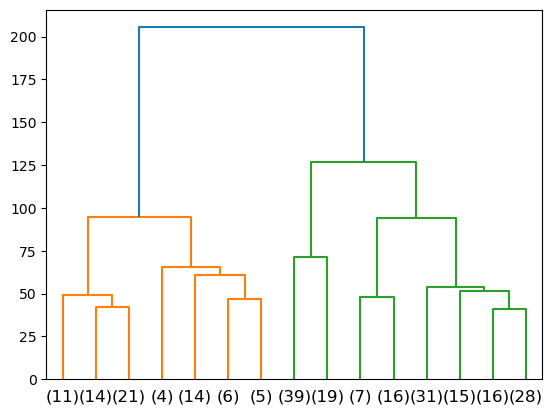

In [250]:
reference_set_rightcluster = labels_twoclusters[labels_twoclusters == 2].index.tolist()
feature_pssm_rightcluster = feature_pssm.loc[reference_set_rightcluster]
linkage_rightcluster = get_linkage(feature_data=feature_pssm_rightcluster)
dendrogram_rightcluster = dendrogram_plot(linkage_rightcluster)

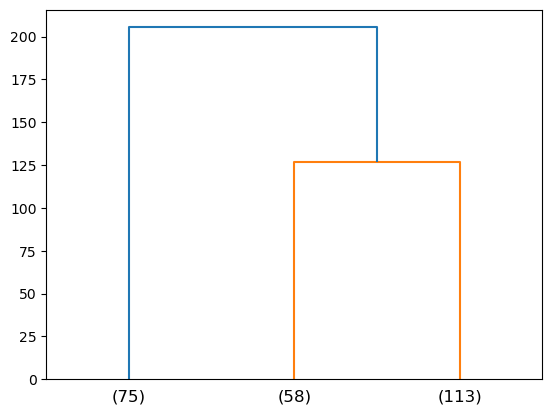

In [251]:
dendrogram_rightcluster = dendrogram_plot(linkage_rightcluster,max_leaves=3)
labels_rightcluster = get_cluster_labels(linkage_rightcluster, n_clusters=3, index = feature_pssm_rightcluster.index)

In [252]:
cluster_enrichment_analysis(cluster_labels=labels_rightcluster, reference_set=reference_set_rightcluster, annotations_dict=records_all_dict, p_cutoff=0.05)

CLUSTER 1
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,4.A,246,18,75,11,5.487805,61.11,1.003202,0.005190,0.036333,0.036333
1,1.B,246,4,75,4,1.219512,100.00,1.713696,0.008163,0.028571,0.057141


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,4,246,18,75,11,5.487805,61.11,1.003202,0.005190,0.025952,0.025952
1,1,246,12,75,8,3.658537,66.67,1.128733,0.008914,0.022285,0.044569


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,"Phosphotransferase system, EIIC",246,7,75,7,2.134146,100.0,1.713696,0.0002,0.030399,0.030399


CLUSTER 2
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Transmembrane helix,246,215,58,58,50.691057,26.98,0.194322,0.000126,0.005911,0.005911
1,Transmembrane,246,219,58,58,51.634146,26.48,0.167727,0.000435,0.010219,0.020438


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,plasma membrane,246,222,58,58,52.341463,26.13,0.148099,0.001084,0.020593,0.020593


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2.A,246,133,58,46,31.357724,34.59,0.552813,0.000006,0.000024,0.000024


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2,246,133,58,46,31.357724,34.59,0.552813,0.000006,0.000024,0.000024


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Major facilitator superfamily,246,26,58,15,6.130081,57.69,1.290984,0.000074,0.005719,0.005719
1,EamA domain,246,5,58,5,1.178862,100.00,2.084534,0.000636,0.024479,0.048958


CLUSTER 3
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


#### Five clusters

If we look at the dendrogram again, it seems like we can divide the left cluster into two sub-clusters, and the right cluster into three:

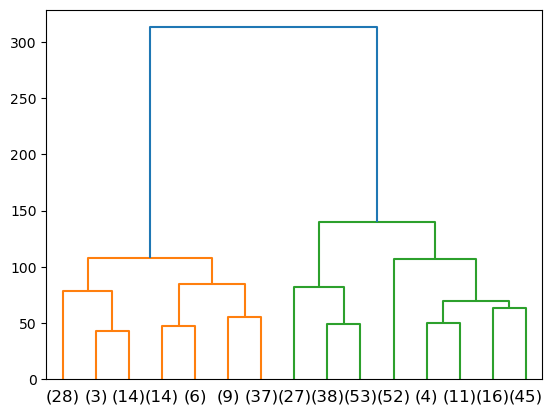

In [253]:
dendrogram = dendrogram_plot(linkage, max_leaves=15)

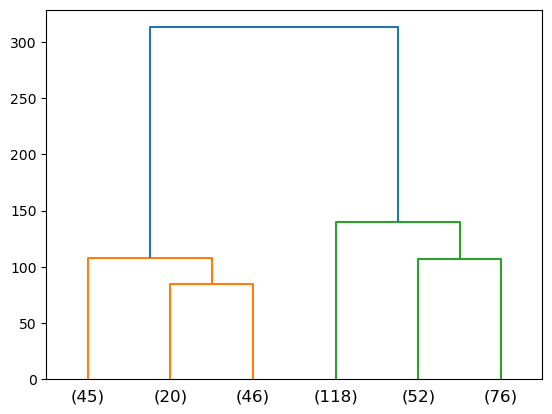

In [254]:
dendrogram = dendrogram_plot(linkage, max_leaves=6)

Clusters 1 is now divided into the new clusters 1 and 2, while the old cluster 2 is now clusters 3, 4 and 5.

In [255]:
labels_clusters = get_cluster_labels(linkage, n_clusters=5, index=feature_pssm.index.tolist())
labels_clusters.value_counts()

3    118
5     76
2     66
4     52
1     45
dtype: int64

In [256]:
# TODO analysis!
# TODO left and right clusters: analysis separately? Would make more sense with reference set
# Problem: The clusters still contain small outliers.
# Next: better filtering with annotations, then try again. Maybe: Only keep proteins with specific substrate annotation?
cluster_enrichment_analysis(cluster_labels=labels_clusters, reference_set=reference_set_transmembrane_transporters, annotations_dict=records_all_dict, p_cutoff=0.05)

CLUSTER 1
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Cell inner membrane,357,302,45,45,38.067227,14.90,0.241376,0.000308,0.018796,0.018796
1,Cell membrane,357,304,45,45,38.319328,14.80,0.231853,0.000425,0.012955,0.025910
3,Transmembrane helix,357,268,45,42,33.781513,15.67,0.314155,0.000916,0.013964,0.055856
2,3D-structure,357,116,45,25,14.621849,21.55,0.773802,0.000541,0.011003,0.033010


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,plasma membrane,357,285,45,44,35.924370,15.44,0.292541,0.000264,0.009238,0.009238
1,oxidoreductase complex,357,11,45,6,1.386555,54.55,2.113458,0.000828,0.014482,0.028963
2,catalytic complex,357,12,45,6,1.512605,50.00,1.987927,0.001497,0.017469,0.052406


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,generation of precursor metabolites and energy,357,10,45,6,1.260504,60.0,2.250962,0.000416,0.046982,0.093964
1,electron transport chain,357,10,45,6,1.260504,60.0,2.250962,0.000416,0.046982,0.093964
2,respiratory electron transport chain,357,10,45,6,1.260504,60.0,2.250962,0.000416,0.046982,0.093964
3,cellular respiration,357,5,45,4,0.630252,80.0,2.665999,0.001015,0.038248,0.229487
4,aerobic respiration,357,5,45,4,0.630252,80.0,2.665999,0.001015,0.038248,0.229487
5,energy derivation by oxidation of organic comp...,357,5,45,4,0.630252,80.0,2.665999,0.001015,0.038248,0.229487
6,"energy coupled proton transmembrane transport,...",357,5,45,4,0.630252,80.0,2.665999,0.001015,0.038248,0.229487
7,electron transport coupled proton transport,357,5,45,4,0.630252,80.0,2.665999,0.001015,0.038248,0.229487


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3.D,357,10,45,6,1.260504,60.0,2.250962,0.000416,0.003326,0.003326


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


CLUSTER 2
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Signal,357,46,66,36,8.504202,78.26,2.081749,2.509921e-22,1.882441e-20,1.882441e-20
13,3D-structure,357,116,66,33,21.445378,28.45,0.621799,8.171944e-04,4.377827e-03,6.128958e-02
3,Direct protein sequencing,357,55,66,27,10.168067,49.09,1.408914,9.833544e-09,1.843790e-07,7.375158e-07
1,Cell outer membrane,357,27,66,23,4.991597,85.19,2.204061,3.735733e-15,1.120720e-13,2.801800e-13
2,Transmembrane beta strand,357,27,66,23,4.991597,85.19,2.204061,3.735733e-15,1.120720e-13,2.801800e-13
6,ATP-binding,357,42,66,20,7.764706,47.62,1.364997,3.310541e-06,3.547008e-05,2.482906e-04
7,Nucleotide-binding,357,44,66,20,8.134454,45.45,1.297883,8.443522e-06,7.915802e-05,6.332642e-04
12,Translocase,357,37,66,15,6.840336,40.54,1.132823,7.660688e-04,4.419628e-03,5.745516e-02
4,Periplasm,357,10,66,9,1.848739,90.00,2.283383,1.345864e-06,1.835269e-05,1.009398e-04
5,Disulfide bond,357,10,66,9,1.848739,90.00,2.283383,1.345864e-06,1.835269e-05,1.009398e-04


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
5,protein-containing complex,357,155,66,46,28.655462,29.68,0.682824,1.766584e-06,1.589926e-05,9.539555e-05
4,membrane protein complex,357,147,66,45,27.176471,30.61,0.727567,8.904808e-07,9.617193e-06,4.808597e-05
6,transporter complex,357,130,66,37,24.033613,28.46,0.622472,2.533416e-04,1.954349e-03,1.368044e-02
7,transmembrane transporter complex,357,127,66,36,23.478992,28.35,0.616626,3.813533e-04,2.574135e-03,2.059308e-02
11,plasma membrane protein complex,357,91,66,27,16.823529,29.67,0.682479,1.688688e-03,7.599097e-03,9.118916e-02
9,ATPase dependent transmembrane transport complex,357,81,66,25,14.974790,30.86,0.739392,1.423236e-03,7.685473e-03,7.685473e-02
10,ATP-binding cassette (ABC) transporter complex,357,77,66,24,14.235294,31.17,0.753562,1.590306e-03,7.806955e-03,8.587651e-02
0,outer membrane,357,27,66,22,4.991597,81.48,2.139930,1.130564e-13,4.070030e-12,6.105044e-12
1,cell outer membrane,357,27,66,22,4.991597,81.48,2.139930,1.130564e-13,4.070030e-12,6.105044e-12
8,ATP-binding cassette (ABC) transporter complex...,357,63,66,22,11.647059,34.92,0.917538,4.302753e-04,2.581652e-03,2.323487e-02


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,binding,357,119,66,45,22.000000,37.82,1.032421,1.177922e-10,2.379402e-08,2.379402e-08
22,protein binding,357,77,66,25,14.235294,32.47,0.812456,5.677372e-04,4.986214e-03,1.146829e-01
3,ion binding,357,47,66,22,8.689076,46.81,1.340229,1.269099e-06,6.408948e-05,2.563579e-04
9,channel activity,357,44,66,20,8.134454,45.45,1.297883,8.443522e-06,1.624373e-04,1.705592e-03
10,passive transmembrane transporter activity,357,44,66,20,8.134454,45.45,1.297883,8.443522e-06,1.624373e-04,1.705592e-03
4,carbohydrate derivative binding,357,37,66,19,6.840336,51.35,1.473860,1.410170e-06,5.697088e-05,2.848544e-04
5,heterocyclic compound binding,357,38,66,19,7.025210,50.00,1.435386,2.431397e-06,7.556035e-05,4.911423e-04
6,organic cyclic compound binding,357,38,66,19,7.025210,50.00,1.435386,2.431397e-06,7.556035e-05,4.911423e-04
7,small molecule binding,357,36,66,18,6.655462,50.00,1.435386,4.906263e-06,1.238831e-04,9.910651e-04
8,anion binding,357,37,66,18,6.840336,48.65,1.395858,8.218351e-06,1.844563e-04,1.660107e-03


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,cellular component assembly,357,10,66,9,1.848739,90.00,2.283383,0.000001,0.000357,0.000357
5,cellular component organization,357,13,66,9,2.403361,69.23,1.904871,0.000060,0.002429,0.015791
6,cellular component organization or biogenesis,357,13,66,9,2.403361,69.23,1.904871,0.000060,0.002429,0.015791
7,iron ion transmembrane transport,357,10,66,7,1.848739,70.00,1.920813,0.000419,0.013879,0.111033
1,pilus assembly,357,6,66,6,1.109244,100.00,2.435386,0.000033,0.002496,0.008735
2,cell projection organization,357,6,66,6,1.109244,100.00,2.435386,0.000033,0.002496,0.008735
3,cell projection assembly,357,6,66,6,1.109244,100.00,2.435386,0.000033,0.002496,0.008735
4,pilus organization,357,6,66,6,1.109244,100.00,2.435386,0.000033,0.002496,0.008735


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,3.A,357,93,66,29,17.193277,31.18,0.754208,3.512964e-04,8.782409e-04,1.756482e-03
0,1.B,357,25,66,21,4.621849,84.00,2.183847,1.499811e-13,7.499054e-13,7.499054e-13


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,3,357,103,66,29,19.042017,28.16,0.606867,2.748784e-03,5.497568e-03,1.099514e-02
0,1,357,42,66,24,7.764706,57.14,1.628031,1.521792e-09,6.087168e-09,6.087168e-09


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
4,P-loop containing nucleoside triphosphate hydr...,357,38,66,18,7.025210,47.37,1.357384,1.342661e-05,0.000360,0.001799
1,AAA+ ATPase domain,357,36,66,18,6.655462,50.00,1.435386,4.906263e-06,0.000329,0.000657
5,"ABC transporter-like, ATP-binding domain",357,35,66,17,6.470588,48.57,1.393566,1.635775e-05,0.000365,0.002192
6,"ABC transporter-like, conserved site",357,32,66,16,5.915966,50.00,1.435386,1.937052e-05,0.000371,0.002596
0,"Peptide/nickel binding protein, MppA-type",357,8,66,8,1.478992,100.00,2.435386,9.498614e-07,0.000127,0.000127
2,Solute-binding protein family 5,357,9,66,8,1.663866,88.89,2.265461,7.285900e-06,0.000279,0.000976
3,Solute-binding protein family 5 domain,357,9,66,8,1.663866,88.89,2.265461,7.285900e-06,0.000279,0.000976
13,"Fimbrial membrane usher, conserved site",357,6,66,6,1.109244,100.00,2.435386,3.296341e-05,0.000327,0.004417
18,"PapC, N-terminal domain superfamily",357,6,66,6,1.109244,100.00,2.435386,3.296341e-05,0.000327,0.004417
17,"PapC, N-terminal domain",357,6,66,6,1.109244,100.00,2.435386,3.296341e-05,0.000327,0.004417


CLUSTER 3
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Transmembrane helix,357,268,118,118,88.582633,44.03,0.413691,3.160906e-19,2.275852e-17,2.275852e-17
1,Transmembrane,357,295,118,118,97.507003,40.00,0.275209,7.320306e-13,2.635310e-11,5.270620e-11
2,Cell membrane,357,304,118,118,100.481793,38.82,0.231853,6.580012e-11,1.579203e-09,4.737608e-09
4,Membrane,357,331,118,118,109.406162,35.65,0.109093,1.825299e-05,2.628431e-04,1.314216e-03
3,Cell inner membrane,357,302,118,116,99.820728,38.41,0.216713,1.553242e-08,2.795835e-07,1.118334e-06
5,Symport,357,51,118,26,16.857143,50.98,0.625152,3.272024e-03,3.926428e-02,2.355857e-01


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,plasma membrane,357,285,118,118,94.201681,41.40,0.324962,3.986291e-15,1.395202e-13,1.395202e-13
1,membrane,357,316,118,118,104.448179,37.34,0.176000,2.043211e-08,3.575619e-07,7.151238e-07
2,cellular anatomical entity,357,334,118,118,110.397759,35.33,0.096076,6.781986e-05,7.912317e-04,2.373695e-03


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,secondary active transmembrane transporter act...,357,88,118,51,29.086835,57.95,0.810131,2.200118e-08,0.000005,0.000005
3,active ion transmembrane transporter activity,357,83,118,41,27.434174,49.40,0.579650,3.132826e-04,0.019502,0.078007
1,symporter activity,357,51,118,31,16.857143,60.78,0.878908,1.028833e-05,0.001281,0.002562
2,solute:cation symporter activity,357,43,118,27,14.212885,62.79,0.925760,1.930407e-05,0.001602,0.004807
4,solute:proton symporter activity,357,32,118,20,10.577031,62.50,0.919065,3.328999e-04,0.016578,0.082892


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2.A,357,152,118,89,50.240896,58.55,0.824943,6.477707e-19,3.238854e-18,3.238854e-18


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2,357,152,118,89,50.240896,58.55,0.824943,6.477707e-19,2.591083e-18,2.591083e-18


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,MFS transporter superfamily,357,46,118,29,15.204482,63.04,0.931556,0.000008,0.001077,0.001077
2,Major facilitator superfamily domain,357,42,118,26,13.882353,61.90,0.905260,0.000042,0.002005,0.006016
1,Major facilitator superfamily,357,31,118,21,10.246499,67.74,1.035258,0.000038,0.002684,0.005367
3,"ABC transporter, BtuC-like",357,7,118,7,2.313725,100.00,1.597137,0.000381,0.013637,0.054549
4,"ABC transporter, permease protein, BtuC-like",357,6,118,6,1.983193,100.00,1.597137,0.001195,0.034191,0.170953


CLUSTER 4
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Transmembrane helix,357,268,52,52,39.036415,19.40,0.413691,8.311004e-08,0.000003,0.000003
1,Transmembrane,357,295,52,52,42.969188,17.63,0.275209,2.051081e-05,0.000400,0.000800
3,Cell inner membrane,357,302,52,52,43.988796,17.22,0.241376,7.813293e-05,0.000762,0.003047
4,Cell membrane,357,304,52,52,44.280112,17.11,0.231853,1.137826e-04,0.000888,0.004438
2,Symport,357,51,52,18,7.428571,35.29,1.276840,4.268621e-05,0.000555,0.001665


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,plasma membrane,357,285,52,52,41.512605,18.25,0.324962,0.000003,0.000077,0.000077
1,membrane,357,316,52,52,46.028011,16.46,0.176000,0.001027,0.013860,0.027720


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,"Major facilitator, sugar transporter-like",357,7,52,6,1.019608,85.71,2.556948,0.000046,0.004085,0.004085
1,"MFS transporter, metabolite:H symporter",357,4,52,4,0.582633,100.00,2.779341,0.000407,0.018103,0.036206


CLUSTER 5
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Nucleotide-binding,357,44,76,23,9.366947,52.27,1.295983,0.000001,0.000085,0.000085
1,ATP-binding,357,42,76,21,8.941176,50.00,1.231853,0.000009,0.000388,0.000777
7,Translocase,357,37,76,15,7.876751,40.54,0.929290,0.003948,0.041457,0.331654
2,Phosphoprotein,357,22,76,14,4.683473,63.64,1.579776,0.000010,0.000287,0.000861
4,Transferase,357,23,76,13,4.896359,56.52,1.408731,0.000136,0.002278,0.011390
6,Phosphotransferase system,357,26,76,12,5.535014,46.15,1.116376,0.002844,0.034122,0.238856
3,Cytoplasm,357,13,76,10,2.767507,76.92,1.853341,0.000019,0.000397,0.001589
5,Kinase,357,18,76,10,3.831933,55.56,1.383856,0.001116,0.015628,0.093766


GO Cellular Component


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,protein-containing complex,357,155,76,54,32.997199,34.84,0.710616,4.122939e-08,1.071964e-06,2.143928e-06
0,membrane protein complex,357,147,76,53,31.294118,36.05,0.760101,1.384027e-08,7.196939e-07,7.196939e-07
2,transmembrane transporter complex,357,127,76,45,27.036415,35.43,0.735021,1.791565e-06,3.105379e-05,9.316136e-05
3,transporter complex,357,130,76,45,27.675070,34.62,0.701338,4.274637e-06,5.557029e-05,2.222811e-04
4,plasma membrane protein complex,357,91,76,33,19.372549,36.26,0.768452,8.504471e-05,8.844650e-04,4.422325e-03
6,ATPase dependent transmembrane transport complex,357,81,76,30,17.243697,37.04,0.798893,1.390684e-04,1.033080e-03,7.231559e-03
5,ATP-binding cassette (ABC) transporter complex,357,77,76,29,16.392157,37.66,0.823047,1.326587e-04,1.149709e-03,6.898253e-03
7,cytosol,357,8,76,6,1.703081,75.00,1.816815,1.527043e-03,9.925780e-03,7.940624e-02


GO Molecular Function


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
14,binding,357,119,76,38,25.333333,31.93,0.584963,0.000525,0.007729,0.115930
11,primary active transmembrane transporter activity,357,51,76,21,10.857143,41.18,0.951745,0.000385,0.007085,0.085016
0,ATP-dependent activity,357,39,76,20,8.302521,51.28,1.268379,0.000010,0.001437,0.002155
18,catalytic activity,357,50,76,20,10.644258,40.00,0.909925,0.000891,0.010362,0.196886
1,ATPase-coupled transmembrane transporter activity,357,39,76,20,8.302521,51.28,1.268379,0.000010,0.001437,0.002155
19,ion binding,357,47,76,19,10.005602,40.43,0.925191,0.001065,0.011767,0.235338
8,anion binding,357,37,76,17,7.876751,45.95,1.109862,0.000330,0.008589,0.073007
13,organic cyclic compound binding,357,38,76,17,8.089636,44.74,1.071388,0.000496,0.008117,0.109574
12,heterocyclic compound binding,357,38,76,17,8.089636,44.74,1.071388,0.000496,0.008117,0.109574
7,carbohydrate derivative binding,357,37,76,17,7.876751,45.95,1.109862,0.000330,0.008589,0.073007


GO Biological Process


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3.A,357,93,76,31,19.798319,33.33,0.646890,0.001091,0.007635,0.007635
1,4.A,357,25,76,12,5.322129,48.00,1.172959,0.001853,0.006486,0.012972


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,3,357,103,76,32,21.927171,31.07,0.545352,0.003730,0.009324,0.018648
0,4,357,25,76,12,5.322129,48.00,1.172959,0.001853,0.009266,0.009266


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,P-loop containing nucleoside triphosphate hydr...,357,38,76,19,8.089636,50.00,1.231853,0.000028,0.004405,0.004405
1,"ABC transporter-like, ATP-binding domain",357,35,76,18,7.450980,51.43,1.272495,0.000030,0.002294,0.004588
2,AAA+ ATPase domain,357,36,76,18,7.663866,50.00,1.231853,0.000049,0.002545,0.007634
5,"ABC transporter-like, conserved site",357,32,76,16,6.812325,50.00,1.231853,0.000145,0.003742,0.022455
3,PTS system IIB component-like superfamily,357,8,76,7,1.703081,87.50,2.039208,0.000105,0.003607,0.016231
4,"Phosphotransferase system, EIIB component, typ...",357,8,76,7,1.703081,87.50,2.039208,0.000105,0.003607,0.016231
7,"Phosphotransferase system, EIIB component, type 2",357,7,76,6,1.490196,85.71,2.009460,0.000460,0.008918,0.071346
6,"ABC transporter type 1, transmembrane domain",357,5,76,5,1.064426,100.00,2.231853,0.000393,0.008707,0.060949
9,"ABC transporter type 1, transmembrane domain s...",357,6,76,5,1.277311,83.33,1.968818,0.001963,0.030423,0.304227
8,"Phosphotransferase system, fructose-specific I...",357,4,76,4,0.851541,100.00,2.231853,0.001928,0.033202,0.298821


## Hierarchical clustering using only keywords

Filtering for proteins with direct substrate annotation

In [257]:
keywords_transport = {
    "Ion transport",
    "Anion exchange",
    "Protein transport",
    "Sodium/potassium transport",
    "Polysaccharide transport",
    "Bacteriocin transport",
    "Peptide transport",
    "Translocation",
    "Bacterial flagellum protein export",
    "Amino-acid transport",
    "Electron transport",
    "Lipid transport",
    "mRNA transport",
    "Neurotransmitter transport",
    "Oxygen transport",
    "Phosphate transport",
    "Ammonia transport",
    "Phosphonate transport",
    "Viral movement protein",
    "Sulfate transport",
    "Sugar transport",
    "Calcium transport",
    "Cobalt transport",
    "Copper transport",
    "Hydrogen ion transport",
    "Iron transport",
    "Zinc transport",
    "Nickel transport",
    "Potassium transport",
    "Sodium transport",
    "Chloride",
}


In [258]:
sequences_all

# TODO uniref keywords are predicted, not experimental!
keywords_ecoli_substrate = keywords_ecoli[keywords_ecoli.keyword.isin(keywords_transport)].reset_index(drop=True)
keywords_ecoli_substrate



,Uniprot,keyword
0,P02916,Sugar transport
1,P02925,Sugar transport
2,P02929,Bacteriocin transport
3,P02929,Protein transport
4,P03959,Ion transport
...,...,...
530,P52636,Electron transport
531,P68646,Electron transport
532,Q46833,Protein transport
533,P45757,Protein transport


In [259]:
sequences_substrate_keywords = sequences_all.loc[keywords_ecoli_substrate.Uniprot.unique()]
sequences_substrate_keywords = sequences_substrate_keywords[sequences_substrate_keywords.index.isin(go_annotations_tmtp.Uniprot.unique())]

In [260]:
feature_pssm_keywords = calculate_pssm_feature(
    sequences=sequences_substrate_keywords.sequence,
    tmp_folder="../data/intermediate/blast/pssm_uniref50_3it/",
    blast_db="../data/raw/uniref/uniref50/uniref50.fasta",
    iterations=3,
    verbose=False,
    psiblast_threads=80
)
feature_pssm_keywords

,AA,AR,AN,AD,AC,AQ,AE,AG,AH,AI,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
P02916,0.819672,0.370902,0.387295,0.325820,0.336066,0.397541,0.350410,0.530738,0.319672,0.497951,...,0.665984,0.415984,0.633197,0.594262,0.411885,0.510246,0.606557,0.446721,0.508197,0.725410
P03959,0.936430,0.342298,0.420538,0.322738,0.586797,0.386308,0.344743,0.616137,0.371638,0.501222,...,0.660147,0.337408,0.745721,0.647922,0.418093,0.559902,0.603912,0.518337,0.518337,0.792176
P05825,0.724662,0.339527,0.407095,0.371622,0.234797,0.385135,0.337838,0.530405,0.315878,0.378378,...,0.592905,0.290541,0.500000,0.530405,0.300676,0.398649,0.496622,0.427365,0.423986,0.717905
P0AAD6,0.787425,0.281437,0.419162,0.215569,0.541916,0.299401,0.251497,0.565868,0.323353,0.661677,...,0.703593,0.338323,0.706587,0.682635,0.356287,0.535928,0.568862,0.544910,0.592814,0.781437
P0AAD8,0.791531,0.390879,0.469055,0.397394,0.677524,0.462541,0.377850,0.625407,0.423453,0.674267,...,0.713355,0.410423,0.732899,0.742671,0.420195,0.570033,0.625407,0.563518,0.605863,0.785016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P0A843,0.717949,0.384615,0.474359,0.500000,0.205128,0.474359,0.576923,0.641026,0.320513,0.346154,...,0.641026,0.410256,0.589744,0.525641,0.384615,0.423077,0.500000,0.320513,0.435897,0.743590
P45539,0.911765,0.289593,0.371041,0.255656,0.470588,0.343891,0.280543,0.640271,0.278281,0.597285,...,0.690045,0.414027,0.678733,0.606335,0.484163,0.601810,0.662896,0.472851,0.486425,0.830317
P75826,0.714286,0.411429,0.414286,0.365714,0.551429,0.431429,0.397143,0.597143,0.457143,0.565714,...,0.642857,0.434286,0.631429,0.634286,0.468571,0.531429,0.582857,0.488571,0.520000,0.728571
P76128,0.928736,0.250575,0.310345,0.287356,0.225287,0.381609,0.335632,0.452874,0.280460,0.379310,...,0.648276,0.340230,0.588506,0.581609,0.308046,0.404598,0.535632,0.425287,0.508046,0.859770


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
Uniprot,,,,,,,,,,,,,,,,,,,,,
P02916,0.010300,0.080383,0.056885,0.034698,0.031525,0.022995,-0.030945,-0.037567,0.042816,-0.010796,...,-0.024963,-0.022446,-0.000171,-0.046082,0.042053,-0.053955,-0.039642,-0.031525,-0.041718,0.017944
P03959,0.025909,0.126099,0.006119,0.035278,-0.004730,0.042938,-0.029327,-0.038696,0.002594,-0.082703,...,-0.004604,-0.014725,-0.009979,-0.030670,0.023117,-0.051910,-0.019653,-0.017334,-0.018646,0.016357
P05825,0.053955,0.033478,0.056885,0.033112,0.042786,-0.027786,-0.003395,-0.013596,0.064453,0.022583,...,-0.014297,-0.019241,-0.038879,-0.015221,0.074341,-0.015099,-0.027710,-0.004265,-0.045197,-0.001211
P0AAD6,0.018661,0.125000,0.028625,0.026184,0.010612,0.024185,-0.019943,-0.036438,0.029083,-0.038940,...,-0.034515,0.003023,0.027237,-0.035645,0.059235,-0.050781,-0.029648,-0.003340,-0.012543,0.006695
P0AAD8,0.008408,0.095642,0.017944,0.023651,0.000017,0.017029,-0.007919,-0.038269,0.038330,-0.037720,...,-0.039276,-0.008675,0.033600,-0.036194,0.047882,-0.047424,-0.025833,-0.008163,0.005672,0.011299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P0A843,-0.004459,0.017624,0.008377,0.001963,-0.023682,0.003561,0.051147,-0.023010,0.000399,0.009888,...,-0.075500,-0.008049,-0.060822,-0.071838,-0.059418,-0.048035,-0.044891,-0.002670,0.017578,0.062439
P45539,-0.025604,0.040894,-0.008926,0.015884,-0.047333,0.015182,-0.015015,-0.017899,-0.021454,-0.056213,...,-0.012024,-0.051117,0.008102,-0.100830,0.038452,0.015594,-0.020660,-0.055634,0.046509,-0.002180
P75826,0.033661,0.057709,0.028580,0.044678,0.015495,0.015656,0.011452,-0.051300,0.054230,0.007256,...,-0.033234,0.044037,0.013901,-0.058044,-0.000068,-0.022720,-0.043152,0.003742,-0.020599,0.015640


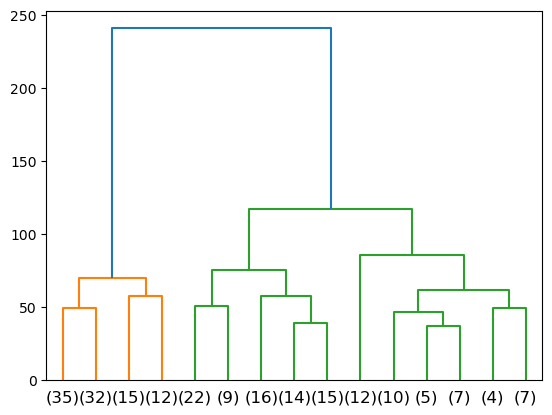

2    121
1     94
dtype: int64

CLUSTER 1
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
2,Cell inner membrane,215,181,94,90,79.134884,49.72,0.185611,1.818258e-05,3.688467e-04,1.290964e-03
3,Cell membrane,215,181,94,90,79.134884,49.72,0.185611,1.818258e-05,3.688467e-04,1.290964e-03
0,Transmembrane helix,215,157,94,89,68.641860,56.69,0.374717,2.674631e-11,1.898988e-09,1.898988e-09
1,Transmembrane,215,175,94,89,76.511628,50.86,0.218126,4.026345e-06,1.429352e-04,2.858705e-04
4,Symport,215,31,94,21,13.553488,67.74,0.631725,3.303760e-03,4.691339e-02,2.345669e-01


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2.A,215,83,94,59,36.288372,71.08,0.701208,1.139016e-10,4.556065e-10,4.556065e-10


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2,215,83,94,59,36.288372,71.08,0.701208,1.139016e-10,4.556065e-10,4.556065e-10


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


CLUSTER 2
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
6,3D-structure,215,78,121,56,43.897674,71.79,0.351282,3.981792e-04,0.005119,0.035836
0,Direct protein sequencing,215,44,121,40,24.762791,90.91,0.691826,4.054122e-08,0.000004,0.000004
1,Signal,215,29,121,28,16.320930,96.55,0.778704,3.260382e-07,0.000015,0.000029
5,Nucleotide-binding,215,30,121,26,16.883721,86.67,0.622879,1.637954e-04,0.002457,0.014742
4,ATP-binding,215,28,121,25,15.758140,89.29,0.665831,7.510187e-05,0.001352,0.006759
8,Translocase,215,23,121,20,12.944186,86.96,0.627696,1.097769e-03,0.010978,0.098799
2,Cell outer membrane,215,18,121,18,10.130233,100.00,0.829330,1.763293e-05,0.000453,0.001587
3,Transmembrane beta strand,215,18,121,18,10.130233,100.00,0.829330,1.763293e-05,0.000453,0.001587
7,Porin,215,12,121,12,6.753488,100.00,0.829330,7.855134e-04,0.008837,0.070696


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,3.A,215,64,121,45,36.018605,70.31,0.321183,0.005004,0.017514,0.035028
0,1.B,215,18,121,18,10.130233,100.00,0.829330,0.000018,0.000123,0.000123


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,3,215,68,121,49,38.269767,72.06,0.356577,0.001101,0.002753,0.005507
0,1,215,26,121,23,14.632558,88.46,0.652452,0.000226,0.001129,0.001129


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,P-loop containing nucleoside triphosphate hydr...,215,25,121,23,14.069767,92.00,0.709035,0.000051,0.014001,0.014001
1,AAA+ ATPase domain,215,23,121,21,12.944186,91.30,0.698085,0.000162,0.022085,0.044171
2,"ABC transporter-like, ATP-binding domain",215,22,121,20,12.381395,90.91,0.691826,0.000284,0.025833,0.077499
3,"ABC transporter-like, conserved site",215,20,121,18,11.255814,90.00,0.677327,0.000852,0.046505,0.232527


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


In [137]:
import matplotlib.pyplot as plt
linkage = get_linkage(feature_pssm_keywords)
dendrogram = dendrogram_plot(linkage)
plt.show()
labels = get_cluster_labels(linkage=linkage, n_clusters=2, index=feature_pssm_keywords.index.tolist())
display(labels.value_counts())
records_not_go_dict = {k:v for k,v in records_all_dict.items() if "GO" not in k}
records_not_go_dict["Keywords substrates"] = keywords_ecoli_substrate.to_records(index=False).tolist()
reference_set = set(sequences_substrate_keywords.index.tolist())
cluster_enrichment_analysis(labels, reference_set, annotations_dict=records_not_go_dict,p_cutoff=0.05)

In [135]:
reference_set = set(sequences_substrate_keywords.index.tolist())
cluster_enrichment_analysis(labels, reference_set, annotations_dict=records_not_go_dict,p_cutoff=0.05)

CLUSTER 1
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
2,Cell inner membrane,215,181,94,90,79.134884,49.72,0.185611,1.818258e-05,3.688467e-04,1.290964e-03
3,Cell membrane,215,181,94,90,79.134884,49.72,0.185611,1.818258e-05,3.688467e-04,1.290964e-03
0,Transmembrane helix,215,157,94,89,68.641860,56.69,0.374717,2.674631e-11,1.898988e-09,1.898988e-09
1,Transmembrane,215,175,94,89,76.511628,50.86,0.218126,4.026345e-06,1.429352e-04,2.858705e-04
4,Symport,215,31,94,21,13.553488,67.74,0.631725,3.303760e-03,4.691339e-02,2.345669e-01


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2.A,215,83,94,59,36.288372,71.08,0.701208,1.139016e-10,4.556065e-10,4.556065e-10


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2,215,83,94,59,36.288372,71.08,0.701208,1.139016e-10,4.556065e-10,4.556065e-10


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


CLUSTER 2
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
6,3D-structure,215,78,121,56,43.897674,71.79,0.351282,3.981792e-04,0.005119,0.035836
0,Direct protein sequencing,215,44,121,40,24.762791,90.91,0.691826,4.054122e-08,0.000004,0.000004
1,Signal,215,29,121,28,16.320930,96.55,0.778704,3.260382e-07,0.000015,0.000029
5,Nucleotide-binding,215,30,121,26,16.883721,86.67,0.622879,1.637954e-04,0.002457,0.014742
4,ATP-binding,215,28,121,25,15.758140,89.29,0.665831,7.510187e-05,0.001352,0.006759
8,Translocase,215,23,121,20,12.944186,86.96,0.627696,1.097769e-03,0.010978,0.098799
2,Cell outer membrane,215,18,121,18,10.130233,100.00,0.829330,1.763293e-05,0.000453,0.001587
3,Transmembrane beta strand,215,18,121,18,10.130233,100.00,0.829330,1.763293e-05,0.000453,0.001587
7,Porin,215,12,121,12,6.753488,100.00,0.829330,7.855134e-04,0.008837,0.070696


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,3.A,215,64,121,45,36.018605,70.31,0.321183,0.005004,0.017514,0.035028
0,1.B,215,18,121,18,10.130233,100.00,0.829330,0.000018,0.000123,0.000123


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,3,215,68,121,49,38.269767,72.06,0.356577,0.001101,0.002753,0.005507
0,1,215,26,121,23,14.632558,88.46,0.652452,0.000226,0.001129,0.001129


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,P-loop containing nucleoside triphosphate hydr...,215,25,121,23,14.069767,92.00,0.709035,0.000051,0.014001,0.014001
1,AAA+ ATPase domain,215,23,121,21,12.944186,91.30,0.698085,0.000162,0.022085,0.044171
2,"ABC transporter-like, ATP-binding domain",215,22,121,20,12.381395,90.91,0.691826,0.000284,0.025833,0.077499
3,"ABC transporter-like, conserved site",215,20,121,18,11.255814,90.00,0.677327,0.000852,0.046505,0.232527


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


### With 3 clusters

Now, we get different enriched TCDB classes for each cluster: 2A 3A an 1B.

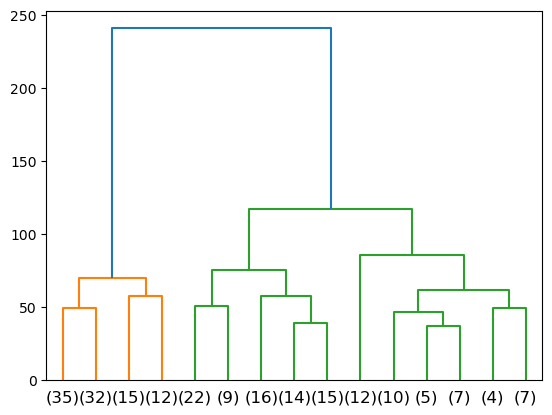

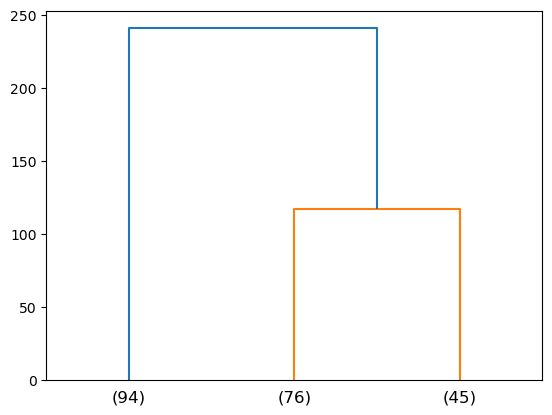

1    94
2    76
3    45
dtype: int64

CLUSTER 1
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
2,Cell inner membrane,215,181,94,90,79.134884,49.72,0.185611,1.818258e-05,3.688467e-04,1.290964e-03
3,Cell membrane,215,181,94,90,79.134884,49.72,0.185611,1.818258e-05,3.688467e-04,1.290964e-03
0,Transmembrane helix,215,157,94,89,68.641860,56.69,0.374717,2.674631e-11,1.898988e-09,1.898988e-09
1,Transmembrane,215,175,94,89,76.511628,50.86,0.218126,4.026345e-06,1.429352e-04,2.858705e-04
4,Symport,215,31,94,21,13.553488,67.74,0.631725,3.303760e-03,4.691339e-02,2.345669e-01


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2.A,215,83,94,59,36.288372,71.08,0.701208,1.139016e-10,4.556065e-10,4.556065e-10


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2,215,83,94,59,36.288372,71.08,0.701208,1.139016e-10,4.556065e-10,4.556065e-10


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


CLUSTER 2
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Nucleotide-binding,215,30,76,19,10.604651,63.33,0.841302,0.000734,0.048425,0.048425
1,ATP-binding,215,28,76,18,9.897674,64.29,0.862835,0.000811,0.026760,0.053519


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3.A,215,64,76,33,22.623256,51.56,0.544659,0.001142,0.00685,0.00685


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3,215,68,76,34,24.037209,50.0,0.500265,0.001998,0.009989,0.009989


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


CLUSTER 3
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
8,3D-structure,215,78,45,26,16.325581,33.33,0.671377,8.122045e-04,5.775676e-03,5.198109e-02
0,Signal,215,29,45,25,6.069767,86.21,2.042215,1.584897e-16,1.014334e-14,1.014334e-14
4,Direct protein sequencing,215,44,45,24,9.209302,54.55,1.381871,1.573314e-08,2.013842e-07,1.006921e-06
1,Cell outer membrane,215,18,45,18,3.767442,100.00,2.256340,2.369936e-14,6.067037e-13,1.516759e-12
2,Transmembrane beta strand,215,18,45,18,3.767442,100.00,2.256340,2.369936e-14,6.067037e-13,1.516759e-12
3,Porin,215,12,45,12,2.511628,100.00,2.256340,1.930303e-09,3.088485e-08,1.235394e-07
5,Receptor,215,6,45,6,1.255814,100.00,2.256340,6.370263e-05,6.794947e-04,4.076968e-03
6,TonB box,215,5,45,5,1.046512,100.00,2.256340,3.344388e-04,2.853878e-03,2.140408e-02
7,Disulfide bond,215,5,45,5,1.046512,100.00,2.256340,3.344388e-04,2.853878e-03,2.140408e-02
9,Periplasm,215,6,45,5,1.255814,83.33,1.993305,1.688120e-03,1.080397e-02,1.080397e-01


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1.B,215,18,45,18,3.767442,100.0,2.25634,2.369936e-14,1.421962e-13,1.421962e-13


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1,215,26,45,19,5.44186,73.08,1.803828,8.208449e-10,3.283379e-09,3.283379e-09


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,"TonB-dependent receptor, plug domain",215,5,45,5,1.046512,100.0,2.25634,0.000334,0.013378,0.040133
1,"TonB-dependent receptor, plug domain superfamily",215,5,45,5,1.046512,100.0,2.25634,0.000334,0.013378,0.040133
2,"TonB-dependent receptor-like, beta-barrel",215,5,45,5,1.046512,100.0,2.25634,0.000334,0.013378,0.040133
3,"TonB box, conserved site",215,5,45,5,1.046512,100.0,2.25634,0.000334,0.013378,0.040133
4,"TonB-dependent receptor-like, beta-barrel doma...",215,5,45,5,1.046512,100.0,2.25634,0.000334,0.013378,0.040133
5,"TonB-dependent receptor, conserved site",215,4,45,4,0.837209,100.0,2.25634,0.001721,0.022948,0.206536
6,TonB-dependent siderophore receptor,215,4,45,4,0.837209,100.0,2.25634,0.001721,0.022948,0.206536
7,Porin domain superfamily,215,4,45,4,0.837209,100.0,2.25634,0.001721,0.022948,0.206536
8,"Peptide/nickel binding protein, MppA-type",215,4,45,4,0.837209,100.0,2.25634,0.001721,0.022948,0.206536
9,Solute-binding protein family 5,215,4,45,4,0.837209,100.0,2.25634,0.001721,0.022948,0.206536


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


In [142]:
import matplotlib.pyplot as plt
n_clusters = 3
linkage = get_linkage(feature_pssm_keywords)
dendrogram = dendrogram_plot(linkage)
plt.show()
dendrogram = dendrogram_plot(linkage,max_leaves=n_clusters)
plt.show()
labels = get_cluster_labels(linkage=linkage, n_clusters=3, index=feature_pssm_keywords.index.tolist())
display(labels.value_counts())
records_not_go_dict = {k:v for k,v in records_all_dict.items() if "GO" not in k}
records_not_go_dict["Keywords substrates"] = keywords_ecoli_substrate.to_records(index=False).tolist()
reference_set = set(sequences_substrate_keywords.index.tolist())
cluster_enrichment_analysis(labels, reference_set, annotations_dict=records_not_go_dict,p_cutoff=0.05)

### With 6 clusters

The dendrogram looks like we can split the clusters again:

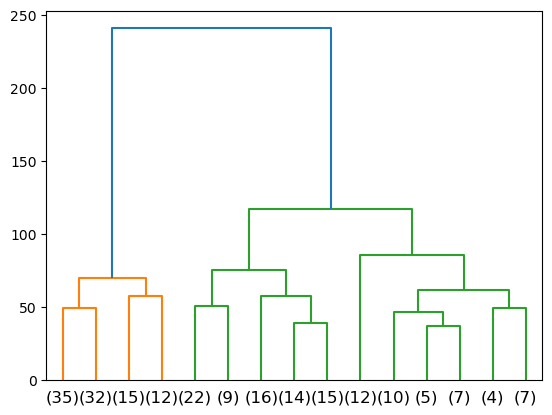

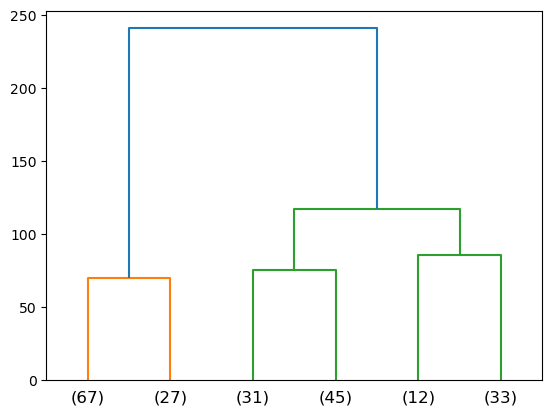

1    67
4    45
6    33
3    31
2    27
5    12
dtype: int64

CLUSTER 1
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Transmembrane helix,215,157,67,67,48.925581,42.68,0.453572,4.350402e-12,2.479729e-10,2.479729e-10
1,Transmembrane,215,175,67,67,54.534884,38.29,0.296982,4.677616e-08,1.333121e-06,2.666241e-06
2,Cell inner membrane,215,181,67,67,56.404651,37.02,0.248347,7.877550e-07,1.282915e-05,4.490204e-05
3,Cell membrane,215,181,67,67,56.404651,37.02,0.248347,7.877550e-07,1.282915e-05,4.490204e-05
4,Membrane,215,199,67,67,62.013953,33.67,0.111568,1.943137e-03,2.215176e-02,1.107588e-01
5,Symport,215,31,67,17,9.660465,54.84,0.815370,2.698185e-03,2.563275e-02,1.537965e-01


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2.A,215,83,67,47,25.865116,56.63,0.861653,2.207186e-10,8.828743e-10,8.828743e-10


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2,215,83,67,47,25.865116,56.63,0.861653,2.207186e-10,8.828743e-10,8.828743e-10


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


CLUSTER 2
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


CLUSTER 3
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,ATP-binding,215,28,31,17,4.037209,60.71,2.074104,3.971159e-10,2.104714e-08,2.104714e-08
1,Nucleotide-binding,215,30,31,17,4.325581,56.67,1.974569,1.913646e-09,5.071162e-08,1.014232e-07
2,Translocase,215,23,31,13,3.316279,56.52,1.970874,4.203403e-07,7.426013e-06,2.227804e-05


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3.A,215,64,31,19,9.227907,29.69,1.041924,0.000079,0.000317,0.000317


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3,215,68,31,19,9.804651,27.94,0.954461,0.000224,0.000896,0.000896


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,"ABC transporter-like, ATP-binding domain",215,22,31,15,3.172093,68.18,2.241456,6.552396e-10,5.372965e-08,5.372965e-08
1,AAA+ ATPase domain,215,23,31,15,3.316279,65.22,2.177325,1.738092e-09,7.126177e-08,1.425235e-07
2,P-loop containing nucleoside triphosphate hydr...,215,25,31,15,3.604651,60.00,2.057031,9.852818e-09,2.693103e-07,8.079310e-07
3,"ABC transporter-like, conserved site",215,20,31,13,2.883721,65.00,2.172508,3.724617e-08,7.635465e-07,3.054186e-06
4,"Oligopeptide/dipeptide ABC transporter, C-term...",215,3,31,3,0.432558,100.00,2.793997,2.752004e-03,4.513287e-02,2.256644e-01


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


CLUSTER 4
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Transmembrane helix,215,157,45,45,32.860465,28.66,0.453572,9.293357e-08,0.000005,0.000005
1,Transmembrane,215,175,45,45,36.627907,25.71,0.296982,2.720170e-05,0.000666,0.001333
2,Cell inner membrane,215,181,45,45,37.883721,24.86,0.248347,1.554647e-04,0.002177,0.007618
3,Cell membrane,215,181,45,45,37.883721,24.86,0.248347,1.554647e-04,0.002177,0.007618


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,"Phosphotransferase system, EIIC",215,12,45,9,2.511628,75.0,1.841302,0.000051,0.005308,0.005308
1,"ABC transporter, permease",215,5,45,5,1.046512,100.0,2.256340,0.000334,0.017391,0.034782


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


CLUSTER 5
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Electron transport,215,5,12,3,0.279070,60.0,3.426265,0.001262,0.042923,0.042923
1,Respiratory chain,215,2,12,2,0.111628,100.0,4.163230,0.002869,0.048772,0.097544


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3.D,215,4,12,3,0.223256,75.0,3.748193,0.000522,0.002086,0.002086


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Electron transport,215,5,12,3,0.27907,60.0,3.426265,0.001262,0.008837,0.008837


CLUSTER 6
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Signal,215,29,33,23,4.451163,79.31,2.369380,6.372331e-18,3.058719e-16,3.058719e-16
4,Direct protein sequencing,215,44,33,21,6.753488,47.73,1.636685,2.375738e-09,2.280708e-08,1.140354e-07
9,3D-structure,215,78,33,20,11.972093,25.64,0.740325,1.804311e-03,8.660694e-03,8.660694e-02
1,Cell outer membrane,215,18,33,18,2.762791,100.00,2.703799,1.432497e-17,2.750394e-16,6.875985e-16
2,Transmembrane beta strand,215,18,33,18,2.762791,100.00,2.703799,1.432497e-17,2.750394e-16,6.875985e-16
3,Porin,215,12,33,12,1.841860,100.00,2.703799,2.381448e-11,2.857738e-10,1.143095e-09
5,Receptor,215,6,33,6,0.920930,100.00,2.703799,8.662305e-06,6.929844e-05,4.157906e-04
6,TonB box,215,5,33,5,0.767442,100.00,2.703799,6.496728e-05,4.157906e-04,3.118430e-03
7,Disulfide bond,215,5,33,5,0.767442,100.00,2.703799,6.496728e-05,4.157906e-04,3.118430e-03
8,Periplasm,215,6,33,5,0.920930,83.33,2.440764,3.464922e-04,1.847958e-03,1.663162e-02


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1.B,215,18,33,18,2.762791,100.0,2.703799,1.432497e-17,4.297491e-17,4.297491e-17


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1,215,26,33,18,3.990698,69.23,2.173284,1.217010e-11,3.651029e-11,3.651029e-11


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,"TonB-dependent receptor, plug domain",215,5,33,5,0.767442,100.0,2.703799,0.000065,0.001603,0.004808
1,"TonB-dependent receptor, plug domain superfamily",215,5,33,5,0.767442,100.0,2.703799,0.000065,0.001603,0.004808
2,"TonB-dependent receptor-like, beta-barrel",215,5,33,5,0.767442,100.0,2.703799,0.000065,0.001603,0.004808
3,"TonB box, conserved site",215,5,33,5,0.767442,100.0,2.703799,0.000065,0.001603,0.004808
4,"TonB-dependent receptor-like, beta-barrel doma...",215,5,33,5,0.767442,100.0,2.703799,0.000065,0.001603,0.004808
5,"TonB-dependent receptor, conserved site",215,4,33,4,0.613953,100.0,2.703799,0.000473,0.003887,0.034979
6,TonB-dependent siderophore receptor,215,4,33,4,0.613953,100.0,2.703799,0.000473,0.003887,0.034979
7,Porin domain superfamily,215,4,33,4,0.613953,100.0,2.703799,0.000473,0.003887,0.034979
8,"Peptide/nickel binding protein, MppA-type",215,4,33,4,0.613953,100.0,2.703799,0.000473,0.003887,0.034979
9,Solute-binding protein family 5,215,4,33,4,0.613953,100.0,2.703799,0.000473,0.003887,0.034979


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


In [146]:
import matplotlib.pyplot as plt
n_clusters = 6
linkage = get_linkage(feature_pssm_keywords)
dendrogram = dendrogram_plot(linkage)
plt.show()
dendrogram = dendrogram_plot(linkage,max_leaves=n_clusters)
plt.show()
labels = get_cluster_labels(linkage=linkage, n_clusters=n_clusters, index=feature_pssm_keywords.index.tolist())
display(labels.value_counts())
records_not_go_dict = {k:v for k,v in records_all_dict.items() if "GO" not in k}
records_not_go_dict["Keywords substrates"] = keywords_ecoli_substrate.to_records(index=False).tolist()
reference_set = set(sequences_substrate_keywords.index.tolist())
cluster_enrichment_analysis(labels, reference_set, annotations_dict=records_not_go_dict,p_cutoff=0.05)

### Substrate distribution

What is the distribution of substrates in two clusters, and in 6 clusters?

#### Two clusters

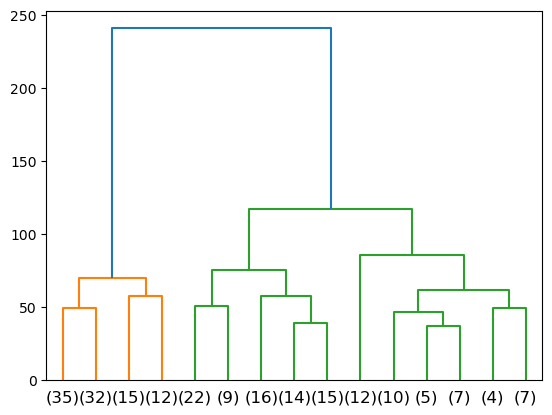

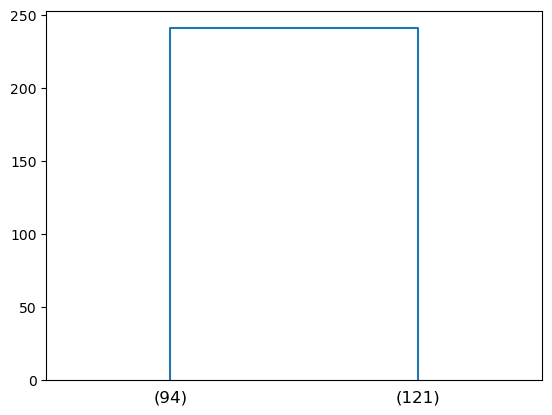

2    121
1     94
dtype: int64

CLUSTER 1
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
5,Ion transport,215,81,94,37,35.413953,45.68,0.063207,0.378534,1.000000,1.000000
1,Amino-acid transport,215,48,94,27,20.986047,56.25,0.363529,0.034671,0.294706,0.589412
15,Sugar transport,215,56,94,19,24.483721,33.93,-0.365823,0.970412,1.000000,1.000000
12,Protein transport,215,27,94,11,11.804651,40.74,-0.101852,0.703867,0.920442,1.000000
4,Peptide transport,215,19,94,10,8.306977,52.63,0.267605,0.280260,0.952885,1.000000
6,Iron transport,215,16,94,8,6.995349,50.00,0.193604,0.392779,0.953892,1.000000
0,Sodium transport,215,8,94,7,3.497674,87.50,1.000959,0.013600,0.231195,0.231195
2,Zinc transport,215,7,94,5,3.060465,71.43,0.708177,0.132877,0.752969,1.000000
9,Potassium transport,215,10,94,5,4.372093,50.00,0.193604,0.461912,0.785250,1.000000
3,Phosphate transport,215,4,94,3,1.748837,75.00,0.778566,0.222586,0.945993,1.000000


CLUSTER 2
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
9,Ion transport,215,81,121,44,45.586047,54.32,-0.051089,0.723286,1.000000,1.0
1,Sugar transport,215,56,121,37,31.516279,66.07,0.231428,0.058461,0.584615,1.0
18,Amino-acid transport,215,48,121,21,27.013953,43.75,-0.363315,0.984031,1.000000,1.0
5,Protein transport,215,27,121,16,15.195349,59.26,0.074442,0.452417,1.000000,1.0
14,Peptide transport,215,19,121,9,10.693023,47.37,-0.248673,0.855797,1.000000,1.0
11,Iron transport,215,16,121,8,9.004651,50.00,-0.170670,0.785344,1.000000,1.0
2,Translocation,215,8,121,7,4.502326,87.50,0.636685,0.068861,0.459076,1.0
3,Hydrogen ion transport,215,10,121,7,5.627907,70.00,0.314756,0.288868,1.000000,1.0
0,Electron transport,215,5,121,5,2.813953,100.00,0.829330,0.054417,1.000000,1.0
10,Potassium transport,215,10,121,5,5.627907,50.00,-0.170670,0.770120,1.000000,1.0


In [147]:
import matplotlib.pyplot as plt
n_clusters = 2
linkage = get_linkage(feature_pssm_keywords)
dendrogram = dendrogram_plot(linkage)
plt.show()
dendrogram = dendrogram_plot(linkage,max_leaves=n_clusters)
plt.show()
labels = get_cluster_labels(linkage=linkage, n_clusters=n_clusters, index=feature_pssm_keywords.index.tolist())
display(labels.value_counts())
records_not_go_dict = dict()
records_not_go_dict["Keywords substrates"] = keywords_ecoli_substrate.to_records(index=False).tolist()
reference_set = set(sequences_substrate_keywords.index.tolist())
cluster_enrichment_analysis(labels, reference_set, annotations_dict=records_not_go_dict,p_cutoff=1)

No separation along substrate classes at all.

#### Six clusters:

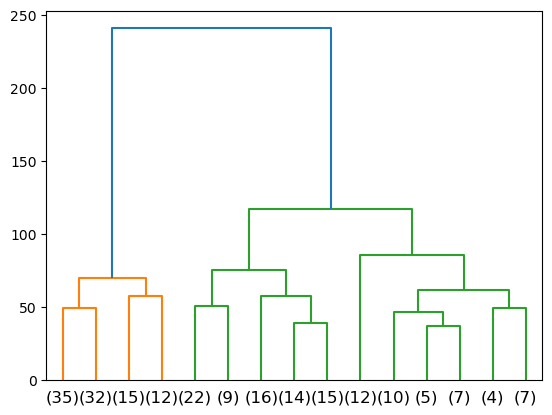

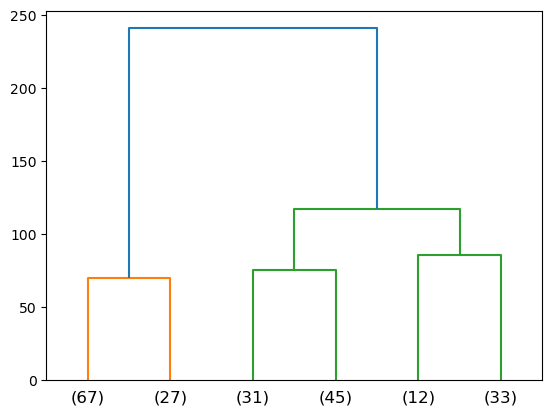

1    67
4    45
6    33
3    31
2    27
5    12
dtype: int64

CLUSTER 1
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
12,Ion transport,215,81,67,24,25.241860,29.63,-0.072784,0.700406,0.862038,1.000000
4,Amino-acid transport,215,48,67,18,14.958140,37.50,0.267066,0.183756,0.588018,1.000000
15,Sugar transport,215,56,67,13,17.451163,23.21,-0.424812,0.953875,0.953875,1.000000
3,Protein transport,215,27,67,11,8.413953,40.74,0.386648,0.176152,0.704606,1.000000
0,Peptide transport,215,19,67,10,5.920930,52.63,0.756104,0.034926,0.558808,0.558808
8,Iron transport,215,16,67,6,4.986047,37.50,0.267066,0.376297,0.668972,1.000000
2,Potassium transport,215,10,67,5,3.116279,50.00,0.682104,0.165663,0.883535,1.000000
5,Sodium transport,215,8,67,4,2.493023,50.00,0.682104,0.212004,0.565344,1.000000
1,Phosphate transport,215,4,67,3,1.246512,75.00,1.267066,0.090755,0.726036,1.000000
6,Nickel transport,215,3,67,2,0.934884,66.67,1.097141,0.229670,0.524960,1.000000


CLUSTER 2
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
3,Ion transport,215,81,27,13,10.172093,16.05,0.353895,0.161286,0.322572,1.000000
2,Amino-acid transport,215,48,27,9,6.027907,18.75,0.578268,0.113168,0.301781,0.905343
7,Sugar transport,215,56,27,6,7.032558,10.71,-0.229087,0.759061,0.759061,1.000000
0,Zinc transport,215,7,27,3,0.879070,42.86,1.770913,0.044017,0.352135,0.352135
1,Sodium transport,215,8,27,3,1.004651,37.50,1.578268,0.064515,0.258061,0.516122
5,Iron transport,215,16,27,2,2.009302,12.50,-0.006695,0.624592,0.832790,1.000000
4,Chloride,215,2,27,1,0.251163,50.00,1.993305,0.235905,0.377448,1.000000
6,Hydrogen ion transport,215,10,27,1,1.255814,10.00,-0.328623,0.746655,0.853320,1.000000


CLUSTER 3
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
5,Ion transport,215,81,31,12,11.679070,14.81,0.039109,0.523812,1.000000,1.000000
8,Sugar transport,215,56,31,8,8.074419,14.29,-0.013358,0.590665,0.853183,1.000000
12,Amino-acid transport,215,48,31,5,6.920930,10.42,-0.469038,0.872833,0.872833,1.000000
7,Protein transport,215,27,31,4,3.893023,14.81,0.039109,0.570372,0.926855,1.000000
1,Hydrogen ion transport,215,10,31,3,1.441860,30.00,1.057031,0.160652,1.000000,1.000000
0,Copper transport,215,3,31,2,0.432558,66.67,2.209034,0.055135,0.716755,0.716755
3,Translocation,215,8,31,2,1.153488,25.00,0.793997,0.324424,1.000000,1.000000
4,Potassium transport,215,10,31,2,1.441860,20.00,0.472068,0.436783,1.000000,1.000000
10,Iron transport,215,16,31,2,2.306977,12.50,-0.206003,0.704944,0.833115,1.000000
11,Peptide transport,215,19,31,2,2.739535,10.53,-0.453931,0.795375,0.861657,1.000000


CLUSTER 4
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Sugar transport,215,56,45,17,11.720930,30.36,0.536448,0.036453,0.473885,0.473885
1,Amino-acid transport,215,48,45,12,10.046512,25.00,0.256340,0.274624,1.000000,1.000000
12,Ion transport,215,81,45,11,16.953488,13.58,-0.624079,0.988735,0.988735,1.000000
7,Protein transport,215,27,45,5,5.651163,18.52,-0.176620,0.710650,1.000000,1.000000
2,Potassium transport,215,10,45,3,2.093023,30.00,0.519374,0.349548,1.000000,1.000000
8,Peptide transport,215,19,45,3,3.976744,15.79,-0.406625,0.804855,1.000000,1.000000
4,Translocation,215,8,45,2,1.674419,25.00,0.256340,0.526827,1.000000,1.000000
5,Hydrogen ion transport,215,10,45,2,2.093023,20.00,-0.065588,0.657686,1.000000,1.000000
3,Chloride,215,2,45,1,0.418605,50.00,1.256340,0.375571,1.000000,1.000000
6,Electron transport,215,5,45,1,1.046512,20.00,-0.065588,0.694776,1.000000,1.000000


CLUSTER 5
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
2,Sugar transport,215,56,12,6,3.125581,10.71,0.940838,0.059633,0.139145,0.417434
0,Electron transport,215,5,12,3,0.279070,60.00,3.426265,0.001262,0.008837,0.008837
6,Ion transport,215,81,12,3,4.520930,3.70,-0.591657,0.895530,0.895530,1.000000
1,Ammonia transport,215,1,12,1,0.055814,100.00,4.163230,0.055814,0.195349,0.390698
3,Cobalt transport,215,2,12,1,0.111628,50.00,3.163230,0.108759,0.190328,0.761313
4,Nickel transport,215,3,12,1,0.167442,33.33,2.578268,0.158970,0.222558,1.000000
5,Hydrogen ion transport,215,10,12,1,0.558140,10.00,0.841302,0.444053,0.518061,1.000000


CLUSTER 6
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Ion transport,215,81,33,18,12.432558,22.22,0.533874,0.025130,0.276433,0.276433
2,Protein transport,215,27,33,7,4.144186,25.93,0.756266,0.093839,0.344078,1.000000
9,Sugar transport,215,56,33,6,8.595349,10.71,-0.518594,0.912855,1.000000,1.000000
1,Iron transport,215,16,33,5,2.455814,31.25,1.025727,0.077690,0.427295,0.854589
6,Peptide transport,215,19,33,4,2.916279,21.05,0.455871,0.329017,0.517026,1.000000
10,Amino-acid transport,215,48,33,4,7.367442,8.33,-0.881164,0.967419,0.967419,1.000000
3,Translocation,215,8,33,3,1.227907,37.50,1.288761,0.107330,0.295157,1.000000
4,Polysaccharide transport,215,1,33,1,0.153488,100.00,2.703799,0.153488,0.337674,1.000000
5,Lipid transport,215,2,33,1,0.306977,50.00,1.703799,0.284025,0.520713,1.000000
7,Phosphate transport,215,4,33,1,0.613953,25.00,0.703799,0.489133,0.672558,1.000000


In [149]:
import matplotlib.pyplot as plt
n_clusters = 6
linkage = get_linkage(feature_pssm_keywords)
dendrogram = dendrogram_plot(linkage)
plt.show()
dendrogram = dendrogram_plot(linkage,max_leaves=n_clusters)
plt.show()
labels = get_cluster_labels(linkage=linkage, n_clusters=n_clusters, index=feature_pssm_keywords.index.tolist())
display(labels.value_counts())
records_not_go_dict = dict()
records_not_go_dict["Keywords substrates"] = keywords_ecoli_substrate.to_records(index=False).tolist()
reference_set = set(sequences_substrate_keywords.index.tolist())
cluster_enrichment_analysis(labels, reference_set, annotations_dict=records_not_go_dict,p_cutoff=1)

#### 50 Clusters

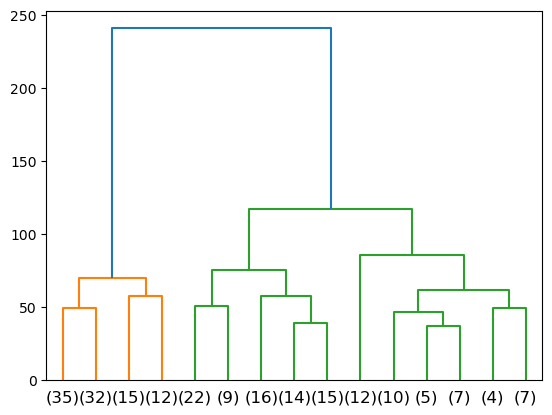

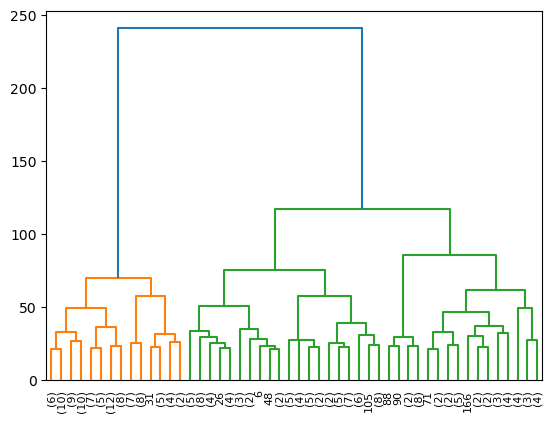

7     12
2     10
4     10
3      9
33     8
8      8
10     8
16     8
38     8
5      7
9      7
31     7
32     6
1      6
42     5
6      5
11     5
15     5
27     5
25     5
30     5
13     4
26     4
47     4
48     4
50     4
18     4
17     4
46     3
49     3
20     3
21     2
22     2
43     2
29     2
14     2
41     2
37     2
39     2
28     2
44     2
40     1
35     1
36     1
23     1
34     1
24     1
12     1
19     1
45     1
dtype: int64

CLUSTER 1
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,Ion transport,215,81,6,6,2.260465,7.41,1.408343,0.002538,0.003807,0.007615
0,Iron transport,215,16,6,5,0.446512,31.25,3.485158,0.000007,0.000021,0.000021
2,Nickel transport,215,3,6,1,0.083721,33.33,3.578268,0.081777,0.081777,0.245331


CLUSTER 2
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
3,Ion transport,215,81,10,6,3.767442,7.41,0.671377,0.124483,0.248966,0.995865
0,Peptide transport,215,19,10,3,0.883721,15.79,1.763300,0.047373,0.378986,0.378986
2,Protein transport,215,27,10,3,1.255814,11.11,1.256340,0.116124,0.309664,0.928992
1,Potassium transport,215,10,10,2,0.465116,20.00,2.104337,0.071852,0.287409,0.574819
4,Nickel transport,215,3,10,1,0.139535,33.33,2.841302,0.133740,0.213984,1.000000
5,Sodium transport,215,8,10,1,0.372093,12.50,1.426265,0.321271,0.428361,1.000000
6,Hydrogen ion transport,215,10,10,1,0.465116,10.00,1.104337,0.385416,0.440475,1.000000
7,Amino-acid transport,215,48,10,1,2.232558,2.08,-1.158698,0.924883,0.924883,1.000000


CLUSTER 3
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,Sugar transport,215,56,9,5,2.344186,8.93,1.092841,0.053624,0.187685,0.375370
5,Ion transport,215,81,9,3,3.390698,3.70,-0.176620,0.727008,0.848176,1.000000
0,Zinc transport,215,7,9,2,0.293023,28.57,2.770913,0.029412,0.205887,0.205887
2,Cobalt transport,215,2,9,1,0.083721,50.00,3.578268,0.082156,0.191697,0.575092
3,Phosphate transport,215,4,9,1,0.167442,25.00,2.578268,0.158257,0.276949,1.000000
4,Iron transport,215,16,9,1,0.669767,6.25,0.578268,0.508278,0.711590,1.000000
6,Amino-acid transport,215,48,9,1,2.009302,2.08,-1.006695,0.902063,0.902063,1.000000


CLUSTER 4
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
5,Amino-acid transport,215,48,10,3,2.232558,6.25,0.426265,0.393125,0.589688,1.0
8,Ion transport,215,81,10,3,3.767442,3.70,-0.328623,0.798447,0.798447,1.0
4,Protein transport,215,27,10,2,1.255814,7.41,0.671377,0.364515,0.656127,1.0
7,Sugar transport,215,56,10,2,2.604651,3.57,-0.381090,0.785422,0.883600,1.0
0,Copper transport,215,3,10,1,0.139535,33.33,2.841302,0.133740,1.000000,1.0
1,Phosphate transport,215,4,10,1,0.186047,25.00,2.426265,0.174601,0.785706,1.0
2,Translocation,215,8,10,1,0.372093,12.50,1.426265,0.321271,0.826124,1.0
3,Sodium transport,215,8,10,1,0.372093,12.50,1.426265,0.321271,0.826124,1.0
6,Peptide transport,215,19,10,1,0.883721,5.26,0.178337,0.611776,0.786569,1.0


CLUSTER 5
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
2,Sugar transport,215,56,7,3,1.823256,5.36,0.718446,0.263382,0.614557,1.000000
0,Sodium transport,215,8,7,2,0.260465,25.00,2.940838,0.023243,0.162703,0.162703
5,Ion transport,215,81,7,2,2.637209,2.47,-0.399012,0.813317,0.948870,1.000000
1,Phosphate transport,215,4,7,1,0.130233,25.00,2.940838,0.124841,0.436943,0.873886
3,Peptide transport,215,19,7,1,0.618605,5.26,0.692910,0.481770,0.843098,1.000000
4,Protein transport,215,27,7,1,0.879070,3.70,0.185950,0.614691,0.860568,1.000000
6,Amino-acid transport,215,48,7,1,1.562791,2.08,-0.644125,0.834246,0.834246,1.000000


CLUSTER 6
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Amino-acid transport,215,48,5,4,1.116279,8.33,1.841302,0.009364,0.018727,0.018727
1,Sugar transport,215,56,5,1,1.302326,1.79,-0.381090,0.782450,0.782450,1.000000


CLUSTER 7
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Amino-acid transport,215,48,12,6,2.679070,12.50,1.163230,0.028579,0.200054,0.200054
2,Peptide transport,215,19,12,2,1.060465,10.53,0.915303,0.286882,0.669391,1.000000
4,Protein transport,215,27,12,2,1.506977,7.41,0.408343,0.459761,0.643666,1.000000
5,Sugar transport,215,56,12,2,3.125581,3.57,-0.644125,0.867556,1.000000,1.000000
1,Sulfate transport,215,1,12,1,0.055814,100.00,4.163230,0.055814,0.195349,0.390698
3,Hydrogen ion transport,215,10,12,1,0.558140,10.00,0.841302,0.444053,0.777092,1.000000
6,Ion transport,215,81,12,1,4.520930,1.23,-2.176620,0.997172,0.997172,1.000000


CLUSTER 8
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Potassium transport,215,10,8,3,0.372093,30.00,3.011227,0.003628,0.018138,0.018138
1,Peptide transport,215,19,8,3,0.706977,15.79,2.085228,0.024831,0.062079,0.124157
2,Protein transport,215,27,8,3,1.004651,11.11,1.578268,0.064515,0.107525,0.322576
4,Ion transport,215,81,8,3,3.013953,3.70,-0.006695,0.637586,0.637586,1.000000
3,Amino-acid transport,215,48,8,2,1.786047,4.17,0.163230,0.566488,0.708111,1.000000


CLUSTER 9
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Amino-acid transport,215,48,7,4,1.562791,8.33,1.355875,0.045630,0.182521,0.182521
2,Ion transport,215,81,7,2,2.637209,2.47,-0.399012,0.813317,1.000000,1.000000
1,Sodium transport,215,8,7,1,0.260465,12.50,1.940838,0.236077,0.472155,0.944310
3,Sugar transport,215,56,7,1,1.823256,1.79,-0.866517,0.883210,0.883210,1.000000


CLUSTER 10
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
2,Ion transport,215,81,8,5,3.013953,6.17,0.730271,0.135366,0.270731,0.812194
4,Amino-acid transport,215,48,8,3,1.786047,6.25,0.748193,0.253828,0.304594,1.000000
0,Sodium transport,215,8,8,2,0.297674,25.00,2.748193,0.030406,0.182436,0.182436
1,Chloride,215,2,8,1,0.074419,50.00,3.748193,0.073201,0.219604,0.439209
3,Zinc transport,215,7,8,1,0.260465,14.29,1.940838,0.236077,0.354116,1.000000
5,Sugar transport,215,56,8,1,2.083721,1.79,-1.059162,0.914653,0.914653,1.000000


CLUSTER 11
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,Ion transport,215,81,5,3,1.883721,3.70,0.671377,0.276158,0.552316,1.000000
2,Amino-acid transport,215,48,5,2,1.116279,4.17,0.841302,0.310384,0.413846,1.000000
0,Zinc transport,215,7,5,1,0.162791,14.29,2.618910,0.153875,0.615498,0.615498
3,Iron transport,215,16,5,1,0.372093,6.25,1.426265,0.323255,0.323255,1.000000


CLUSTER 12
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Hydrogen ion transport,215,10,1,1,0.046512,10.00,4.426265,0.046512,0.093023,0.093023
1,Ion transport,215,81,1,1,0.376744,1.23,1.408343,0.376744,0.376744,0.753488


CLUSTER 13
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Sugar transport,215,56,4,3,1.041860,5.36,1.525800,0.055156,0.165469,0.165469
1,Zinc transport,215,7,4,1,0.130233,14.29,2.940838,0.124841,0.187261,0.374522
2,Ion transport,215,81,4,1,1.506977,1.23,-0.591657,0.851668,0.851668,1.000000


CLUSTER 14
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Iron transport,215,16,2,1,0.148837,6.25,2.748193,0.143621,0.430863,0.430863
1,Sugar transport,215,56,2,1,0.520930,1.79,0.940838,0.453988,0.680982,1.000000
2,Ion transport,215,81,2,1,0.753488,1.23,0.408343,0.612649,0.612649,1.000000


CLUSTER 15
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
2,Ion transport,215,81,5,3,1.883721,3.70,0.671377,0.276158,0.368210,1.000000
0,Iron transport,215,16,5,2,0.372093,12.50,2.426265,0.045616,0.182464,0.182464
3,Amino-acid transport,215,48,5,2,1.116279,4.17,0.841302,0.310384,0.310384,1.000000
1,Zinc transport,215,7,5,1,0.162791,14.29,2.618910,0.153875,0.307749,0.615498


CLUSTER 16
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,Amino-acid transport,215,48,8,3,1.786047,6.25,0.748193,0.253828,0.761484,1.000000
0,Peptide transport,215,19,8,2,0.706977,10.53,1.500265,0.150402,0.902415,0.902415
2,Protein transport,215,27,8,2,1.004651,7.41,0.993305,0.264579,0.529159,1.000000
4,Sugar transport,215,56,8,2,2.083721,3.57,-0.059162,0.663105,0.795726,1.000000
3,Potassium transport,215,10,8,1,0.372093,10.00,1.426265,0.321271,0.481906,1.000000
5,Ion transport,215,81,8,1,3.013953,1.23,-1.591657,0.979007,0.979007,1.000000


CLUSTER 17
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,Ion transport,215,81,4,2,1.506977,2.47,0.408343,0.484802,0.727203,1.000000
0,Lipid transport,215,2,4,1,0.037209,50.00,4.748193,0.036948,0.110845,0.110845
2,Sugar transport,215,56,4,1,1.041860,1.79,-0.059162,0.703851,0.703851,1.000000


CLUSTER 18
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
2,Ion transport,215,81,4,3,1.506977,3.70,0.993305,0.151287,0.201717,0.605150
0,Copper transport,215,3,4,2,0.055814,66.67,5.163230,0.000778,0.003110,0.003110
1,Electron transport,215,5,4,1,0.093023,20.00,3.426265,0.090440,0.180879,0.361758
3,Hydrogen ion transport,215,10,4,1,0.186047,10.00,2.426265,0.174601,0.174601,0.698406


CLUSTER 19
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Potassium transport,215,10,1,1,0.046512,10.00,4.426265,0.046512,0.093023,0.093023
1,Ion transport,215,81,1,1,0.376744,1.23,1.408343,0.376744,0.376744,0.753488


CLUSTER 20
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,Sugar transport,215,56,3,2,0.781395,3.57,1.355875,0.166884,0.250325,0.500651
0,Hydrogen ion transport,215,10,3,1,0.139535,10.00,2.841302,0.133740,0.401220,0.401220
2,Ion transport,215,81,3,1,1.130233,1.23,-0.176620,0.759952,0.759952,1.000000


CLUSTER 21
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Translocation,215,8,2,2,0.074419,25.00,4.748193,0.001217,0.002434,0.002434
1,Protein transport,215,27,2,2,0.251163,7.41,2.993305,0.015258,0.015258,0.030515


CLUSTER 22
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Sugar transport,215,56,2,2,0.52093,3.57,1.940838,0.066942,0.066942,0.066942


CLUSTER 23
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Sugar transport,215,56,1,1,0.260465,1.79,1.940838,0.260465,0.260465,0.260465


CLUSTER 24
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Hydrogen ion transport,215,10,1,1,0.046512,10.00,4.426265,0.046512,0.093023,0.093023
1,Ion transport,215,81,1,1,0.376744,1.23,1.408343,0.376744,0.376744,0.753488


CLUSTER 25
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Amino-acid transport,215,48,5,4,1.116279,8.33,1.841302,0.009364,0.018727,0.018727
1,Sugar transport,215,56,5,1,1.302326,1.79,-0.381090,0.782450,0.782450,1.000000


CLUSTER 26
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Sugar transport,215,56,4,3,1.041860,5.36,1.52580,0.055156,0.110313,0.110313
1,Amino-acid transport,215,48,4,1,0.893023,2.08,0.16323,0.638936,0.638936,1.000000


CLUSTER 27
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Sugar transport,215,56,5,3,1.302326,5.36,1.203872,0.112344,0.337031,0.337031
2,Ion transport,215,81,5,2,1.883721,2.47,0.086415,0.623898,0.623898,1.000000
1,Potassium transport,215,10,5,1,0.232558,10.00,2.104337,0.213720,0.320580,0.641159


CLUSTER 28
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Peptide transport,215,19,2,1,0.176744,5.26,2.500265,0.169311,0.507933,0.507933
1,Protein transport,215,27,2,1,0.251163,3.70,1.993305,0.235905,0.353858,0.707716
2,Ion transport,215,81,2,1,0.753488,1.23,0.408343,0.612649,0.612649,1.000000


CLUSTER 29
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Electron transport,215,5,2,1,0.046512,20.00,4.426265,0.046077,0.138231,0.138231
1,Zinc transport,215,7,2,1,0.065116,14.29,3.940838,0.064203,0.096305,0.192610
2,Ion transport,215,81,2,1,0.753488,1.23,0.408343,0.612649,0.612649,1.000000


CLUSTER 30
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,Sugar transport,215,56,5,3,1.302326,5.36,1.203872,0.112344,0.168516,0.337031
0,Translocation,215,8,5,2,0.186047,25.00,3.426265,0.011498,0.034493,0.034493
2,Protein transport,215,27,5,2,0.627907,7.41,1.671377,0.119712,0.119712,0.359137


CLUSTER 31
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,Sugar transport,215,56,7,3,1.823256,5.36,0.718446,0.263382,0.658454,1.000000
3,Ion transport,215,81,7,3,2.637209,3.70,0.185950,0.529967,0.662459,1.000000
0,Potassium transport,215,10,7,2,0.325581,20.00,2.618910,0.036184,0.180921,0.180921
2,Iron transport,215,16,7,1,0.520930,6.25,0.940838,0.422678,0.704463,1.000000
4,Amino-acid transport,215,48,7,1,1.562791,2.08,-0.644125,0.834246,0.834246,1.000000


CLUSTER 32
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Amino-acid transport,215,48,6,4,1.339535,8.33,1.578268,0.023426,0.140558,0.140558
1,Sodium transport,215,8,6,1,0.223256,12.50,2.163230,0.205673,0.617018,1.000000
2,Peptide transport,215,19,6,1,0.530233,5.26,0.915303,0.429947,0.859895,1.000000
3,Protein transport,215,27,6,1,0.753488,3.70,0.408343,0.557530,0.836295,1.000000
4,Sugar transport,215,56,6,1,1.562791,1.79,-0.644125,0.840463,1.000000,1.000000
5,Ion transport,215,81,6,1,2.260465,1.23,-1.176620,0.943861,0.943861,1.000000


CLUSTER 33
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
2,Sugar transport,215,56,8,3,2.083721,5.36,0.525800,0.346615,0.808767,1.00000
4,Amino-acid transport,215,48,8,2,1.786047,4.17,0.163230,0.566488,0.793084,1.00000
6,Ion transport,215,81,8,2,3.013953,2.47,-0.591657,0.871895,0.871895,1.00000
0,Chloride,215,2,8,1,0.074419,50.00,3.748193,0.073201,0.512410,0.51241
1,Hydrogen ion transport,215,10,8,1,0.372093,10.00,1.426265,0.321271,1.000000,1.00000
3,Peptide transport,215,19,8,1,0.706977,5.26,0.500265,0.529109,0.925940,1.00000
5,Protein transport,215,27,8,1,1.004651,3.70,-0.006695,0.664707,0.775492,1.00000


CLUSTER 34
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Hydrogen ion transport,215,10,1,1,0.046512,10.00,4.426265,0.046512,0.093023,0.093023
1,Ion transport,215,81,1,1,0.376744,1.23,1.408343,0.376744,0.376744,0.753488


CLUSTER 35
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Electron transport,215,5,1,1,0.023256,20.0,5.426265,0.023256,0.023256,0.023256


CLUSTER 36
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Electron transport,215,5,1,1,0.023256,20.0,5.426265,0.023256,0.023256,0.023256


CLUSTER 37
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Cobalt transport,215,2,2,1,0.018605,50.00,5.748193,0.018561,0.074245,0.074245
1,Nickel transport,215,3,2,1,0.027907,33.33,5.163230,0.027777,0.055553,0.111106
2,Sugar transport,215,56,2,1,0.520930,1.79,0.940838,0.453988,0.605318,1.000000
3,Ion transport,215,81,2,1,0.753488,1.23,0.408343,0.612649,0.612649,1.000000


CLUSTER 38
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Sugar transport,215,56,8,5,2.083721,8.93,1.262766,0.029793,0.148964,0.148964
4,Ion transport,215,81,8,2,3.013953,2.47,-0.591657,0.871895,0.871895,1.000000
1,Ammonia transport,215,1,8,1,0.037209,100.00,4.748193,0.037209,0.093023,0.186047
2,Electron transport,215,5,8,1,0.186047,20.00,2.426265,0.174214,0.290357,0.871070
3,Hydrogen ion transport,215,10,8,1,0.372093,10.00,1.426265,0.321271,0.401588,1.000000


CLUSTER 39
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Translocation,215,8,2,1,0.074419,12.50,3.748193,0.073201,0.219604,0.219604
1,Protein transport,215,27,2,1,0.251163,3.70,1.993305,0.235905,0.353858,0.707716
2,Ion transport,215,81,2,1,0.753488,1.23,0.408343,0.612649,0.612649,1.000000


CLUSTER 40
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Translocation,215,8,1,1,0.037209,12.5,4.748193,0.037209,0.074419,0.074419
1,Protein transport,215,27,1,1,0.125581,3.7,2.993305,0.125581,0.125581,0.251163


CLUSTER 41
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Translocation,215,8,2,1,0.074419,12.50,3.748193,0.073201,0.292806,0.292806
1,Hydrogen ion transport,215,10,2,1,0.093023,10.00,3.426265,0.091067,0.182134,0.364269
2,Protein transport,215,27,2,1,0.251163,3.70,1.993305,0.235905,0.314540,0.943621
3,Ion transport,215,81,2,1,0.753488,1.23,0.408343,0.612649,0.612649,1.000000


CLUSTER 42
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,Amino-acid transport,215,48,5,2,1.116279,4.17,0.841302,0.310384,0.465576,0.931152
2,Sugar transport,215,56,5,2,1.302326,3.57,0.618910,0.389455,0.389455,1.000000
0,Phosphate transport,215,4,5,1,0.093023,25.00,3.426265,0.090440,0.271319,0.271319


CLUSTER 43
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Iron transport,215,16,2,2,0.148837,12.50,3.748193,0.005216,0.010433,0.010433
1,Ion transport,215,81,2,2,0.753488,2.47,1.408343,0.140839,0.140839,0.281678


CLUSTER 44
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Peptide transport,215,19,2,1,0.176744,5.26,2.500265,0.169311,0.507933,0.507933
1,Protein transport,215,27,2,1,0.251163,3.70,1.993305,0.235905,0.353858,0.707716
2,Amino-acid transport,215,48,2,1,0.446512,2.08,1.163230,0.397479,0.397479,1.000000


CLUSTER 45
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Amino-acid transport,215,48,1,1,0.223256,2.08,2.16323,0.223256,0.223256,0.223256


CLUSTER 46
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Peptide transport,215,19,3,3,0.265116,15.79,3.500265,0.000593,0.001187,0.001187
1,Protein transport,215,27,3,3,0.376744,11.11,2.993305,0.001791,0.001791,0.003582


CLUSTER 47
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Iron transport,215,16,4,3,0.297674,18.75,3.333155,0.001308,0.003925,0.003925
2,Ion transport,215,81,4,3,1.506977,3.70,0.993305,0.151287,0.151287,0.453862
1,Lipid transport,215,2,4,1,0.037209,50.00,4.748193,0.036948,0.055423,0.110845


CLUSTER 48
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Ion transport,215,81,4,4,1.506977,4.94,1.408343,0.019219,0.038438,0.038438
1,Sugar transport,215,56,4,2,1.041860,3.57,0.940838,0.278611,0.278611,0.557221


CLUSTER 49
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Ion transport,215,81,3,3,1.130233,3.7,1.408343,0.052236,0.052236,0.052236


CLUSTER 50
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,Ion transport,215,81,4,4,1.506977,4.94,1.408343,0.019219,0.028828,0.057657
2,Sugar transport,215,56,4,2,1.041860,3.57,0.940838,0.278611,0.278611,0.835832
0,Polysaccharide transport,215,1,4,1,0.018605,100.00,5.748193,0.018605,0.055814,0.055814


In [152]:
import matplotlib.pyplot as plt
n_clusters = 50
linkage = get_linkage(feature_pssm_keywords)
dendrogram = dendrogram_plot(linkage)
plt.show()
dendrogram = dendrogram_plot(linkage,max_leaves=n_clusters)
plt.show()
labels = get_cluster_labels(linkage=linkage, n_clusters=n_clusters, index=feature_pssm_keywords.index.tolist())
display(labels.value_counts())
records_not_go_dict = dict()
records_not_go_dict["Keywords substrates"] = keywords_ecoli_substrate.to_records(index=False).tolist()
reference_set = set(sequences_substrate_keywords.index.tolist())
cluster_enrichment_analysis(labels, reference_set, annotations_dict=records_not_go_dict,p_cutoff=1)

### Trying ProtNLM instead

In [264]:
feature_protnlm_keywords = feature_protnlm_all.loc[sequences_substrate_keywords.index]
feature_protnlm_keywords

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
Uniprot,,,,,,,,,,,,,,,,,,,,,
P02916,0.010300,0.080383,0.056885,0.034698,0.031525,0.022995,-0.030945,-0.037567,0.042816,-0.010796,...,-0.024963,-0.022446,-0.000171,-0.046082,0.042053,-0.053955,-0.039642,-0.031525,-0.041718,0.017944
P03959,0.025909,0.126099,0.006119,0.035278,-0.004730,0.042938,-0.029327,-0.038696,0.002594,-0.082703,...,-0.004604,-0.014725,-0.009979,-0.030670,0.023117,-0.051910,-0.019653,-0.017334,-0.018646,0.016357
P05825,0.053955,0.033478,0.056885,0.033112,0.042786,-0.027786,-0.003395,-0.013596,0.064453,0.022583,...,-0.014297,-0.019241,-0.038879,-0.015221,0.074341,-0.015099,-0.027710,-0.004265,-0.045197,-0.001211
P0AAD6,0.018661,0.125000,0.028625,0.026184,0.010612,0.024185,-0.019943,-0.036438,0.029083,-0.038940,...,-0.034515,0.003023,0.027237,-0.035645,0.059235,-0.050781,-0.029648,-0.003340,-0.012543,0.006695
P0AAD8,0.008408,0.095642,0.017944,0.023651,0.000017,0.017029,-0.007919,-0.038269,0.038330,-0.037720,...,-0.039276,-0.008675,0.033600,-0.036194,0.047882,-0.047424,-0.025833,-0.008163,0.005672,0.011299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P0A843,-0.004459,0.017624,0.008377,0.001963,-0.023682,0.003561,0.051147,-0.023010,0.000399,0.009888,...,-0.075500,-0.008049,-0.060822,-0.071838,-0.059418,-0.048035,-0.044891,-0.002670,0.017578,0.062439
P45539,-0.025604,0.040894,-0.008926,0.015884,-0.047333,0.015182,-0.015015,-0.017899,-0.021454,-0.056213,...,-0.012024,-0.051117,0.008102,-0.100830,0.038452,0.015594,-0.020660,-0.055634,0.046509,-0.002180
P75826,0.033661,0.057709,0.028580,0.044678,0.015495,0.015656,0.011452,-0.051300,0.054230,0.007256,...,-0.033234,0.044037,0.013901,-0.058044,-0.000068,-0.022720,-0.043152,0.003742,-0.020599,0.015640


#### ProtNLM 2 clusters

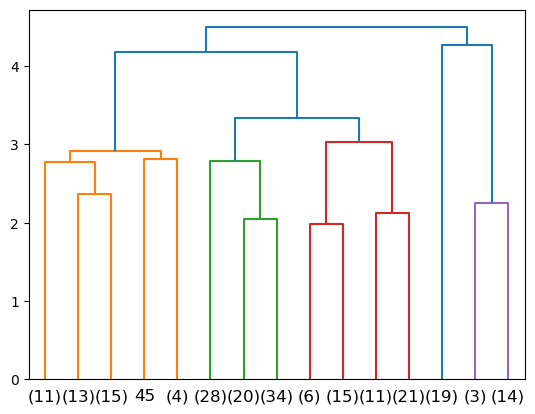

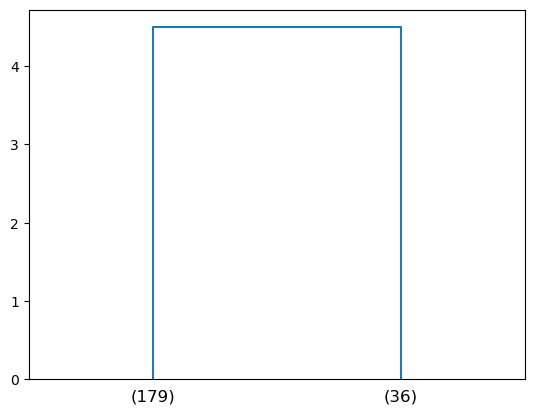

1    179
2     36
dtype: int64

CLUSTER 1
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,Cell inner membrane,215,181,179,164,150.693023,90.61,0.122083,5.591880e-09,2.102547e-07,5.256368e-07
2,Cell membrane,215,181,179,164,150.693023,90.61,0.122083,5.591880e-09,2.102547e-07,5.256368e-07
3,Transmembrane,215,175,179,158,145.697674,90.29,0.116947,2.252471e-07,5.293308e-06,2.117323e-05
0,Transmembrane helix,215,157,179,157,130.711628,100.00,0.264377,5.031195e-26,4.729323e-24,4.729323e-24
4,Symport,215,31,179,31,25.809302,100.00,0.264377,2.097203e-03,3.942743e-02,1.971371e-01


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2.A,215,83,179,83,69.102326,100.0,0.264377,2.712901e-09,1.899030e-08,1.899030e-08
1,4.A,215,23,179,23,19.148837,100.0,0.264377,1.143163e-02,4.001071e-02,8.002142e-02


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2,215,83,179,83,69.102326,100.0,0.264377,2.712901e-09,1.356450e-08,1.356450e-08
1,4,215,23,179,23,19.148837,100.0,0.264377,1.143163e-02,2.857908e-02,5.715815e-02


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


CLUSTER 2
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
11,Ion transport,215,81,36,20,13.562791,24.69,0.560346,1.346474e-02,4.712658e-02,5.655189e-01
2,ATP-binding,215,28,36,19,4.688372,67.86,2.018840,3.592812e-11,5.029937e-10,1.508981e-09
3,Nucleotide-binding,215,30,36,19,5.023256,63.33,1.919305,2.373020e-10,2.491671e-09,9.966684e-09
0,Cell outer membrane,215,18,36,17,3.013953,94.44,2.495806,2.138096e-14,5.986668e-13,8.980003e-13
1,Transmembrane beta strand,215,18,36,17,3.013953,94.44,2.495806,2.138096e-14,5.986668e-13,8.980003e-13
5,Signal,215,29,36,17,4.855814,58.62,1.807750,2.103379e-08,1.472365e-07,8.834191e-07
6,Translocase,215,23,36,14,3.851163,60.87,1.862061,3.444156e-07,2.066494e-06,1.446546e-05
9,Direct protein sequencing,215,44,36,14,7.367442,31.82,0.926191,4.135863e-03,1.737062e-02,1.737062e-01
4,Porin,215,12,36,11,2.009302,91.67,2.452737,7.302113e-09,6.133775e-08,3.066887e-07
10,Iron transport,215,16,36,7,2.679070,43.75,1.385623,7.686359e-03,2.934791e-02,3.228271e-01


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1.B,215,18,36,17,3.013953,94.44,2.495806,2.138096e-14,4.276192e-14,4.276192e-14
1,3.A,215,64,36,17,10.716279,26.56,0.665731,1.205218e-02,1.205218e-02,2.410437e-02


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1,215,26,36,17,4.353488,65.38,1.965291,1.707540e-09,3.415081e-09,3.415081e-09
1,3,215,68,36,17,11.386047,25.00,0.578268,2.422165e-02,2.422165e-02,4.844331e-02


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,"ABC transporter-like, ATP-binding domain",215,22,36,19,3.683721,86.36,2.366764,1.360968e-14,7.893612e-13,7.893612e-13
3,P-loop containing nucleoside triphosphate hydr...,215,25,36,19,4.186047,76.00,2.182339,1.203118e-12,1.744521e-11,6.978084e-11
1,AAA+ ATPase domain,215,23,36,19,3.851163,82.61,2.302633,7.171710e-14,2.079796e-12,4.159592e-12
2,"ABC transporter-like, conserved site",215,20,36,17,3.348837,85.00,2.343803,1.118304e-12,2.162054e-11,6.486162e-11
6,"TonB-dependent receptor-like, beta-barrel",215,5,36,5,0.837209,100.00,2.578268,1.031961e-04,8.550533e-04,5.985373e-03
7,"TonB box, conserved site",215,5,36,5,0.837209,100.00,2.578268,1.031961e-04,8.550533e-04,5.985373e-03
8,"TonB-dependent receptor-like, beta-barrel doma...",215,5,36,5,0.837209,100.00,2.578268,1.031961e-04,8.550533e-04,5.985373e-03
5,"TonB-dependent receptor, plug domain superfamily",215,5,36,5,0.837209,100.00,2.578268,1.031961e-04,8.550533e-04,5.985373e-03
4,"TonB-dependent receptor, plug domain",215,5,36,5,0.837209,100.00,2.578268,1.031961e-04,8.550533e-04,5.985373e-03
9,"TonB-dependent receptor, conserved site",215,4,36,4,0.669767,100.00,2.578268,6.804492e-04,3.587823e-03,3.946605e-02


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


In [267]:
import matplotlib.pyplot as plt
n_clusters = 2
linkage = get_linkage(feature_protnlm_keywords,standardize=False)
dendrogram = dendrogram_plot(linkage)
plt.show()
dendrogram = dendrogram_plot(linkage,max_leaves=n_clusters)
plt.show()
labels = get_cluster_labels(linkage=linkage, n_clusters=n_clusters, index=feature_protnlm_keywords.index.tolist())
display(labels.value_counts())
records_not_go_dict = {k:v for k,v in records_all_dict.items() if "GO" not in k}
records_not_go_dict["Keywords substrates"] = keywords_ecoli_substrate.to_records(index=False).tolist()
reference_set = set(sequences_substrate_keywords.index.tolist())
cluster_enrichment_analysis(labels, reference_set, annotations_dict=records_not_go_dict,p_cutoff=0.05)

#### ProtNLM 4 clusters

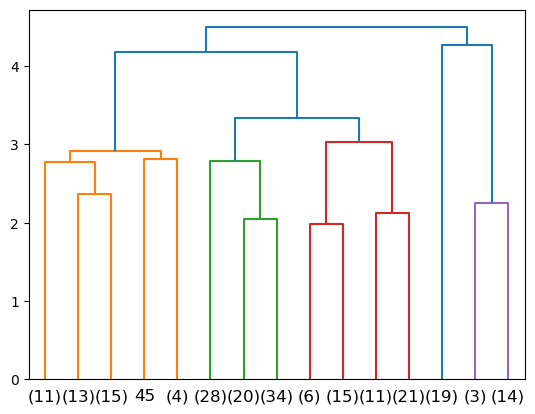

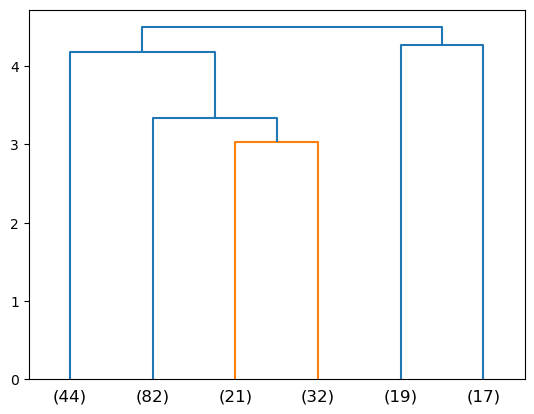

2    82
1    44
4    32
3    21
5    19
6    17
dtype: int64

CLUSTER 1
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Cytoplasm,215,10,44,9,2.046512,90.00,2.136758,0.000003,0.000132,0.000132
5,Phosphoprotein,215,19,44,9,3.888372,47.37,1.210759,0.005354,0.041187,0.267714
6,Transferase,215,19,44,9,3.888372,47.37,1.210759,0.005354,0.041187,0.267714
2,Hydrogen ion transport,215,10,44,8,2.046512,80.00,1.966833,0.000057,0.000957,0.002870
1,ATP synthesis,215,7,44,7,1.432558,100.00,2.288761,0.000010,0.000251,0.000502
3,Translocation,215,8,44,7,1.637209,87.50,2.096116,0.000068,0.000848,0.003390
4,CF(1),215,4,44,4,0.818605,100.00,2.288761,0.001568,0.015681,0.078407


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Hydrogen ion transport,215,10,44,8,2.046512,80.0,1.966833,0.000057,0.000689,0.000689
1,Translocation,215,8,44,7,1.637209,87.5,2.096116,0.000068,0.000407,0.000814


CLUSTER 2
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,Transmembrane helix,215,157,82,82,59.879070,52.23,0.453572,1.515750e-15,4.244100e-14,8.488200e-14
2,Transmembrane,215,175,82,82,66.744186,46.86,0.296982,3.116372e-10,5.817227e-09,1.745168e-08
3,Cell inner membrane,215,181,82,82,69.032558,45.30,0.248347,1.249118e-08,1.554458e-07,6.995063e-07
4,Cell membrane,215,181,82,82,69.032558,45.30,0.248347,1.249118e-08,1.554458e-07,6.995063e-07
6,Membrane,215,199,82,82,75.897674,41.21,0.111568,3.184434e-04,2.547547e-03,1.783283e-02
0,Symport,215,31,82,31,11.823256,100.00,1.390641,1.472106e-15,8.243794e-14,8.243794e-14
9,Sugar transport,215,56,82,31,21.358140,55.36,0.537482,1.870410e-03,1.047430e-02,1.047430e-01
10,Phosphotransferase system,215,24,82,15,9.153488,62.50,0.712569,9.344745e-03,4.757325e-02,5.233057e-01
8,Antiport,215,12,82,10,4.576744,83.33,1.127606,1.390931e-03,8.654680e-03,7.789212e-02
5,Sodium,215,9,82,9,3.432558,100.00,1.390641,1.283685e-04,1.198106e-03,7.188636e-03


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2.A,215,83,82,61,31.655814,73.49,0.946339,1.400965e-17,7.004827e-17,7.004827e-17
1,4.A,215,23,82,14,8.772093,60.87,0.674434,1.698887e-02,4.247218e-02,8.494437e-02


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,2,215,83,82,61,31.655814,73.49,0.946339,1.400965e-17,5.603862e-17,5.603862e-17
1,4,215,23,82,14,8.772093,60.87,0.674434,1.698887e-02,3.397775e-02,6.795550e-02


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,MFS transporter superfamily,215,15,82,15,5.720930,100.00,1.390641,2.215815e-07,0.000028,0.000028
1,Major facilitator superfamily domain,215,13,82,13,4.958140,100.00,1.390641,1.917445e-06,0.000120,0.000240
2,"Phosphotransferase system, EIIC",215,12,82,11,4.576744,91.67,1.265110,1.305564e-04,0.005440,0.016320
3,"Phosphotransferase system, EIIC component, type 1",215,7,82,7,2.669767,100.00,1.390641,9.958619e-04,0.031121,0.124483
4,Major facilitator superfamily,215,6,82,6,2.288372,100.00,1.390641,2.738620e-03,0.048904,0.342328
5,Glucose permease domain IIB,215,6,82,6,2.288372,100.00,1.390641,2.738620e-03,0.048904,0.342328
6,"Phosphotransferase system EIIB, cysteine phosp...",215,6,82,6,2.288372,100.00,1.390641,2.738620e-03,0.048904,0.342328
7,"Phosphotransferase system, IIB component, type 1",215,6,82,6,2.288372,100.00,1.390641,2.738620e-03,0.048904,0.342328
8,Amino acid permease/ SLC12A domain,215,6,82,6,2.288372,100.00,1.390641,2.738620e-03,0.048904,0.342328


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,Sugar transport,215,56,82,31,21.358140,55.36,0.537482,0.001870,0.012158,0.024315
0,Sodium transport,215,8,82,8,3.051163,100.00,1.390641,0.000359,0.004668,0.004668


CLUSTER 3
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Transmembrane helix,215,157,21,21,15.334884,13.38,0.453572,0.000918,0.018369,0.018369


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3.A,215,64,21,19,6.251163,29.69,1.603803,1.489553e-09,1.489553e-09,1.489553e-09


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3,215,68,21,19,6.64186,27.94,1.51634,5.444385e-09,5.444385e-09,5.444385e-09


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,"ABC transporter type 1, transmembrane domain M...",215,13,21,10,1.269767,76.92,2.977364,1.845054e-09,1.845054e-08,2.767581e-08
1,MetI-like superfamily,215,13,21,10,1.269767,76.92,2.977364,1.845054e-09,1.845054e-08,2.767581e-08
2,"ABC transporter, BtuC-like",215,6,21,6,0.586047,100.00,3.355875,4.243995e-07,2.121997e-06,6.365992e-06
3,"ABC transporter, permease",215,5,21,5,0.488372,100.00,3.355875,5.570243e-06,1.856748e-05,8.355365e-05
4,"ABC transporter, permease protein, BtuC-like",215,5,21,5,0.488372,100.00,3.355875,5.570243e-06,1.856748e-05,8.355365e-05
5,"ABC transporter type 1, GsiC-like, N-terminal ...",215,3,21,3,0.293023,100.00,3.355875,8.142749e-04,2.035687e-03,1.221412e-02
6,"Amino acid ABC transporter, permease protein, ...",215,2,21,2,0.195349,100.00,3.355875,9.128450e-03,1.825690e-02,1.369268e-01
7,"Oligopeptide transport permease C-like, N-term...",215,2,21,2,0.195349,100.00,3.355875,9.128450e-03,1.825690e-02,1.369268e-01


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


CLUSTER 4
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
2,3D-structure,215,78,32,20,11.609302,25.64,0.784719,0.001010,0.020531,0.061593
1,Signal,215,29,32,11,4.316279,37.93,1.349643,0.000805,0.024545,0.049091
0,Periplasm,215,6,32,6,0.893023,100.00,2.748193,0.000007,0.000432,0.000432
3,Copper transport,215,3,32,3,0.446512,100.00,2.748193,0.003037,0.046310,0.185238


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,9.A,215,2,32,2,0.297674,100.0,2.748193,0.021561,0.043121,0.129363


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,9,215,2,32,2,0.297674,100.0,2.748193,0.021561,0.043121,0.086242


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,"ABC transporter type 1, transmembrane domain s...",215,4,32,4,0.595349,100.0,2.748193,0.000415,0.010800,0.037801
1,"P-type ATPase, transmembrane domain superfamily",215,4,32,4,0.595349,100.0,2.748193,0.000415,0.010800,0.037801
2,"Peptide/nickel binding protein, MppA-type",215,4,32,4,0.595349,100.0,2.748193,0.000415,0.010800,0.037801
3,Solute-binding protein family 5,215,4,32,4,0.595349,100.0,2.748193,0.000415,0.010800,0.037801
4,"Solute-binding protein family 5, conserved site",215,4,32,4,0.595349,100.0,2.748193,0.000415,0.010800,0.037801
5,Solute-binding protein family 5 domain,215,4,32,4,0.595349,100.0,2.748193,0.000415,0.010800,0.037801
6,"ABC transporter type 1, transmembrane domain",215,3,32,3,0.446512,100.0,2.748193,0.003037,0.026318,0.276339
7,"P-type ATPase, cytoplasmic domain N",215,3,32,3,0.446512,100.0,2.748193,0.003037,0.026318,0.276339
8,"P-type ATPase, phosphorylation site",215,3,32,3,0.446512,100.0,2.748193,0.003037,0.026318,0.276339
9,"P-type ATPase, A domain superfamily",215,3,32,3,0.446512,100.0,2.748193,0.003037,0.026318,0.276339


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Copper transport,215,3,32,3,0.446512,100.0,2.748193,0.003037,0.039477,0.039477


CLUSTER 5
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,ATP-binding,215,28,19,19,2.474419,67.86,2.940838,9.200664e-21,2.300166e-19,2.300166e-19
1,Nucleotide-binding,215,30,19,19,2.651163,63.33,2.841302,7.276889e-20,9.096111e-19,1.819222e-18
2,Translocase,215,23,19,14,2.032558,60.87,2.784058,2.282096e-12,1.901746e-11,5.705239e-11
3,Repeat,215,10,19,4,0.883721,40.00,2.178337,6.609229e-03,4.130768e-02,1.652307e-01


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3.A,215,64,19,17,5.655814,26.56,1.587728,2.154527e-08,2.154527e-08,2.154527e-08


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,3,215,68,19,17,6.009302,25.0,1.500265,6.679566e-08,6.679566e-08,6.679566e-08


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,"ABC transporter-like, ATP-binding domain",215,22,19,19,1.944186,86.36,3.288761,2.051430e-24,5.128575e-23,5.128575e-23
1,AAA+ ATPase domain,215,23,19,19,2.032558,82.61,3.224631,1.179572e-23,1.474465e-22,2.948931e-22
2,P-loop containing nucleoside triphosphate hydr...,215,25,19,19,2.209302,76.00,3.104337,2.359145e-22,1.965954e-21,5.897862e-21
3,"ABC transporter-like, conserved site",215,20,19,17,1.767442,85.00,3.265800,2.877353e-20,1.798346e-19,7.193383e-19
4,"Oligopeptide/dipeptide ABC transporter, C-term...",215,3,19,3,0.265116,100.00,3.500265,5.932574e-04,2.696625e-03,1.483144e-02
5,"ABC-type amino acid transport system, ATPase c...",215,3,19,3,0.265116,100.00,3.500265,5.932574e-04,2.696625e-03,1.483144e-02
6,"ABC transporter, maltose/maltodextrin import, ...",215,2,19,2,0.176744,100.00,3.500265,7.433167e-03,2.064769e-02,1.858292e-01
7,"Molybdate/tungstate binding, C-terminal",215,2,19,2,0.176744,100.00,3.500265,7.433167e-03,2.064769e-02,1.858292e-01
8,"Nucleic acid-binding, OB-fold",215,2,19,2,0.176744,100.00,3.500265,7.433167e-03,2.064769e-02,1.858292e-01
9,"MalK, OB fold domain",215,2,19,2,0.176744,100.00,3.500265,7.433167e-03,2.064769e-02,1.858292e-01


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni


CLUSTER 6
Keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Cell outer membrane,215,18,17,17,1.423256,94.44,3.578268,2.734726e-24,4.922507e-23,7.383760e-23
1,Transmembrane beta strand,215,18,17,17,1.423256,94.44,3.578268,2.734726e-24,4.922507e-23,7.383760e-23
2,Signal,215,29,17,17,2.293023,58.62,2.890212,7.884509e-18,7.096058e-17,2.128817e-16
13,Transmembrane,215,175,17,17,13.837209,9.71,0.296982,2.591634e-02,4.998151e-02,6.997411e-01
5,Ion transport,215,81,17,16,6.404651,19.75,1.320880,7.034408e-07,3.165484e-06,1.899290e-05
8,3D-structure,215,78,17,13,6.167442,16.67,1.075768,5.422188e-04,1.626657e-03,1.463991e-02
3,Porin,215,12,17,11,0.948837,91.67,3.535199,1.648835e-13,1.112963e-12,4.451854e-12
7,Direct protein sequencing,215,44,17,11,3.479070,25.00,1.660730,4.099476e-05,1.383573e-04,1.106858e-03
4,Receptor,215,6,17,6,0.474419,100.00,3.660730,9.679287e-08,5.226815e-07,2.613407e-06
6,TonB box,215,5,17,5,0.395349,100.00,3.660730,1.693875e-06,6.533518e-06,4.573463e-05


TCDB Class


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1.B,215,18,17,17,1.423256,94.44,3.578268,2.734726e-24,2.734726e-24,2.734726e-24


TCDB Mechanism


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,1,215,26,17,17,2.055814,65.38,3.047753,4.747105e-19,4.747105e-19,4.747105e-19


Interpro Domains


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,"TonB-dependent receptor, plug domain",215,5,17,5,0.395349,100.0,3.66073,0.000002,0.000019,0.000056
2,"TonB-dependent receptor-like, beta-barrel",215,5,17,5,0.395349,100.0,3.66073,0.000002,0.000019,0.000056
3,"TonB box, conserved site",215,5,17,5,0.395349,100.0,3.66073,0.000002,0.000019,0.000056
4,"TonB-dependent receptor-like, beta-barrel doma...",215,5,17,5,0.395349,100.0,3.66073,0.000002,0.000019,0.000056
1,"TonB-dependent receptor, plug domain superfamily",215,5,17,5,0.395349,100.0,3.66073,0.000002,0.000019,0.000056
5,"TonB-dependent receptor, conserved site",215,4,17,4,0.316279,100.0,3.66073,0.000027,0.000130,0.000907
6,TonB-dependent siderophore receptor,215,4,17,4,0.316279,100.0,3.66073,0.000027,0.000130,0.000907
7,Porin domain superfamily,215,4,17,4,0.316279,100.0,3.66073,0.000027,0.000130,0.000907
10,TonB-dependent receptor-like,215,3,17,3,0.237209,100.0,3.66073,0.000416,0.001374,0.013739
8,"Porin, gammaproteobacterial",215,3,17,3,0.237209,100.0,3.66073,0.000416,0.001374,0.013739


Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Ion transport,215,81,17,16,6.404651,19.75,1.320880,7.034408e-07,0.000004,0.000004
1,Iron transport,215,16,17,5,1.265116,31.25,1.982658,4.295251e-03,0.010738,0.021476


In [272]:
import matplotlib.pyplot as plt
n_clusters = 6
linkage = get_linkage(feature_protnlm_keywords,standardize=False)
dendrogram = dendrogram_plot(linkage)
plt.show()
dendrogram = dendrogram_plot(linkage,max_leaves=n_clusters)
plt.show()
labels = get_cluster_labels(linkage=linkage, n_clusters=n_clusters, index=feature_protnlm_keywords.index.tolist())
display(labels.value_counts())
records_not_go_dict = {k:v for k,v in records_all_dict.items() if "GO" not in k}
records_not_go_dict["Keywords substrates"] = keywords_ecoli_substrate.to_records(index=False).tolist()
reference_set = set(sequences_substrate_keywords.index.tolist())
cluster_enrichment_analysis(labels, reference_set, annotations_dict=records_not_go_dict,p_cutoff=0.05)

##### What is the substrate dist.?

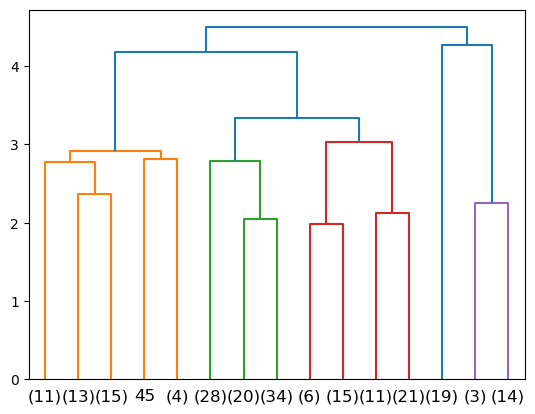

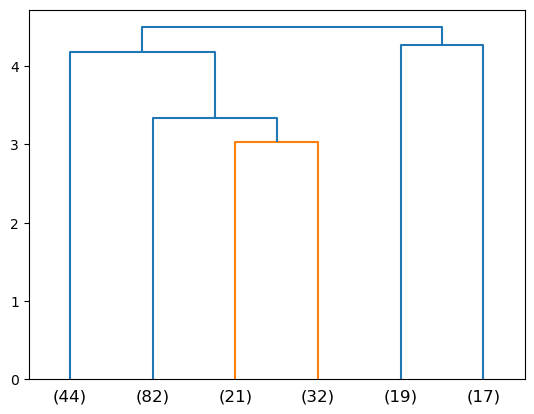

2    82
1    44
4    32
3    21
5    19
6    17
dtype: int64

CLUSTER 1
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
6,Ion transport,215,81,44,18,16.576744,22.22,0.118836,0.370942,0.635901,1.000000
10,Sugar transport,215,56,44,9,11.460465,16.07,-0.348669,0.874303,0.953785,1.000000
0,Hydrogen ion transport,215,10,44,8,2.046512,80.00,1.966833,0.000057,0.000689,0.000689
9,Amino-acid transport,215,48,44,8,9.823256,16.67,-0.296201,0.826530,0.991836,1.000000
1,Translocation,215,8,44,7,1.637209,87.50,2.096116,0.000068,0.000407,0.000814
5,Protein transport,215,27,44,7,5.525581,25.93,0.341229,0.299871,0.599742,1.000000
3,Zinc transport,215,7,44,3,1.432558,42.86,1.066369,0.152884,0.458652,1.000000
2,Cobalt transport,215,2,44,2,0.409302,100.00,2.288761,0.041121,0.164486,0.493458
4,Electron transport,215,5,44,2,1.023256,40.00,0.966833,0.271379,0.651309,1.000000
8,Potassium transport,215,10,44,2,2.046512,20.00,-0.033167,0.643991,0.858655,1.000000


CLUSTER 2
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
1,Sugar transport,215,56,82,31,21.358140,55.36,0.537482,0.001870,0.012158,0.024315
2,Amino-acid transport,215,48,82,25,18.306977,52.08,0.449535,0.019150,0.082983,0.248950
12,Ion transport,215,81,82,20,30.893023,24.69,-0.627281,0.999598,0.999598,1.000000
0,Sodium transport,215,8,82,8,3.051163,100.00,1.390641,0.000359,0.004668,0.004668
5,Peptide transport,215,19,82,8,7.246512,42.11,0.142713,0.443887,0.961756,1.000000
8,Protein transport,215,27,82,8,10.297674,29.63,-0.364247,0.883362,1.000000,1.000000
7,Potassium transport,215,10,82,3,3.813953,30.00,-0.346325,0.807017,1.000000,1.000000
3,Chloride,215,2,82,2,0.762791,100.00,1.390641,0.144360,0.469170,1.000000
6,Phosphate transport,215,4,82,2,1.525581,50.00,0.390641,0.493016,0.915600,1.000000
10,Hydrogen ion transport,215,10,82,2,3.813953,20.00,-0.931287,0.945376,1.000000,1.000000


CLUSTER 3
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
6,Ion transport,215,81,21,8,7.911628,9.88,0.016025,0.571014,0.734160,1.000000
0,Iron transport,215,16,21,5,1.562791,31.25,1.677804,0.011737,0.105634,0.105634
2,Peptide transport,215,19,21,4,1.855814,21.05,1.107948,0.098155,0.294464,0.883391
3,Protein transport,215,27,21,4,2.637209,14.81,0.600988,0.260140,0.585315,1.000000
7,Amino-acid transport,215,48,21,4,4.688372,8.33,-0.229087,0.735239,0.827144,1.000000
8,Sugar transport,215,56,21,4,5.469767,7.14,-0.451479,0.849499,0.849499,1.000000
1,Nickel transport,215,3,21,2,0.293023,66.67,2.770913,0.025757,0.115906,0.231811
4,Phosphate transport,215,4,21,1,0.390698,25.00,1.355875,0.339115,0.610407,1.000000
5,Zinc transport,215,7,21,1,0.683721,14.29,0.548521,0.518217,0.777326,1.000000


CLUSTER 4
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
5,Ion transport,215,81,32,15,12.055814,18.52,0.315233,0.166697,0.361176,1.000000
6,Protein transport,215,27,32,6,4.018605,22.22,0.578268,0.191685,0.355986,1.000000
2,Peptide transport,215,19,32,5,2.827907,26.32,0.822193,0.131155,0.568338,1.000000
1,Potassium transport,215,10,32,4,1.488372,40.00,1.426265,0.044596,0.289875,0.579750
11,Amino-acid transport,215,48,32,4,7.144186,8.33,-0.836770,0.960237,1.000000,1.000000
0,Copper transport,215,3,32,3,0.446512,100.00,2.748193,0.003037,0.039477,0.039477
12,Sugar transport,215,56,32,3,8.334884,5.36,-1.474200,0.997255,0.997255,1.000000
4,Electron transport,215,5,32,2,0.744186,40.00,1.426265,0.160882,0.418293,1.000000
9,Iron transport,215,16,32,2,2.381395,12.50,-0.251807,0.722884,0.939750,1.000000
3,Sulfate transport,215,1,32,1,0.148837,100.00,2.748193,0.148837,0.483721,1.000000


CLUSTER 5
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Amino-acid transport,215,48,19,7,4.241860,14.58,0.722658,0.099919,0.899274,0.899274
5,Sugar transport,215,56,19,5,4.948837,8.93,0.014839,0.582897,0.874346,1.000000
8,Ion transport,215,81,19,4,7.158140,4.94,-0.839585,0.969734,0.969734,1.000000
2,Iron transport,215,16,19,2,1.413953,12.50,0.500265,0.424041,1.000000,1.000000
4,Peptide transport,215,19,19,2,1.679070,10.53,0.252338,0.519096,0.934373,1.000000
7,Protein transport,215,27,19,2,2.386047,7.41,-0.254622,0.722186,0.812459,1.000000
1,Phosphate transport,215,4,19,1,0.353488,25.00,1.500265,0.311218,1.000000,1.000000
3,Zinc transport,215,7,19,1,0.618605,14.29,0.692910,0.481770,1.000000,1.000000
6,Potassium transport,215,10,19,1,0.883721,10.00,0.178337,0.611776,0.786569,1.000000


CLUSTER 6
Keywords substrates


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,percentage_of_annotated,lfc,p,p_fdr,p_bonferroni
0,Ion transport,215,81,17,16,6.404651,19.75,1.320880,7.034408e-07,0.000004,0.000004
1,Iron transport,215,16,17,5,1.265116,31.25,1.982658,4.295251e-03,0.010738,0.021476
4,Sugar transport,215,56,17,4,4.427907,7.14,-0.146625,6.923713e-01,0.692371,1.000000
2,Polysaccharide transport,215,1,17,1,0.079070,100.00,3.660730,7.906977e-02,0.131783,0.395349
3,Lipid transport,215,2,17,1,0.158140,50.00,2.660730,1.522278e-01,0.190285,0.761139


In [273]:
import matplotlib.pyplot as plt
n_clusters = 6
linkage = get_linkage(feature_protnlm_keywords,standardize=False)
dendrogram = dendrogram_plot(linkage)
plt.show()
dendrogram = dendrogram_plot(linkage,max_leaves=n_clusters)
plt.show()
labels = get_cluster_labels(linkage=linkage, n_clusters=n_clusters, index=feature_protnlm_keywords.index.tolist())
display(labels.value_counts())
records_not_go_dict = dict()
records_not_go_dict["Keywords substrates"] = keywords_ecoli_substrate.to_records(index=False).tolist()
reference_set = set(sequences_substrate_keywords.index.tolist())
cluster_enrichment_analysis(labels, reference_set, annotations_dict=records_not_go_dict,p_cutoff=1.1)

array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

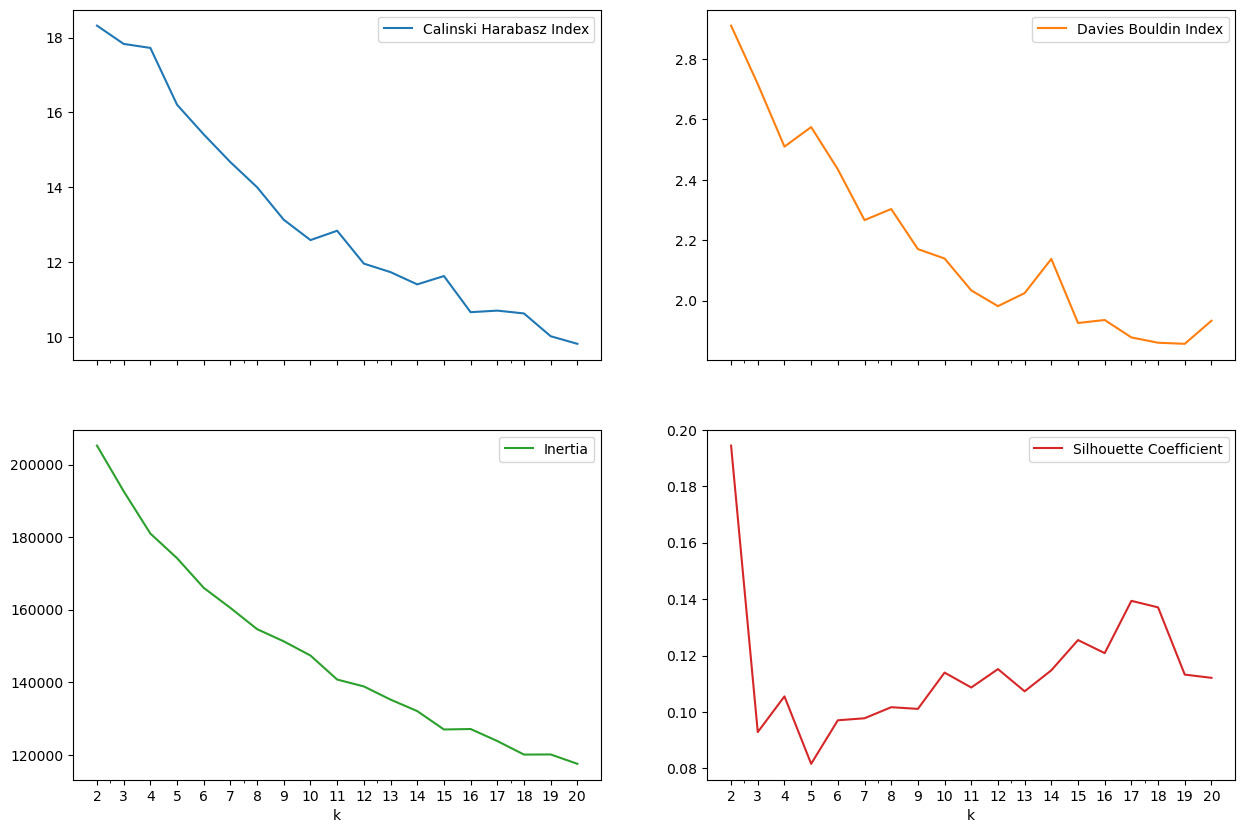

In [270]:
clustering_quality_plots(feature_protnlm_keywords)

array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

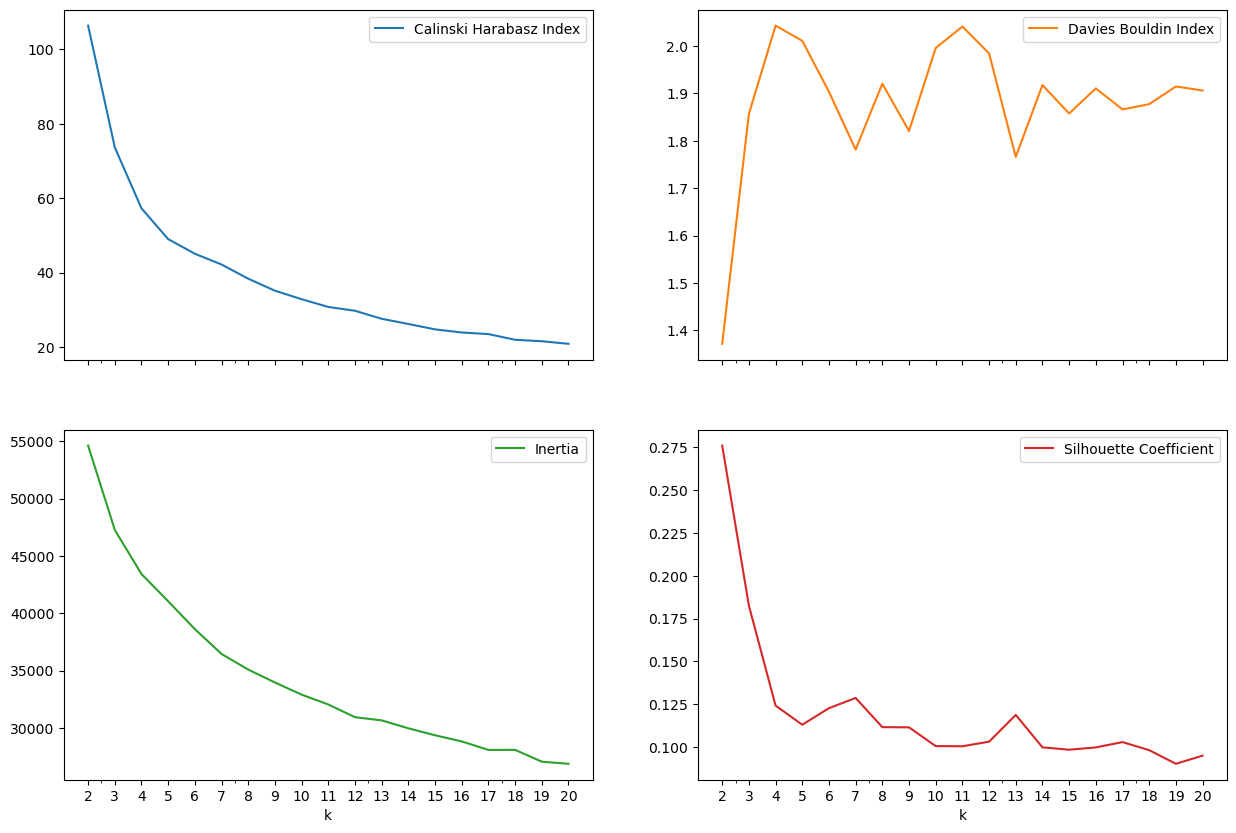

In [271]:
clustering_quality_plots(feature_pssm_keywords)